<a href="https://colab.research.google.com/github/semesarker/A-Dilated-Attention-U-Net-Based-Approach-on-Speech-Emotion-Recognition/blob/main/Dilated_Attention_Unet_model_on_SUBESCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/THSIS/subesco/SUBESCO.zip'

Streaming output truncated to the last 5000 lines.
  inflating: SUBESCO/F_06_SIMI_S_7_DISGUST_1.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_DISGUST_2.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_DISGUST_3.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_DISGUST_4.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_DISGUST_5.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_FEAR_1.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_FEAR_2.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_FEAR_3.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_FEAR_4.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_FEAR_5.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_HAPPY_1.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_HAPPY_2.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_HAPPY_3.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_HAPPY_4.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_HAPPY_5.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_NEUTRAL_1.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_NEUTRAL_2.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_NEUTRAL_3.wav  
  inflating: SUBESCO/F_06_SIMI_S_7_NEUTRAL_4.wav  
  inf

In [ ]:
# Keras
#import tensorflow as tf
import IPython
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


# from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
subescoSER = "/content/SUBESCO/"
subescoSER_directory_list = os.listdir(subescoSER)
subescoSER_directory_list

['F_09_CHAITY_S_6_DISGUST_3.wav',
 'M_02_NIPUN_S_1_HAPPY_1.wav',
 'M_09_SHUMANTA_S_5_NEUTRAL_2.wav',
 'M_03_ILIAS_S_4_DISGUST_4.wav',
 'M_08_PRASUN_S_9_ANGRY_4.wav',
 'M_01_BASHIR_S_5_NEUTRAL_3.wav',
 'M_01_BASHIR_S_2_HAPPY_4.wav',
 'M_05_DURANTO_S_10_SURPRISE_3.wav',
 'F_05_MOUNI_S_10_FEAR_2.wav',
 'F_10_FAHMEE_S_6_SAD_5.wav',
 'F_06_SIMI_S_1_DISGUST_1.wav',
 'M_10_EVAN_S_6_SURPRISE_3.wav',
 'F_01_OISHI_S_2_ANGRY_4.wav',
 'F_03_SMITA_S_3_FEAR_5.wav',
 'M_01_BASHIR_S_4_NEUTRAL_1.wav',
 'F_07_TITHI_S_8_SURPRISE_2.wav',
 'M_03_ILIAS_S_3_FEAR_4.wav',
 'M_06_SHUKANTO_S_1_ANGRY_1.wav',
 'F_01_OISHI_S_3_DISGUST_5.wav',
 'M_01_BASHIR_S_6_FEAR_5.wav',
 'F_01_OISHI_S_3_SAD_3.wav',
 'F_08_JOYEETA_S_7_ANGRY_3.wav',
 'M_03_ILIAS_S_6_FEAR_1.wav',
 'F_04_SWARNALI_S_8_DISGUST_5.wav',
 'F_10_FAHMEE_S_6_SURPRISE_4.wav',
 'M_05_DURANTO_S_8_ANGRY_1.wav',
 'F_01_OISHI_S_4_SAD_1.wav',
 'F_05_MOUNI_S_7_DISGUST_4.wav',
 'F_06_SIMI_S_9_NEUTRAL_4.wav',
 'M_10_EVAN_S_1_SURPRISE_2.wav',
 'F_08_JOYEETA_S_3_DISGUS

In [ ]:
# Ravdess preprocess
file_path = []
file_emotion = []
for directory in subescoSER_directory_list :
    # print(directory)
    part1 = directory.split('_')[5]
    # print(part1)
    file_emotion.append(part1)
    # print(file_emotion)
    file_path.append(subescoSER + directory)
    # print(file_path)

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
subescoSER_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
# subescoSER_df.Emotions.replace({1:'angry', 2:'happy', 3:'neutral', 4:'sad', 5:'surprise'}, inplace=True)
subescoSER_df.head()

,Emotions,Path
0,DISGUST,/content/SUBESCO/F_09_CHAITY_S_6_DISGUST_3.wav
1,HAPPY,/content/SUBESCO/M_02_NIPUN_S_1_HAPPY_1.wav
2,NEUTRAL,/content/SUBESCO/M_09_SHUMANTA_S_5_NEUTRAL_2.wav
3,DISGUST,/content/SUBESCO/M_03_ILIAS_S_4_DISGUST_4.wav
4,ANGRY,/content/SUBESCO/M_08_PRASUN_S_9_ANGRY_4.wav


In [ ]:
subescoSER_df.Emotions.value_counts()

DISGUST     1000
HAPPY       1000
NEUTRAL     1000
ANGRY       1000
SURPRISE    1000
FEAR        1000
SAD         1000
Name: Emotions, dtype: int64

In [ ]:
subescoSER_df

,Emotions,Path
0,DISGUST,/content/SUBESCO/F_09_CHAITY_S_6_DISGUST_3.wav
1,HAPPY,/content/SUBESCO/M_02_NIPUN_S_1_HAPPY_1.wav
2,NEUTRAL,/content/SUBESCO/M_09_SHUMANTA_S_5_NEUTRAL_2.wav
3,DISGUST,/content/SUBESCO/M_03_ILIAS_S_4_DISGUST_4.wav
4,ANGRY,/content/SUBESCO/M_08_PRASUN_S_9_ANGRY_4.wav
...,...,...
6995,NEUTRAL,/content/SUBESCO/F_05_MOUNI_S_7_NEUTRAL_3.wav
6996,SURPRISE,/content/SUBESCO/F_10_FAHMEE_S_6_SURPRISE_3.wav
6997,NEUTRAL,/content/SUBESCO/M_09_SHUMANTA_S_2_NEUTRAL_1.wav
6998,NEUTRAL,/content/SUBESCO/M_09_SHUMANTA_S_4_NEUTRAL_4.wav


In [ ]:
subescoSER_df.shape

(7000, 2)

In [ ]:
di_mel=list()
for i in range(300):
    emotion='DISGUST'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    di_mel.append(mel)

In [ ]:
ha_mel=list()
for i in range(300):
    emotion='HAPPY'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    ha_mel.append(mel)

In [ ]:
nu_mel=list()
for i in range(300):
    emotion='NEUTRAL'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    nu_mel.append(mel)

In [ ]:
an_mel=list()
for i in range(300):
    emotion='ANGRY'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    an_mel.append(mel)

In [ ]:
su_mel=list()
for i in range(300):
    emotion='SURPRISE'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    su_mel.append(mel)

In [ ]:
fe_mel=list()
for i in range(300):
    emotion='FEAR'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    fe_mel.append(mel)

In [ ]:
sa_mel=list()
for i in range(300):
    emotion='SAD'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mel=np.mean(librosa.feature.melspectrogram(y=data, sr=16000,n_fft=1024,hop_length=512,n_mels=30))
    # print(mel)
    sa_mel.append(mel)

Text(0.5, 1.0, 'Mean Mel-Spectrogram Variation on SUBESCO Dataset')

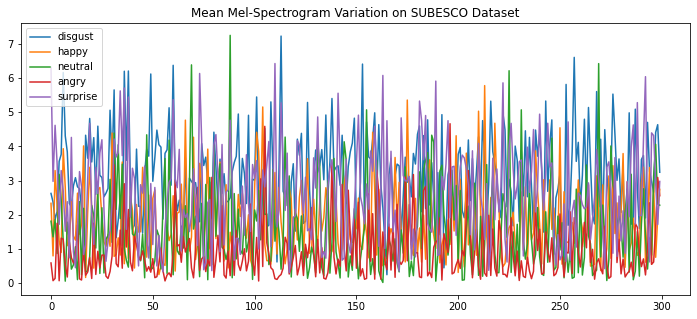

In [ ]:
mel_disgust= di_mel
mel_happy= ha_mel
mel_neutral= nu_mel
mel_angry = an_mel
mel_surprise= su_mel
mel_fear= fe_mel
mel_sad= sa_mel


plt.figure(figsize=(12,5))
plt.plot(mel_angry)
plt.plot(mel_happy)
plt.plot(mel_sad)
plt.plot(mel_neutral)
plt.plot(mel_surprise)
plt.legend(['disgust','happy','neutral','angry','surprise','fear','sad'])
plt.title('Mean Mel-Spectrogram Variation on SUBESCO Dataset')

In [ ]:
di_mf=list()
for i in range(300):
    emotion='DISGUST'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    di_mf.append(mf)

In [ ]:
ha_mf=list()
for i in range(300):
    emotion='HAPPY'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    ha_mf.append(mf)

In [ ]:
nu_mf=list()
for i in range(300):
    emotion='NEUTRAL'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    nu_mf.append(mf)

In [ ]:
an_mf=list()
for i in range(300):
    emotion='ANGRY'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    an_mf.append(mf)

In [ ]:
su_mf=list()
for i in range(300):
    emotion='SURPRISE'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    su_mf.append(mf)

In [ ]:
fe_mf=list()
for i in range(300):
    emotion='FEAR'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    fe_mf.append(mf)

In [ ]:
sa_mf=list()
for i in range(300):
    emotion='SAD'
    path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[i]
    data, sampling_rate = librosa.load(path)
    mf=np.abs(np.mean(librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)))
    # print(mf)
    sa_mf.append(mf)

Text(0.5, 1.0, 'Mean MFCC Variation on SUBESCO Dataset')

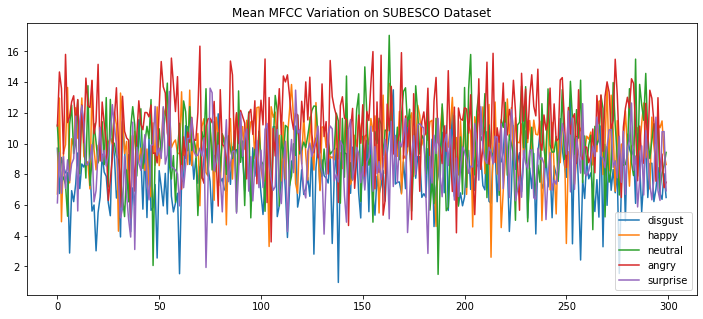

In [ ]:
mfcc_disgust= di_mf
mfcc_happy= ha_mf
mfcc_neutral= nu_mf
mfcc_angry = an_mf
mfcc_surprise= su_mf
mfcc_fear= fe_mf
mfcc_sad= sa_mf


plt.figure(figsize=(12,5))
plt.plot(mfcc_angry)
plt.plot(mfcc_happy)
plt.plot(mfcc_sad)
plt.plot(mfcc_neutral)
plt.plot(mfcc_surprise)
plt.legend(['disgust','happy','neutral','angry','surprise','fear','sad'])
plt.title('Mean MFCC Variation on SUBESCO Dataset')

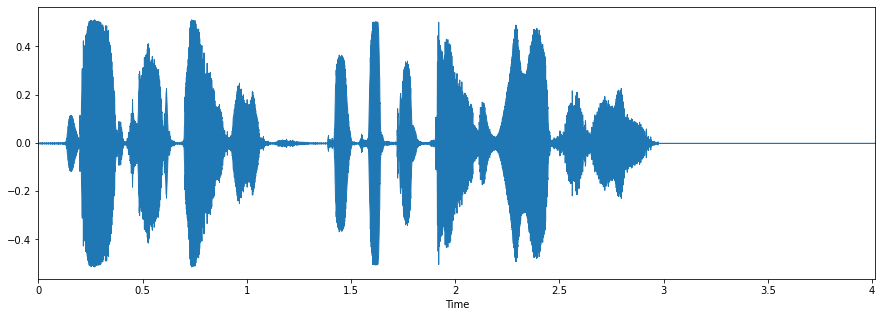

In [ ]:
# Use one audio file in previous parts again
fname = file_path[1000]
data, sampling_rate = librosa.load(fname,sr=16000)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Paly it again to refresh our memory
IPython.display.Audio(data, rate=sampling_rate)

In [ ]:
def create_mel_spectrogram(data, sr, e):
    mel_signal = librosa.feature.melspectrogram(y=data, sr=16000,n_fft=2048,hop_length=512, n_mels=30)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(12, 3))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()

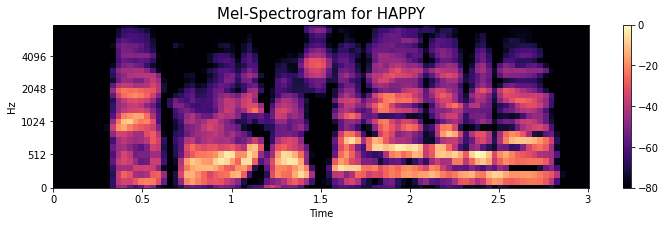

In [ ]:
emotion='HAPPY'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[0]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=2048,hop_length=512, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

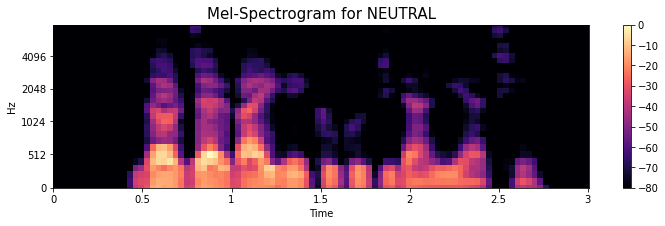

In [ ]:
emotion='NEUTRAL'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[0]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=2048,hop_length=512, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

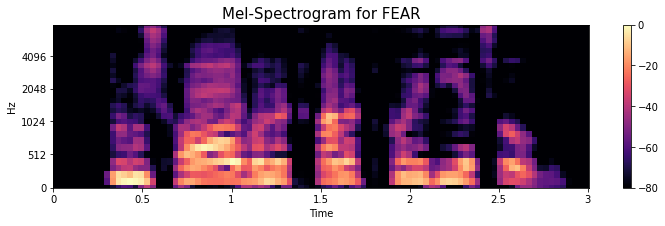

In [ ]:
emotion='FEAR'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[0]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=2048,hop_length=512, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

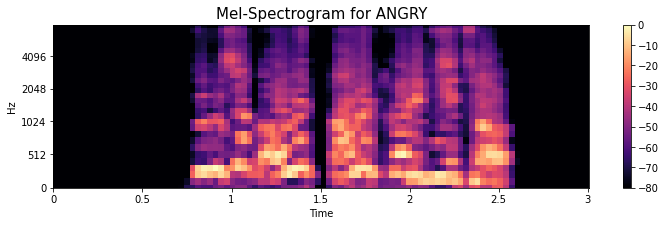

In [ ]:
emotion='ANGRY'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[10]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=2048,hop_length=512, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

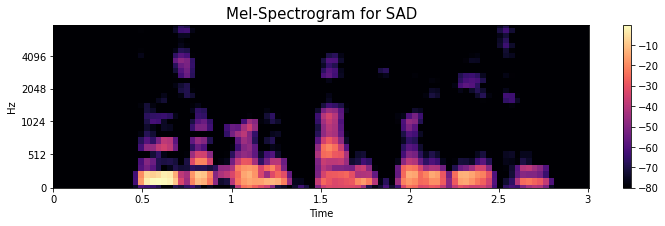

In [ ]:
emotion='SAD'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[220]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=2048,hop_length=512, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

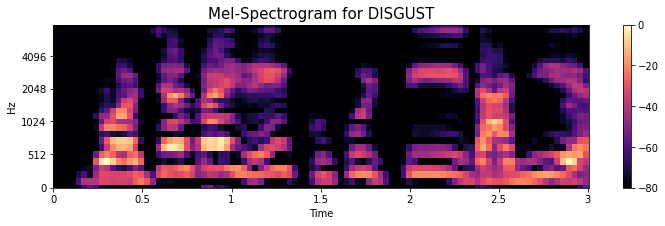

In [ ]:
emotion='DISGUST'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[10]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=2048,hop_length=512, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

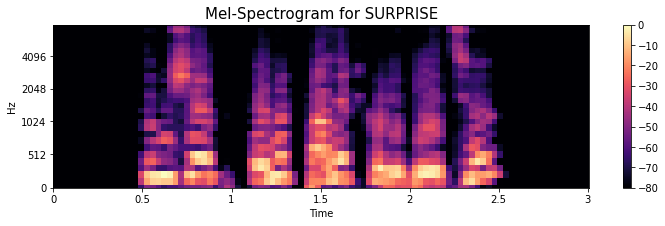

In [ ]:
emotion='SURPRISE'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[50]
data, sr = librosa.load(path,sr=16000, duration=3)
mel_spectrogram=librosa.feature.melspectrogram(data,sr=16000,n_fft=2048,hop_length=512, n_mels=30)
log_mel_spectrogram=librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
create_mel_spectrogram(data,sr,emotion)

In [ ]:
def create_mfcc(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time',sr=sr)
    plt.ylabel('MFCC')
    plt.colorbar(format='%+02.0f dB')

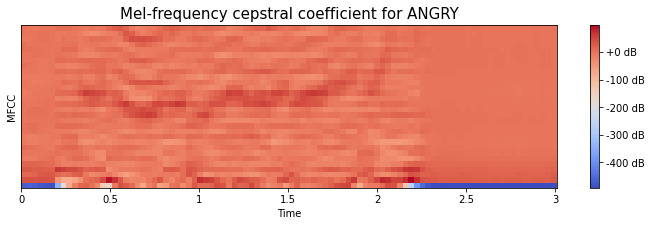

In [ ]:
emotion='ANGRY'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[250]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)

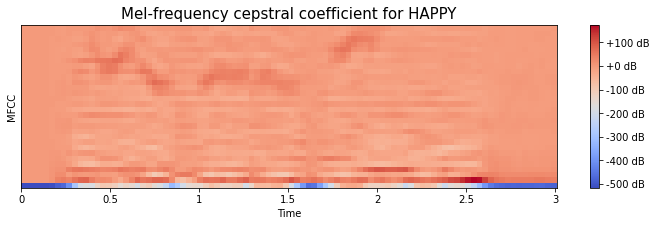

In [ ]:
emotion='HAPPY'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[250]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)

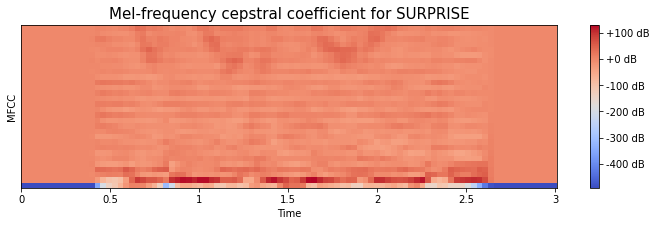

In [ ]:
emotion='SURPRISE'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[250]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)

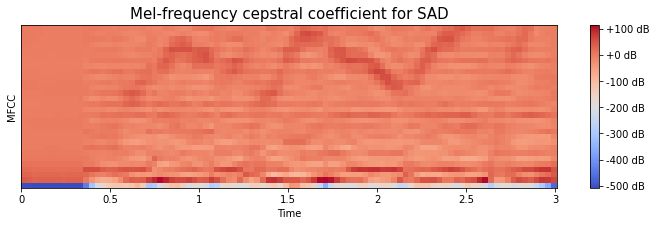

In [ ]:
emotion='SAD'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[250]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)

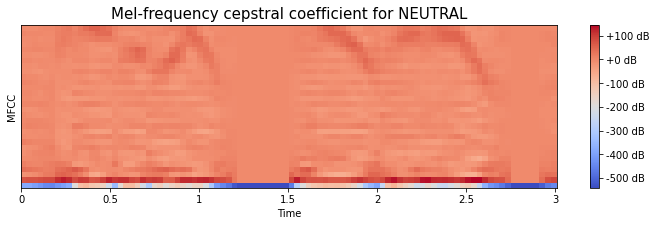

In [ ]:
emotion='NEUTRAL'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[250]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)

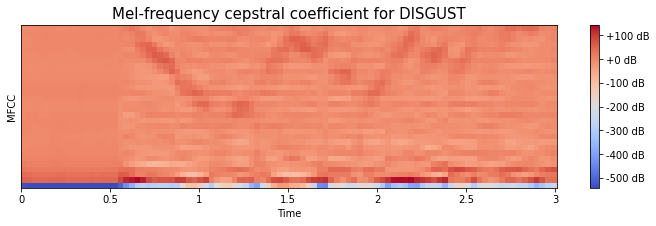

In [ ]:
emotion='DISGUST'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[250]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)

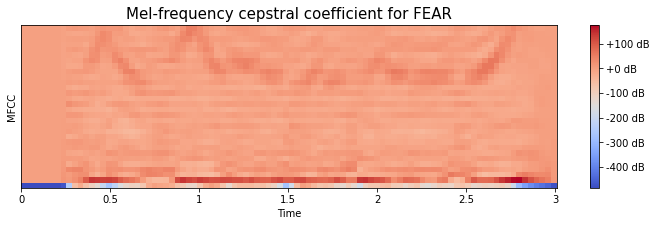

In [ ]:
emotion='FEAR'
path = np.array(subescoSER_df.Path[subescoSER_df.Emotions==emotion])[250]
data, sr = librosa.load(path, sr=16000, duration=3)
create_mfcc(data, sr, emotion)

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=3
n_mfcc = 30
n_melspec = 30

def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,94,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate

                               ,duration=3

                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,48000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_fft=2048,hop_length=512)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate,n_fft=2048,hop_length=512, n_mels = n_melspec)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=0)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel_mfcc = prepare_data(subescoSER_df,n=60,mfcc=1,mel=1)

  0%|          | 1/7000 [00:00<43:51,  2.66it/s]

mfcc_logspec (60, 94, 1)


  0%|          | 2/7000 [00:00<33:17,  3.50it/s]

mfcc_logspec (60, 94, 1)


  0%|          | 3/7000 [00:00<32:40,  3.57it/s]

mfcc_logspec (60, 94, 1)


  0%|          | 4/7000 [00:01<34:17,  3.40it/s]

mfcc_logspec (60, 94, 1)


  0%|          | 6/7000 [00:01<27:59,  4.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 8/7000 [00:01<22:34,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 10/7000 [00:02<20:22,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 12/7000 [00:02<19:41,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 14/7000 [00:02<17:49,  6.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 16/7000 [00:03<18:30,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 18/7000 [00:03<19:46,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 20/7000 [00:03<20:34,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 22/7000 [00:04<20:50,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 24/7000 [00:04<20:53,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 26/7000 [00:04<21:12,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 28/7000 [00:05<20:52,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 30/7000 [00:05<20:21,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 32/7000 [00:06<19:55,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  0%|          | 34/7000 [00:06<18:45,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 36/7000 [00:06<17:24,  6.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 38/7000 [00:06<16:56,  6.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 40/7000 [00:07<19:01,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 42/7000 [00:07<20:24,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 44/7000 [00:07<18:15,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 46/7000 [00:08<17:19,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 48/7000 [00:08<18:09,  6.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 50/7000 [00:08<19:10,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 52/7000 [00:09<20:15,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 54/7000 [00:09<19:08,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 56/7000 [00:09<19:36,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 58/7000 [00:10<20:20,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 60/7000 [00:10<19:01,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 62/7000 [00:10<18:45,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 64/7000 [00:11<18:28,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 66/7000 [00:11<18:40,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 68/7000 [00:11<20:12,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 70/7000 [00:12<19:33,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 72/7000 [00:12<19:18,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 74/7000 [00:12<20:36,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 76/7000 [00:13<20:49,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 78/7000 [00:13<19:33,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 80/7000 [00:13<20:29,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 82/7000 [00:14<19:20,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 84/7000 [00:14<19:11,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|          | 86/7000 [00:14<18:36,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 88/7000 [00:15<19:42,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 90/7000 [00:15<18:30,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 92/7000 [00:15<17:10,  6.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 94/7000 [00:16<19:41,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 96/7000 [00:16<19:12,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 98/7000 [00:16<20:11,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 100/7000 [00:17<17:53,  6.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 102/7000 [00:17<16:52,  6.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  1%|▏         | 104/7000 [00:17<17:22,  6.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 106/7000 [00:18<18:27,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 108/7000 [00:18<19:38,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 110/7000 [00:18<18:44,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 112/7000 [00:19<17:27,  6.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 114/7000 [00:19<18:00,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 116/7000 [00:19<18:39,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 118/7000 [00:20<18:41,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 120/7000 [00:20<19:36,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 122/7000 [00:20<19:08,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 124/7000 [00:21<20:18,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 126/7000 [00:21<20:36,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 128/7000 [00:21<19:54,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 130/7000 [00:22<18:53,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 132/7000 [00:22<18:09,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 134/7000 [00:22<19:30,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 136/7000 [00:23<20:33,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 138/7000 [00:23<20:42,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 140/7000 [00:23<20:55,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 142/7000 [00:24<21:23,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 144/7000 [00:24<19:57,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 146/7000 [00:24<19:07,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 148/7000 [00:25<18:43,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 150/7000 [00:25<17:55,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 152/7000 [00:26<19:33,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 154/7000 [00:26<18:51,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 156/7000 [00:26<19:47,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 158/7000 [00:27<20:12,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 160/7000 [00:27<20:49,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 162/7000 [00:27<18:55,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 164/7000 [00:28<19:32,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 166/7000 [00:28<19:22,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 168/7000 [00:28<18:59,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 170/7000 [00:29<19:53,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 172/7000 [00:29<20:43,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  2%|▏         | 174/7000 [00:29<19:23,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 176/7000 [00:30<19:58,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 178/7000 [00:30<17:53,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 180/7000 [00:30<19:30,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 182/7000 [00:31<20:16,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 184/7000 [00:31<20:33,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 186/7000 [00:31<20:34,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 187/7000 [00:32<20:30,  5.53it/s]

mfcc_logspec (60, 94, 1)


  3%|▎         | 188/7000 [00:32<35:35,  3.19it/s]

mfcc_logspec (60, 94, 1)


  3%|▎         | 190/7000 [00:33<30:04,  3.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 192/7000 [00:33<23:44,  4.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 194/7000 [00:33<21:21,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 196/7000 [00:34<19:55,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 198/7000 [00:34<20:23,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 200/7000 [00:34<20:13,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 202/7000 [00:35<20:26,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 204/7000 [00:35<20:46,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 206/7000 [00:35<18:07,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 208/7000 [00:36<19:21,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 210/7000 [00:36<18:24,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 212/7000 [00:36<19:33,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 214/7000 [00:37<20:10,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 216/7000 [00:37<20:28,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 218/7000 [00:38<19:24,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 220/7000 [00:38<20:05,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 222/7000 [00:38<18:02,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 224/7000 [00:38<17:42,  6.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 226/7000 [00:39<19:10,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 228/7000 [00:39<18:51,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 230/7000 [00:39<18:10,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 232/7000 [00:40<17:49,  6.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 234/7000 [00:40<19:23,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 236/7000 [00:41<19:19,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 238/7000 [00:41<18:40,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 240/7000 [00:41<18:10,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 242/7000 [00:41<16:48,  6.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  3%|▎         | 244/7000 [00:42<17:37,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 246/7000 [00:42<18:06,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 248/7000 [00:42<18:00,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 250/7000 [00:43<17:26,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 252/7000 [00:43<19:05,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 254/7000 [00:43<19:04,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 256/7000 [00:44<17:27,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 258/7000 [00:44<17:55,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 260/7000 [00:44<18:21,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▎         | 261/7000 [00:45<18:56,  5.93it/s]

mfcc_logspec (60, 94, 1)


  4%|▎         | 262/7000 [00:45<22:43,  4.94it/s]

mfcc_logspec (60, 94, 1)


  4%|▍         | 263/7000 [00:45<25:54,  4.33it/s]

mfcc_logspec (60, 94, 1)


  4%|▍         | 264/7000 [00:45<25:34,  4.39it/s]

mfcc_logspec (60, 94, 1)


  4%|▍         | 266/7000 [00:46<24:52,  4.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 267/7000 [00:46<24:12,  4.64it/s]

mfcc_logspec (60, 94, 1)


  4%|▍         | 268/7000 [00:46<27:16,  4.11it/s]

mfcc_logspec (60, 94, 1)


  4%|▍         | 269/7000 [00:47<28:09,  3.99it/s]

mfcc_logspec (60, 94, 1)


  4%|▍         | 270/7000 [00:47<29:39,  3.78it/s]

mfcc_logspec (60, 94, 1)


  4%|▍         | 271/7000 [00:47<30:45,  3.65it/s]

mfcc_logspec (60, 94, 1)


  4%|▍         | 273/7000 [00:48<26:37,  4.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 274/7000 [00:48<25:29,  4.40it/s]

mfcc_logspec (60, 94, 1)


  4%|▍         | 275/7000 [00:48<28:15,  3.97it/s]

mfcc_logspec (60, 94, 1)


  4%|▍         | 277/7000 [00:49<26:26,  4.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 279/7000 [00:49<23:11,  4.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 281/7000 [00:49<22:04,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 283/7000 [00:50<21:09,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 285/7000 [00:50<20:34,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 287/7000 [00:50<18:55,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 289/7000 [00:51<17:10,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 291/7000 [00:51<16:06,  6.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 293/7000 [00:51<18:19,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 295/7000 [00:52<16:43,  6.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 297/7000 [00:52<18:35,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 299/7000 [00:52<19:24,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 301/7000 [00:53<19:59,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 303/7000 [00:53<18:42,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 305/7000 [00:53<18:17,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 307/7000 [00:54<19:34,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 309/7000 [00:54<20:11,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 311/7000 [00:54<20:25,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 313/7000 [00:55<20:30,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  4%|▍         | 315/7000 [00:55<20:30,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 317/7000 [00:55<20:37,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 319/7000 [00:56<19:12,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 321/7000 [00:56<17:25,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 323/7000 [00:56<17:40,  6.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 325/7000 [00:57<18:55,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 327/7000 [00:57<19:21,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 329/7000 [00:57<19:13,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 331/7000 [00:58<19:42,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 333/7000 [00:58<19:55,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 335/7000 [00:58<17:30,  6.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 337/7000 [00:59<16:36,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 339/7000 [00:59<16:55,  6.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 341/7000 [00:59<18:43,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 343/7000 [01:00<18:14,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 345/7000 [01:00<19:12,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 347/7000 [01:00<18:31,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▍         | 349/7000 [01:01<18:08,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 351/7000 [01:01<19:01,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 353/7000 [01:01<17:05,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 355/7000 [01:02<17:31,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 357/7000 [01:02<19:14,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 359/7000 [01:02<19:30,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 361/7000 [01:03<19:53,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 363/7000 [01:03<18:26,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 365/7000 [01:03<19:11,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 367/7000 [01:04<18:19,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 369/7000 [01:04<17:51,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 371/7000 [01:04<17:56,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 373/7000 [01:05<19:09,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 375/7000 [01:05<17:23,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 377/7000 [01:05<16:22,  6.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 379/7000 [01:06<16:44,  6.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 381/7000 [01:06<17:54,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  5%|▌         | 383/7000 [01:06<16:34,  6.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 385/7000 [01:07<18:08,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 387/7000 [01:07<19:19,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 389/7000 [01:07<19:49,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 391/7000 [01:08<19:58,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 393/7000 [01:08<18:39,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 395/7000 [01:08<17:55,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 397/7000 [01:09<19:13,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 399/7000 [01:09<18:21,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 401/7000 [01:10<19:18,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 403/7000 [01:10<19:43,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 405/7000 [01:10<19:47,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 407/7000 [01:11<18:36,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 409/7000 [01:11<19:09,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 411/7000 [01:11<19:41,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 413/7000 [01:12<18:36,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 415/7000 [01:12<17:55,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 417/7000 [01:12<17:32,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 419/7000 [01:13<18:51,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 421/7000 [01:13<18:12,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 423/7000 [01:13<19:11,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 425/7000 [01:14<19:21,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 427/7000 [01:14<18:17,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 429/7000 [01:14<19:04,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 431/7000 [01:15<16:50,  6.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 433/7000 [01:15<18:21,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 435/7000 [01:15<18:24,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▌         | 437/7000 [01:16<19:33,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 439/7000 [01:16<19:47,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 441/7000 [01:16<18:51,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 443/7000 [01:17<19:00,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 445/7000 [01:17<17:48,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 447/7000 [01:17<18:55,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 449/7000 [01:18<18:07,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 451/7000 [01:18<18:04,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 453/7000 [01:18<19:11,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  6%|▋         | 455/7000 [01:19<19:22,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 457/7000 [01:19<19:21,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 459/7000 [01:19<18:35,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 461/7000 [01:20<19:14,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 463/7000 [01:20<18:35,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 465/7000 [01:20<16:59,  6.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 467/7000 [01:21<18:27,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 469/7000 [01:21<17:59,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 471/7000 [01:21<18:17,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 473/7000 [01:22<18:27,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 475/7000 [01:22<17:30,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 477/7000 [01:22<18:46,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 479/7000 [01:23<18:13,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 481/7000 [01:23<19:08,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 483/7000 [01:23<18:57,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 485/7000 [01:24<19:12,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 487/7000 [01:24<17:51,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 489/7000 [01:24<16:39,  6.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 491/7000 [01:25<16:47,  6.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 493/7000 [01:25<18:17,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 495/7000 [01:25<18:02,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 497/7000 [01:26<17:21,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 499/7000 [01:26<18:43,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 501/7000 [01:26<18:32,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 503/7000 [01:27<19:13,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 505/7000 [01:27<16:53,  6.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 507/7000 [01:27<18:39,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 509/7000 [01:28<18:11,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 511/7000 [01:28<18:47,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 513/7000 [01:29<19:23,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 515/7000 [01:29<19:24,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 517/7000 [01:29<19:29,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 519/7000 [01:30<18:50,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 521/7000 [01:30<19:23,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  7%|▋         | 523/7000 [01:30<18:40,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 525/7000 [01:31<19:19,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 527/7000 [01:31<18:12,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 529/7000 [01:31<17:18,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 531/7000 [01:32<18:40,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 533/7000 [01:32<17:45,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 535/7000 [01:32<18:58,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 537/7000 [01:33<19:20,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 539/7000 [01:33<18:01,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 541/7000 [01:33<18:55,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 543/7000 [01:34<18:18,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 545/7000 [01:34<18:58,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 547/7000 [01:34<19:11,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 549/7000 [01:35<18:49,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 551/7000 [01:35<18:02,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 553/7000 [01:35<17:32,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 555/7000 [01:36<18:48,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 557/7000 [01:36<19:04,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 559/7000 [01:37<19:28,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 561/7000 [01:37<19:38,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 563/7000 [01:37<17:07,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 565/7000 [01:37<17:18,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 567/7000 [01:38<17:30,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 569/7000 [01:38<18:32,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 571/7000 [01:38<16:54,  6.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 572/7000 [01:39<16:32,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 575/7000 [01:39<18:34,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 577/7000 [01:39<17:53,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 579/7000 [01:40<17:53,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 580/7000 [01:40<21:31,  4.97it/s]

mfcc_logspec (60, 94, 1)


  8%|▊         | 581/7000 [01:40<27:53,  3.84it/s]

mfcc_logspec (60, 94, 1)


  8%|▊         | 582/7000 [01:41<32:27,  3.30it/s]

mfcc_logspec (60, 94, 1)


  8%|▊         | 583/7000 [01:41<34:44,  3.08it/s]

mfcc_logspec (60, 94, 1)


  8%|▊         | 584/7000 [01:42<33:37,  3.18it/s]

mfcc_logspec (60, 94, 1)


  8%|▊         | 585/7000 [01:42<36:38,  2.92it/s]

mfcc_logspec (60, 94, 1)


  8%|▊         | 586/7000 [01:42<38:03,  2.81it/s]

mfcc_logspec (60, 94, 1)


  8%|▊         | 588/7000 [01:43<27:40,  3.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 590/7000 [01:43<22:52,  4.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 592/7000 [01:43<20:26,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  8%|▊         | 594/7000 [01:44<19:58,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 596/7000 [01:44<19:43,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 598/7000 [01:44<18:55,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 600/7000 [01:45<17:34,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 602/7000 [01:45<18:42,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 604/7000 [01:45<19:24,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 606/7000 [01:46<18:00,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 608/7000 [01:46<16:16,  6.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 610/7000 [01:46<17:59,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▊         | 612/7000 [01:47<18:32,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 614/7000 [01:47<16:20,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 616/7000 [01:47<15:16,  6.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 618/7000 [01:48<17:10,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 620/7000 [01:48<16:50,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 622/7000 [01:48<17:57,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 624/7000 [01:49<16:03,  6.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 626/7000 [01:49<16:52,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 628/7000 [01:49<17:10,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 630/7000 [01:50<18:06,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 632/7000 [01:50<19:02,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 634/7000 [01:50<18:48,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 636/7000 [01:51<17:35,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 638/7000 [01:51<17:09,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 640/7000 [01:51<17:56,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 642/7000 [01:52<16:55,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 644/7000 [01:52<18:39,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 646/7000 [01:52<17:38,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 648/7000 [01:53<17:00,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 650/7000 [01:53<16:33,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 652/7000 [01:53<18:15,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 654/7000 [01:54<16:54,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 656/7000 [01:54<16:40,  6.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 658/7000 [01:54<16:59,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 660/7000 [01:55<17:18,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 662/7000 [01:55<17:03,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


  9%|▉         | 664/7000 [01:55<17:14,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 666/7000 [01:56<17:56,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 668/7000 [01:56<16:54,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 670/7000 [01:56<18:01,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 672/7000 [01:57<18:31,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 674/7000 [01:57<18:44,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 676/7000 [01:57<17:48,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 678/7000 [01:58<18:33,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 680/7000 [01:58<18:47,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 682/7000 [01:59<19:15,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 684/7000 [01:59<18:13,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 686/7000 [01:59<17:39,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 688/7000 [02:00<18:02,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 690/7000 [02:00<16:06,  6.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 692/7000 [02:00<17:27,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 694/7000 [02:00<16:09,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 696/7000 [02:01<16:16,  6.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|▉         | 698/7000 [02:01<15:23,  6.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 700/7000 [02:01<17:23,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 702/7000 [02:02<17:13,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 704/7000 [02:02<17:25,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 706/7000 [02:02<16:57,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 708/7000 [02:03<17:51,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 710/7000 [02:03<18:26,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 712/7000 [02:03<19:04,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 714/7000 [02:04<18:19,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 716/7000 [02:04<17:12,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 718/7000 [02:04<15:39,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 720/7000 [02:05<16:09,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 722/7000 [02:05<17:35,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 723/7000 [02:05<18:05,  5.78it/s]

mfcc_logspec (60, 94, 1)


 10%|█         | 725/7000 [02:06<19:08,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 727/7000 [02:06<19:07,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 729/7000 [02:06<17:27,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 731/7000 [02:07<18:15,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 733/7000 [02:07<17:02,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 10%|█         | 735/7000 [02:07<16:29,  6.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 737/7000 [02:08<16:37,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 739/7000 [02:08<16:49,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 741/7000 [02:08<16:19,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 743/7000 [02:09<15:31,  6.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 745/7000 [02:09<17:08,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 747/7000 [02:09<17:47,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 749/7000 [02:10<16:16,  6.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 751/7000 [02:10<16:06,  6.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 753/7000 [02:10<15:53,  6.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 755/7000 [02:10<16:12,  6.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 757/7000 [02:11<17:55,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 759/7000 [02:11<17:18,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 761/7000 [02:12<18:08,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 763/7000 [02:12<16:06,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 765/7000 [02:12<17:41,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 767/7000 [02:13<16:51,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 769/7000 [02:13<17:10,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 771/7000 [02:13<16:39,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 773/7000 [02:13<16:26,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 775/7000 [02:14<18:03,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 777/7000 [02:14<16:02,  6.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 779/7000 [02:14<15:08,  6.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 781/7000 [02:15<17:25,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 783/7000 [02:15<18:07,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█         | 784/7000 [02:15<18:49,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 11%|█         | 786/7000 [02:16<18:14,  5.68it/s]


mfcc_logspec (60, 94, 1)


 11%|█▏        | 788/7000 [02:16<18:34,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 790/7000 [02:16<17:24,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 792/7000 [02:17<19:05,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 794/7000 [02:17<18:58,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 796/7000 [02:18<22:05,  4.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 11%|█▏        | 797/7000 [02:18<26:48,  3.86it/s]

mfcc_logspec (60, 94, 1)


 11%|█▏        | 798/7000 [02:18<30:16,  3.41it/s]

mfcc_logspec (60, 94, 1)


 11%|█▏        | 799/7000 [02:19<27:50,  3.71it/s]

mfcc_logspec (60, 94, 1)


 11%|█▏        | 800/7000 [02:19<30:22,  3.40it/s]

mfcc_logspec (60, 94, 1)


 11%|█▏        | 801/7000 [02:20<42:36,  2.42it/s]

mfcc_logspec (60, 94, 1)


 11%|█▏        | 803/7000 [02:20<31:04,  3.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 805/7000 [02:20<22:22,  4.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 807/7000 [02:21<19:24,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 809/7000 [02:21<19:10,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 811/7000 [02:21<16:45,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 813/7000 [02:22<17:38,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 815/7000 [02:22<18:32,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 817/7000 [02:22<17:18,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 819/7000 [02:23<17:46,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 821/7000 [02:23<18:23,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 823/7000 [02:23<17:21,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 825/7000 [02:24<17:59,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 827/7000 [02:24<17:11,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 829/7000 [02:24<16:27,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 831/7000 [02:25<16:33,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 833/7000 [02:25<16:32,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 835/7000 [02:25<17:31,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 837/7000 [02:26<15:51,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 839/7000 [02:26<16:30,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 841/7000 [02:26<16:59,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 843/7000 [02:27<16:56,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 845/7000 [02:27<16:41,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 847/7000 [02:27<16:45,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 849/7000 [02:28<16:13,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 851/7000 [02:28<15:10,  6.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 853/7000 [02:28<16:59,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 855/7000 [02:29<16:21,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 857/7000 [02:29<16:31,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 859/7000 [02:29<16:54,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 861/7000 [02:30<16:59,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 863/7000 [02:30<17:33,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 865/7000 [02:30<17:11,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 867/7000 [02:31<15:29,  6.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 869/7000 [02:31<15:37,  6.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 871/7000 [02:31<15:55,  6.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▏        | 873/7000 [02:32<15:03,  6.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 12%|█▎        | 875/7000 [02:32<16:49,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 877/7000 [02:32<15:26,  6.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 879/7000 [02:33<17:06,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 881/7000 [02:33<16:32,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 883/7000 [02:33<17:39,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 885/7000 [02:34<17:07,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 887/7000 [02:34<18:02,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 889/7000 [02:34<18:19,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 891/7000 [02:35<15:53,  6.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 893/7000 [02:35<16:33,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 895/7000 [02:35<17:56,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 897/7000 [02:36<16:56,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 899/7000 [02:36<16:07,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 901/7000 [02:36<16:13,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 903/7000 [02:37<16:19,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 905/7000 [02:37<17:09,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 907/7000 [02:37<18:06,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 909/7000 [02:38<16:43,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 911/7000 [02:38<17:45,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 913/7000 [02:38<18:15,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 915/7000 [02:39<17:28,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 917/7000 [02:39<16:35,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 919/7000 [02:39<16:30,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 921/7000 [02:40<16:32,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 923/7000 [02:40<17:08,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 925/7000 [02:40<18:11,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 927/7000 [02:41<17:01,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 929/7000 [02:41<15:12,  6.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 930/7000 [02:41<15:05,  6.70it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 931/7000 [02:41<18:41,  5.41it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 932/7000 [02:42<21:42,  4.66it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 933/7000 [02:42<25:11,  4.01it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 934/7000 [02:42<25:20,  3.99it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 935/7000 [02:43<30:40,  3.29it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 936/7000 [02:43<28:35,  3.53it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 937/7000 [02:43<30:12,  3.35it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 938/7000 [02:44<30:12,  3.34it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 939/7000 [02:44<30:48,  3.28it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 941/7000 [02:44<27:46,  3.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 13%|█▎        | 942/7000 [02:45<31:41,  3.19it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 943/7000 [02:45<33:13,  3.04it/s]

mfcc_logspec (60, 94, 1)


 13%|█▎        | 944/7000 [02:46<34:38,  2.91it/s]

mfcc_logspec (60, 94, 1)


 14%|█▎        | 945/7000 [02:46<34:05,  2.96it/s]

mfcc_logspec (60, 94, 1)


 14%|█▎        | 946/7000 [02:46<35:51,  2.81it/s]

mfcc_logspec (60, 94, 1)


 14%|█▎        | 947/7000 [02:47<36:11,  2.79it/s]

mfcc_logspec (60, 94, 1)


 14%|█▎        | 948/7000 [02:47<41:12,  2.45it/s]

mfcc_logspec (60, 94, 1)


 14%|█▎        | 950/7000 [02:48<36:08,  2.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 952/7000 [02:48<25:57,  3.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 954/7000 [02:48<21:26,  4.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 956/7000 [02:49<20:04,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 958/7000 [02:49<19:22,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 960/7000 [02:50<18:42,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▎        | 962/7000 [02:50<18:35,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 964/7000 [02:50<18:32,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 966/7000 [02:51<18:35,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 968/7000 [02:51<17:30,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 970/7000 [02:51<17:12,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 972/7000 [02:52<18:11,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 974/7000 [02:52<18:05,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 976/7000 [02:52<18:08,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 978/7000 [02:53<18:24,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 980/7000 [02:53<17:33,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 982/7000 [02:53<17:48,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 984/7000 [02:54<17:16,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 986/7000 [02:54<15:31,  6.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 988/7000 [02:54<15:58,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 990/7000 [02:55<16:59,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 992/7000 [02:55<17:33,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 994/7000 [02:55<16:31,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 996/7000 [02:56<16:21,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 998/7000 [02:56<16:08,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1000/7000 [02:56<15:51,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1001/7000 [02:57<16:54,  5.91it/s]

mfcc_logspec (60, 94, 1)


 14%|█▍        | 1003/7000 [02:57<18:01,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1005/7000 [02:57<17:13,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1007/7000 [02:58<17:46,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1009/7000 [02:58<18:15,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1011/7000 [02:58<18:12,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1013/7000 [02:59<17:26,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 14%|█▍        | 1015/7000 [02:59<16:52,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1017/7000 [02:59<16:12,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1019/7000 [03:00<17:10,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1021/7000 [03:00<16:28,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1023/7000 [03:00<15:06,  6.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1025/7000 [03:01<15:54,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1027/7000 [03:01<17:07,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1029/7000 [03:01<16:45,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1031/7000 [03:02<16:22,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1033/7000 [03:02<16:07,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1035/7000 [03:02<14:51,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1037/7000 [03:03<16:33,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1039/7000 [03:03<15:20,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1041/7000 [03:03<16:20,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1043/7000 [03:04<15:59,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1045/7000 [03:04<16:18,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1047/7000 [03:04<17:03,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▍        | 1049/7000 [03:05<15:56,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1051/7000 [03:05<15:56,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1053/7000 [03:05<17:08,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1055/7000 [03:06<17:18,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1057/7000 [03:06<17:51,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1059/7000 [03:06<17:56,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1061/7000 [03:07<16:30,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1063/7000 [03:07<17:21,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1065/7000 [03:07<15:30,  6.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1067/7000 [03:08<15:25,  6.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1069/7000 [03:08<16:26,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1071/7000 [03:08<15:54,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1073/7000 [03:09<16:50,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1075/7000 [03:09<16:22,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1077/7000 [03:09<16:06,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1079/7000 [03:10<16:59,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1081/7000 [03:10<17:28,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 15%|█▌        | 1083/7000 [03:10<16:47,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1085/7000 [03:11<16:01,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1087/7000 [03:11<16:46,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1089/7000 [03:11<17:20,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1091/7000 [03:12<16:29,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1093/7000 [03:12<16:15,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1095/7000 [03:12<17:23,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1097/7000 [03:13<17:38,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1099/7000 [03:13<17:07,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1101/7000 [03:14<17:11,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1103/7000 [03:14<15:09,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1105/7000 [03:14<15:07,  6.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1107/7000 [03:14<16:49,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1109/7000 [03:15<16:47,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1111/7000 [03:15<16:09,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1113/7000 [03:15<16:22,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1115/7000 [03:16<17:38,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1117/7000 [03:16<17:46,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1119/7000 [03:17<17:54,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1121/7000 [03:17<17:52,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1123/7000 [03:17<18:04,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1125/7000 [03:18<16:36,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1127/7000 [03:18<16:35,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1129/7000 [03:18<16:09,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1131/7000 [03:19<16:20,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1133/7000 [03:19<17:23,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1135/7000 [03:19<15:46,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▌        | 1137/7000 [03:20<17:03,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1139/7000 [03:20<17:44,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1141/7000 [03:20<16:44,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1143/7000 [03:21<16:08,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1145/7000 [03:21<16:50,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1146/7000 [03:21<16:03,  6.08it/s]

mfcc_logspec (60, 94, 1)


 16%|█▋        | 1148/7000 [03:22<16:05,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1150/7000 [03:22<15:31,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1152/7000 [03:22<16:44,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 16%|█▋        | 1154/7000 [03:23<16:48,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1156/7000 [03:23<16:12,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1158/7000 [03:23<17:10,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1160/7000 [03:24<17:04,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1162/7000 [03:24<15:33,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1164/7000 [03:24<14:27,  6.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1165/7000 [03:24<15:22,  6.32it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1166/7000 [03:25<16:53,  5.75it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1167/7000 [03:25<18:06,  5.37it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1168/7000 [03:25<23:58,  4.05it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1169/7000 [03:26<26:58,  3.60it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1170/7000 [03:26<30:52,  3.15it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1171/7000 [03:26<27:55,  3.48it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1172/7000 [03:27<31:04,  3.13it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1173/7000 [03:27<31:22,  3.09it/s]

mfcc_logspec (60, 94, 1)


 17%|█▋        | 1175/7000 [03:27<26:10,  3.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1177/7000 [03:28<19:32,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1179/7000 [03:28<17:14,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1181/7000 [03:28<16:21,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1183/7000 [03:29<14:58,  6.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1185/7000 [03:29<16:38,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1187/7000 [03:29<17:13,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1189/7000 [03:30<17:49,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1191/7000 [03:30<17:33,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1193/7000 [03:30<17:37,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1195/7000 [03:31<16:03,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1197/7000 [03:31<16:50,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1199/7000 [03:31<17:11,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1201/7000 [03:32<16:50,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1203/7000 [03:32<17:11,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1205/7000 [03:32<16:08,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1207/7000 [03:33<17:10,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1209/7000 [03:33<16:16,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1211/7000 [03:34<17:05,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1213/7000 [03:34<17:25,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1215/7000 [03:34<16:28,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1217/7000 [03:35<15:44,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1219/7000 [03:35<16:01,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1221/7000 [03:35<16:40,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 17%|█▋        | 1223/7000 [03:36<17:09,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1225/7000 [03:36<17:57,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1227/7000 [03:36<17:59,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1229/7000 [03:37<17:51,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1231/7000 [03:37<17:20,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1233/7000 [03:38<20:22,  4.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1235/7000 [03:38<20:57,  4.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1236/7000 [03:38<22:26,  4.28it/s]

mfcc_logspec (60, 94, 1)


 18%|█▊        | 1237/7000 [03:39<24:12,  3.97it/s]

mfcc_logspec (60, 94, 1)


 18%|█▊        | 1239/7000 [03:39<23:01,  4.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1240/7000 [03:39<24:41,  3.89it/s]

mfcc_logspec (60, 94, 1)


 18%|█▊        | 1241/7000 [03:40<23:20,  4.11it/s]

mfcc_logspec (60, 94, 1)


 18%|█▊        | 1242/7000 [03:40<25:05,  3.82it/s]

mfcc_logspec (60, 94, 1)


 18%|█▊        | 1243/7000 [03:40<23:44,  4.04it/s]

mfcc_logspec (60, 94, 1)


 18%|█▊        | 1244/7000 [03:40<25:26,  3.77it/s]

mfcc_logspec (60, 94, 1)


 18%|█▊        | 1246/7000 [03:41<23:02,  4.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1248/7000 [03:41<19:11,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1250/7000 [03:42<17:33,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1252/7000 [03:42<17:46,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1254/7000 [03:42<16:47,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1256/7000 [03:43<15:17,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1258/7000 [03:43<16:17,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1260/7000 [03:43<15:45,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1262/7000 [03:44<15:31,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1264/7000 [03:44<16:41,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1266/7000 [03:44<16:21,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1268/7000 [03:45<16:50,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1270/7000 [03:45<16:58,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1272/7000 [03:45<15:17,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1273/7000 [03:45<15:58,  5.97it/s]

mfcc_logspec (60, 94, 1)


 18%|█▊        | 1275/7000 [03:46<17:14,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1277/7000 [03:46<17:17,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1279/7000 [03:47<16:43,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1281/7000 [03:47<16:02,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1283/7000 [03:47<16:45,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1285/7000 [03:48<17:17,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1287/7000 [03:48<17:12,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1289/7000 [03:48<17:20,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1291/7000 [03:49<16:18,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1293/7000 [03:49<14:31,  6.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 18%|█▊        | 1295/7000 [03:49<14:48,  6.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1297/7000 [03:50<13:59,  6.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1299/7000 [03:50<14:47,  6.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1301/7000 [03:50<16:06,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1303/7000 [03:51<16:49,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1305/7000 [03:51<17:10,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1307/7000 [03:51<15:28,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1309/7000 [03:52<16:46,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▊        | 1311/7000 [03:52<17:08,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1313/7000 [03:52<16:01,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1315/7000 [03:53<16:38,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1317/7000 [03:53<15:28,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1318/7000 [03:53<16:12,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1321/7000 [03:54<15:46,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1323/7000 [03:54<14:26,  6.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1325/7000 [03:54<14:24,  6.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1327/7000 [03:55<16:03,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1329/7000 [03:55<16:49,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1331/7000 [03:55<17:01,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1333/7000 [03:56<15:02,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1335/7000 [03:56<14:53,  6.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1337/7000 [03:56<15:01,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1339/7000 [03:57<16:23,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1341/7000 [03:57<17:05,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1343/7000 [03:58<17:19,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1345/7000 [03:58<17:14,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1347/7000 [03:58<17:15,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1349/7000 [03:59<17:14,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1351/7000 [03:59<17:14,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1353/7000 [03:59<15:51,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1355/7000 [04:00<14:37,  6.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1357/7000 [04:00<14:37,  6.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1359/7000 [04:00<15:45,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1361/7000 [04:01<16:29,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 19%|█▉        | 1363/7000 [04:01<15:41,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1365/7000 [04:01<14:54,  6.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1366/7000 [04:01<14:18,  6.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1369/7000 [04:02<14:10,  6.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1371/7000 [04:02<16:02,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1373/7000 [04:03<15:21,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1375/7000 [04:03<15:25,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1377/7000 [04:03<15:30,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1379/7000 [04:04<16:26,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1381/7000 [04:04<15:30,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1383/7000 [04:04<15:25,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1385/7000 [04:05<14:01,  6.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1386/7000 [04:05<15:04,  6.21it/s]

mfcc_logspec (60, 94, 1)


 20%|█▉        | 1388/7000 [04:05<17:01,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1390/7000 [04:05<17:04,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1392/7000 [04:06<17:07,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1394/7000 [04:06<16:24,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1396/7000 [04:07<15:50,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|█▉        | 1398/7000 [04:07<15:36,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1400/7000 [04:07<14:34,  6.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1402/7000 [04:07<14:45,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1404/7000 [04:08<15:55,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1406/7000 [04:08<16:38,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1408/7000 [04:09<15:40,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1410/7000 [04:09<15:35,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1412/7000 [04:09<16:18,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1414/7000 [04:10<15:43,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1416/7000 [04:10<15:07,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1418/7000 [04:10<13:47,  6.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1420/7000 [04:11<15:25,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1422/7000 [04:11<14:31,  6.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1424/7000 [04:11<16:07,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1426/7000 [04:12<16:11,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1428/7000 [04:12<16:36,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1430/7000 [04:12<15:55,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1432/7000 [04:13<16:10,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 20%|██        | 1434/7000 [04:13<16:19,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1436/7000 [04:13<15:24,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1438/7000 [04:14<16:14,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1440/7000 [04:14<15:59,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1442/7000 [04:14<16:28,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1444/7000 [04:15<15:57,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1446/7000 [04:15<16:38,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1448/7000 [04:15<16:05,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1450/7000 [04:16<14:30,  6.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1452/7000 [04:16<14:07,  6.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1454/7000 [04:16<13:29,  6.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1456/7000 [04:17<14:30,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1457/7000 [04:17<20:34,  4.49it/s]

mfcc_logspec (60, 94, 1)


 21%|██        | 1458/7000 [04:17<23:23,  3.95it/s]

mfcc_logspec (60, 94, 1)


 21%|██        | 1459/7000 [04:18<28:58,  3.19it/s]

mfcc_logspec (60, 94, 1)


 21%|██        | 1460/7000 [04:18<32:01,  2.88it/s]

mfcc_logspec (60, 94, 1)


 21%|██        | 1461/7000 [04:19<32:47,  2.81it/s]

mfcc_logspec (60, 94, 1)


 21%|██        | 1463/7000 [04:19<31:03,  2.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1465/7000 [04:20<23:11,  3.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1467/7000 [04:20<19:09,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1469/7000 [04:20<18:13,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1471/7000 [04:21<17:32,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1473/7000 [04:21<16:19,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1475/7000 [04:21<14:39,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1477/7000 [04:22<15:46,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1479/7000 [04:22<14:28,  6.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1481/7000 [04:22<16:14,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1483/7000 [04:23<16:34,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1485/7000 [04:23<16:43,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██        | 1487/7000 [04:23<15:11,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1489/7000 [04:24<15:11,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1491/7000 [04:24<15:45,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1493/7000 [04:24<16:44,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1495/7000 [04:25<15:55,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1496/7000 [04:25<17:15,  5.31it/s]

mfcc_logspec (60, 94, 1)


 21%|██▏       | 1498/7000 [04:26<21:35,  4.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1499/7000 [04:26<21:02,  4.36it/s]

mfcc_logspec (60, 94, 1)


 21%|██▏       | 1500/7000 [04:26<20:40,  4.43it/s]

mfcc_logspec (60, 94, 1)


 21%|██▏       | 1502/7000 [04:26<20:02,  4.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 21%|██▏       | 1504/7000 [04:27<17:06,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1506/7000 [04:27<14:59,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1508/7000 [04:27<14:39,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1510/7000 [04:28<14:53,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1512/7000 [04:28<14:52,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1514/7000 [04:28<15:15,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1516/7000 [04:29<15:46,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1518/7000 [04:29<15:11,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1520/7000 [04:29<15:28,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1522/7000 [04:30<14:17,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1524/7000 [04:30<14:03,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1526/7000 [04:30<15:45,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1528/7000 [04:31<15:03,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1530/7000 [04:31<14:49,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1532/7000 [04:31<14:29,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1534/7000 [04:32<14:47,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1536/7000 [04:32<14:56,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1537/7000 [04:32<15:41,  5.80it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1538/7000 [04:33<30:35,  2.98it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1540/7000 [04:33<24:53,  3.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1542/7000 [04:34<20:35,  4.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1544/7000 [04:34<17:26,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1546/7000 [04:34<16:57,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1548/7000 [04:35<16:00,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1550/7000 [04:35<13:57,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1552/7000 [04:35<13:07,  6.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1554/7000 [04:36<15:06,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1556/7000 [04:36<15:52,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1558/7000 [04:36<14:56,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1559/7000 [04:36<14:35,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 22%|██▏       | 1560/7000 [04:37<15:49,  5.73it/s]

 (60, 94, 1)


 22%|██▏       | 1562/7000 [04:37<15:27,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1564/7000 [04:37<16:44,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1566/7000 [04:38<16:16,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1568/7000 [04:38<18:12,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 22%|██▏       | 1569/7000 [04:38<18:38,  4.86it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1570/7000 [04:39<19:19,  4.68it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1571/7000 [04:39<25:28,  3.55it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1572/7000 [04:39<25:21,  3.57it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1573/7000 [04:40<25:26,  3.55it/s]

mfcc_logspec (60, 94, 1)


 22%|██▏       | 1574/7000 [04:40<28:21,  3.19it/s]

mfcc_logspec (60, 94, 1)


 22%|██▎       | 1575/7000 [04:40<27:16,  3.31it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1577/7000 [04:41<23:37,  3.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1578/7000 [04:41<28:34,  3.16it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1579/7000 [04:41<25:58,  3.48it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1580/7000 [04:42<27:39,  3.27it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1581/7000 [04:42<25:36,  3.53it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1583/7000 [04:42<21:15,  4.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1584/7000 [04:43<20:17,  4.45it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1585/7000 [04:43<32:44,  2.76it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1587/7000 [04:44<26:41,  3.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1589/7000 [04:44<21:27,  4.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1591/7000 [04:44<17:43,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1593/7000 [04:45<15:24,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1595/7000 [04:45<15:55,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1597/7000 [04:45<16:16,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1599/7000 [04:46<15:35,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1601/7000 [04:46<15:46,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1603/7000 [04:46<14:56,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1605/7000 [04:47<14:40,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1607/7000 [04:47<15:08,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1609/7000 [04:47<14:42,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1611/7000 [04:48<14:05,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1613/7000 [04:48<13:53,  6.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1615/7000 [04:48<15:13,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1617/7000 [04:49<15:31,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1619/7000 [04:49<15:56,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1621/7000 [04:50<16:28,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1622/7000 [04:50<16:48,  5.33it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1623/7000 [04:50<17:48,  5.03it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1624/7000 [04:50<23:57,  3.74it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1625/7000 [04:51<22:51,  3.92it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1626/7000 [04:51<22:53,  3.91it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1627/7000 [04:51<22:46,  3.93it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1628/7000 [04:52<26:07,  3.43it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1630/7000 [04:52<22:48,  3.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1632/7000 [04:52<18:46,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1634/7000 [04:53<18:05,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1635/7000 [04:53<17:29,  5.11it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1636/7000 [04:53<22:52,  3.91it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1637/7000 [04:54<27:19,  3.27it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1638/7000 [04:54<26:26,  3.38it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1639/7000 [04:54<27:29,  3.25it/s]

mfcc_logspec (60, 94, 1)


 23%|██▎       | 1641/7000 [04:55<23:39,  3.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 23%|██▎       | 1643/7000 [04:55<18:43,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1645/7000 [04:55<16:13,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1647/7000 [04:56<14:59,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1649/7000 [04:56<15:43,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1651/7000 [04:56<15:12,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1653/7000 [04:57<15:02,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1655/7000 [04:57<15:02,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1657/7000 [04:57<14:35,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1659/7000 [04:58<14:31,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▎       | 1661/7000 [04:58<15:41,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1663/7000 [04:58<16:11,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1665/7000 [04:59<16:13,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1667/7000 [04:59<15:28,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1669/7000 [05:00<15:28,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1671/7000 [05:00<14:53,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1673/7000 [05:00<15:47,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1675/7000 [05:01<15:54,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1677/7000 [05:01<15:06,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1679/7000 [05:01<15:53,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1681/7000 [05:02<15:15,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1683/7000 [05:02<15:53,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1685/7000 [05:02<15:31,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1687/7000 [05:03<16:05,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1689/7000 [05:03<14:55,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1691/7000 [05:03<16:02,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1693/7000 [05:04<16:23,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1695/7000 [05:04<16:09,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1697/7000 [05:04<14:06,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1699/7000 [05:05<15:15,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1701/7000 [05:05<14:29,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1703/7000 [05:05<14:26,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1705/7000 [05:06<15:29,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1707/7000 [05:06<14:58,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1709/7000 [05:06<14:27,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1711/7000 [05:07<15:34,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1713/7000 [05:07<13:47,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 24%|██▍       | 1715/7000 [05:07<13:27,  6.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1717/7000 [05:08<15:07,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1719/7000 [05:08<15:30,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1721/7000 [05:09<15:19,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1723/7000 [05:09<14:13,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1725/7000 [05:09<15:02,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1727/7000 [05:10<14:36,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1729/7000 [05:10<14:26,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1731/7000 [05:10<15:29,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1733/7000 [05:11<14:53,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1735/7000 [05:11<14:25,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1737/7000 [05:11<14:54,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1739/7000 [05:12<13:59,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1741/7000 [05:12<14:36,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1743/7000 [05:12<14:18,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1745/7000 [05:13<13:59,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1747/7000 [05:13<14:18,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▍       | 1749/7000 [05:13<14:59,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1751/7000 [05:14<14:36,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1753/7000 [05:14<15:19,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1755/7000 [05:14<14:15,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1757/7000 [05:15<13:58,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1759/7000 [05:15<15:12,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1761/7000 [05:15<15:27,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1763/7000 [05:16<15:53,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1765/7000 [05:16<15:01,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1767/7000 [05:16<14:06,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1769/7000 [05:17<15:05,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1771/7000 [05:17<14:46,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1773/7000 [05:17<13:07,  6.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1775/7000 [05:18<14:01,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1777/7000 [05:18<14:57,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1779/7000 [05:18<14:31,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1781/7000 [05:19<14:57,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 25%|██▌       | 1783/7000 [05:19<15:28,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1785/7000 [05:19<15:47,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1787/7000 [05:20<15:52,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1789/7000 [05:20<14:32,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1791/7000 [05:20<14:13,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1793/7000 [05:21<13:44,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1795/7000 [05:21<13:57,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1797/7000 [05:21<15:10,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1799/7000 [05:22<15:39,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1801/7000 [05:22<15:43,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1803/7000 [05:22<14:47,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1805/7000 [05:23<15:07,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1807/7000 [05:23<14:12,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1809/7000 [05:23<15:10,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1810/7000 [05:24<14:47,  5.85it/s]

mfcc_logspec (60, 94, 1)


 26%|██▌       | 1811/7000 [05:24<19:00,  4.55it/s]

mfcc_logspec (60, 94, 1)


 26%|██▌       | 1812/7000 [05:24<23:08,  3.74it/s]

mfcc_logspec (60, 94, 1)


 26%|██▌       | 1814/7000 [05:25<20:15,  4.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1815/7000 [05:25<18:00,  4.80it/s]

mfcc_logspec (60, 94, 1)


 26%|██▌       | 1817/7000 [05:26<23:01,  3.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1819/7000 [05:26<18:48,  4.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1821/7000 [05:26<16:41,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1823/7000 [05:27<15:00,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1825/7000 [05:27<14:34,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1827/7000 [05:27<15:18,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1829/7000 [05:28<14:29,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1831/7000 [05:28<15:26,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1833/7000 [05:28<15:32,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1835/7000 [05:29<14:14,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▌       | 1837/7000 [05:29<13:33,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1839/7000 [05:29<14:12,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1841/7000 [05:30<15:04,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1843/7000 [05:30<15:31,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1845/7000 [05:30<14:48,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1847/7000 [05:31<13:17,  6.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1849/7000 [05:31<14:45,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1851/7000 [05:31<13:28,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1853/7000 [05:32<13:54,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 26%|██▋       | 1855/7000 [05:32<14:38,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1857/7000 [05:32<14:05,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1859/7000 [05:33<12:44,  6.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1861/7000 [05:33<13:26,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1863/7000 [05:33<13:29,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1865/7000 [05:34<14:20,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1867/7000 [05:34<14:18,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1869/7000 [05:34<15:12,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1871/7000 [05:35<15:31,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1873/7000 [05:35<15:56,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1874/7000 [05:35<15:18,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 27%|██▋       | 1875/7000 [05:35<16:17,  5.24it/s]

 (60, 94, 1)


 27%|██▋       | 1876/7000 [05:36<20:25,  4.18it/s]

mfcc_logspec (60, 94, 1)


 27%|██▋       | 1877/7000 [05:36<24:35,  3.47it/s]

mfcc_logspec (60, 94, 1)


 27%|██▋       | 1878/7000 [05:37<26:16,  3.25it/s]

mfcc_logspec (60, 94, 1)


 27%|██▋       | 1880/7000 [05:37<21:46,  3.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1882/7000 [05:37<18:49,  4.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1883/7000 [05:38<17:47,  4.79it/s]

mfcc_logspec (60, 94, 1)


 27%|██▋       | 1884/7000 [05:38<19:27,  4.38it/s]

mfcc_logspec (60, 94, 1)


 27%|██▋       | 1885/7000 [05:38<21:36,  3.95it/s]

mfcc_logspec (60, 94, 1)


 27%|██▋       | 1886/7000 [05:38<23:39,  3.60it/s]

mfcc_logspec (60, 94, 1)


 27%|██▋       | 1888/7000 [05:39<21:57,  3.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1890/7000 [05:39<20:40,  4.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1892/7000 [05:40<18:10,  4.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1894/7000 [05:40<15:43,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1896/7000 [05:41<15:31,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1898/7000 [05:41<14:21,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1900/7000 [05:41<15:17,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1902/7000 [05:42<15:13,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1904/7000 [05:42<14:28,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1906/7000 [05:42<14:20,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1908/7000 [05:43<14:13,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1910/7000 [05:43<13:40,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1912/7000 [05:43<14:52,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1914/7000 [05:44<14:18,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1915/7000 [05:44<15:10,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 27%|██▋       | 1917/7000 [05:44<14:30,  5.84it/s]


mfcc_logspec (60, 94, 1)


 27%|██▋       | 1919/7000 [05:44<15:23,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1921/7000 [05:45<15:27,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 27%|██▋       | 1923/7000 [05:45<14:47,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1925/7000 [05:45<13:57,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1927/7000 [05:46<13:35,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1929/7000 [05:46<14:29,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1931/7000 [05:47<14:21,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1933/7000 [05:47<12:58,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1935/7000 [05:47<14:29,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1937/7000 [05:47<13:59,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1939/7000 [05:48<12:52,  6.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1941/7000 [05:48<13:14,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1943/7000 [05:48<13:42,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1945/7000 [05:49<14:23,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1947/7000 [05:49<14:17,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1949/7000 [05:50<15:06,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1951/7000 [05:50<15:11,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1953/7000 [05:50<15:26,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1955/7000 [05:51<14:41,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1957/7000 [05:51<13:20,  6.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1959/7000 [05:51<14:32,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1961/7000 [05:52<14:01,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1963/7000 [05:52<13:25,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1965/7000 [05:52<14:17,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1967/7000 [05:53<14:18,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1969/7000 [05:53<12:51,  6.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1971/7000 [05:53<13:55,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1973/7000 [05:54<14:50,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1975/7000 [05:54<14:28,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1977/7000 [05:54<14:24,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1979/7000 [05:55<13:06,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1981/7000 [05:55<12:23,  6.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1983/7000 [05:55<13:57,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1985/7000 [05:56<14:59,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1987/7000 [05:56<13:23,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1988/7000 [05:56<12:54,  6.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 28%|██▊       | 1990/7000 [05:56<14:22,  5.81it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1992/7000 [05:57<14:04,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 28%|██▊       | 1994/7000 [05:57<14:02,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 1996/7000 [05:57<13:44,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 1998/7000 [05:58<14:06,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2000/7000 [05:58<14:05,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2002/7000 [05:58<13:36,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2004/7000 [05:59<13:30,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2006/7000 [05:59<13:27,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2008/7000 [05:59<14:27,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2010/7000 [06:00<14:04,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▊       | 2012/7000 [06:00<13:52,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2014/7000 [06:00<14:31,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2016/7000 [06:01<13:59,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2018/7000 [06:01<13:36,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2020/7000 [06:01<14:20,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2022/7000 [06:02<14:01,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2024/7000 [06:02<14:12,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2026/7000 [06:02<14:46,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2028/7000 [06:03<15:05,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2030/7000 [06:03<13:54,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2032/7000 [06:03<13:36,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2034/7000 [06:04<14:27,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2036/7000 [06:04<13:12,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2038/7000 [06:05<14:16,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2040/7000 [06:05<14:58,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2042/7000 [06:05<13:48,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2044/7000 [06:06<16:38,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2045/7000 [06:06<19:36,  4.21it/s]

mfcc_logspec (60, 94, 1)


 29%|██▉       | 2046/7000 [06:06<22:51,  3.61it/s]

mfcc_logspec (60, 94, 1)


 29%|██▉       | 2047/7000 [06:07<24:22,  3.39it/s]

mfcc_logspec (60, 94, 1)


 29%|██▉       | 2049/7000 [06:07<22:22,  3.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2051/7000 [06:08<18:39,  4.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2053/7000 [06:08<16:08,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2055/7000 [06:08<15:33,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2057/7000 [06:09<14:31,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2059/7000 [06:09<14:24,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2061/7000 [06:09<14:00,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 29%|██▉       | 2063/7000 [06:10<14:45,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2065/7000 [06:10<13:20,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2067/7000 [06:10<14:14,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2069/7000 [06:11<13:00,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2071/7000 [06:11<14:36,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2073/7000 [06:11<14:02,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2075/7000 [06:12<14:35,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2077/7000 [06:12<14:03,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2079/7000 [06:12<14:46,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2081/7000 [06:13<12:59,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2083/7000 [06:13<14:19,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2085/7000 [06:13<13:42,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2087/7000 [06:14<13:47,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2089/7000 [06:14<13:42,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2091/7000 [06:14<14:14,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2093/7000 [06:15<14:37,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2095/7000 [06:15<14:48,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2097/7000 [06:15<13:52,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|██▉       | 2099/7000 [06:16<14:36,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2101/7000 [06:16<13:02,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2103/7000 [06:16<13:41,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2105/7000 [06:17<12:16,  6.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2107/7000 [06:17<12:31,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2109/7000 [06:17<12:39,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2111/7000 [06:18<12:59,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2113/7000 [06:18<12:38,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2115/7000 [06:18<13:35,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2117/7000 [06:19<14:39,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2119/7000 [06:19<14:51,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2121/7000 [06:19<14:03,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2123/7000 [06:20<14:29,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2125/7000 [06:20<13:19,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2127/7000 [06:20<14:06,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2129/7000 [06:21<12:30,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2131/7000 [06:21<13:55,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2133/7000 [06:21<13:46,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 30%|███       | 2135/7000 [06:22<13:48,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2137/7000 [06:22<13:09,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2139/7000 [06:22<14:12,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2141/7000 [06:23<14:18,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2143/7000 [06:23<13:33,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2145/7000 [06:23<13:56,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2147/7000 [06:24<14:26,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2149/7000 [06:24<13:33,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2151/7000 [06:25<13:47,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2153/7000 [06:25<13:17,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2155/7000 [06:25<13:57,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2157/7000 [06:25<12:30,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2159/7000 [06:26<13:43,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2161/7000 [06:26<13:43,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2163/7000 [06:27<14:24,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2164/7000 [06:27<16:27,  4.90it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2165/7000 [06:27<19:50,  4.06it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2166/7000 [06:28<22:32,  3.57it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2167/7000 [06:28<22:27,  3.59it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2168/7000 [06:28<27:56,  2.88it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2169/7000 [06:29<32:11,  2.50it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2170/7000 [06:29<28:09,  2.86it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2171/7000 [06:29<28:59,  2.78it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2173/7000 [06:30<22:19,  3.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2175/7000 [06:30<18:23,  4.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2177/7000 [06:31<15:11,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2179/7000 [06:31<14:07,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2181/7000 [06:31<14:21,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███       | 2182/7000 [06:32<17:31,  4.58it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2183/7000 [06:32<20:15,  3.96it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2184/7000 [06:32<21:04,  3.81it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2185/7000 [06:32<22:06,  3.63it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2186/7000 [06:33<22:27,  3.57it/s]

mfcc_logspec (60, 94, 1)


 31%|███       | 2187/7000 [06:33<22:41,  3.53it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2188/7000 [06:33<22:50,  3.51it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2189/7000 [06:34<22:44,  3.52it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2190/7000 [06:34<23:11,  3.46it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2191/7000 [06:34<23:34,  3.40it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2192/7000 [06:34<21:27,  3.73it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2193/7000 [06:35<22:26,  3.57it/s]

mfcc_logspec (60, 94, 1)


 31%|███▏      | 2195/7000 [06:35<19:19,  4.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 2197/7000 [06:36<17:28,  4.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 2199/7000 [06:36<15:35,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 2201/7000 [06:36<15:07,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 31%|███▏      | 2203/7000 [06:37<14:00,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2205/7000 [06:37<12:53,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2207/7000 [06:37<12:56,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2209/7000 [06:38<14:13,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2211/7000 [06:38<13:07,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2213/7000 [06:38<14:07,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2215/7000 [06:39<14:30,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2217/7000 [06:39<14:55,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2219/7000 [06:39<15:08,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2221/7000 [06:40<15:25,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2223/7000 [06:40<15:01,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2225/7000 [06:41<14:44,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2227/7000 [06:41<13:47,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2229/7000 [06:41<12:55,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2231/7000 [06:42<13:45,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2233/7000 [06:42<13:40,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2235/7000 [06:42<14:12,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2237/7000 [06:43<13:11,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2239/7000 [06:43<14:26,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2241/7000 [06:43<13:31,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2243/7000 [06:44<13:21,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2245/7000 [06:44<14:08,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2247/7000 [06:44<14:18,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2249/7000 [06:45<12:23,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2251/7000 [06:45<12:29,  6.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2253/7000 [06:45<13:46,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2255/7000 [06:46<12:11,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2257/7000 [06:46<11:36,  6.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2259/7000 [06:46<13:23,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2261/7000 [06:47<13:30,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2263/7000 [06:47<12:30,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2265/7000 [06:47<12:56,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2267/7000 [06:48<12:18,  6.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2269/7000 [06:48<13:24,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2271/7000 [06:48<12:06,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▏      | 2273/7000 [06:48<12:30,  6.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 32%|███▎      | 2275/7000 [06:49<13:24,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2277/7000 [06:49<13:23,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2279/7000 [06:50<13:05,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2281/7000 [06:50<13:41,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2283/7000 [06:50<13:25,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2285/7000 [06:51<12:09,  6.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2287/7000 [06:51<12:07,  6.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2289/7000 [06:51<13:20,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2291/7000 [06:52<13:23,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2293/7000 [06:52<12:46,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2295/7000 [06:52<12:44,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2297/7000 [06:53<13:48,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2299/7000 [06:53<13:20,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2301/7000 [06:53<13:08,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2303/7000 [06:54<13:43,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2305/7000 [06:54<14:02,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2307/7000 [06:54<13:26,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2309/7000 [06:55<13:54,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2310/7000 [06:55<13:56,  5.61it/s]

mfcc_logspec (60, 94, 1)


 33%|███▎      | 2312/7000 [06:55<17:44,  4.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2313/7000 [06:56<17:28,  4.47it/s]

mfcc_logspec (60, 94, 1)


 33%|███▎      | 2314/7000 [06:56<20:13,  3.86it/s]

mfcc_logspec (60, 94, 1)


 33%|███▎      | 2316/7000 [06:56<18:47,  4.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2318/7000 [06:57<16:34,  4.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2319/7000 [06:57<18:52,  4.13it/s]

mfcc_logspec (60, 94, 1)


 33%|███▎      | 2320/7000 [06:57<21:21,  3.65it/s]

mfcc_logspec (60, 94, 1)


 33%|███▎      | 2321/7000 [06:58<22:56,  3.40it/s]

mfcc_logspec (60, 94, 1)


 33%|███▎      | 2322/7000 [06:58<21:29,  3.63it/s]

mfcc_logspec (60, 94, 1)


 33%|███▎      | 2324/7000 [06:58<18:31,  4.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2326/7000 [06:59<14:29,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2328/7000 [06:59<14:42,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2330/7000 [06:59<12:47,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2332/7000 [07:00<13:31,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2334/7000 [07:00<13:08,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2336/7000 [07:00<13:17,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2338/7000 [07:01<13:41,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2340/7000 [07:01<13:59,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2342/7000 [07:01<13:31,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 33%|███▎      | 2344/7000 [07:02<14:05,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2345/7000 [07:02<14:05,  5.50it/s]

mfcc_logspec (60, 94, 1)


 34%|███▎      | 2347/7000 [07:02<14:37,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2349/7000 [07:03<14:36,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2351/7000 [07:03<14:08,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2353/7000 [07:03<13:28,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2355/7000 [07:04<13:58,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2357/7000 [07:04<14:17,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2359/7000 [07:05<13:21,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▎      | 2361/7000 [07:05<13:14,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2363/7000 [07:05<13:47,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2365/7000 [07:06<13:27,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2367/7000 [07:06<12:57,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2369/7000 [07:06<12:32,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2371/7000 [07:07<13:19,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2373/7000 [07:07<12:38,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2375/7000 [07:07<12:42,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2377/7000 [07:08<13:36,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2379/7000 [07:08<13:22,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2381/7000 [07:08<13:55,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2383/7000 [07:09<13:17,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2385/7000 [07:09<13:56,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2387/7000 [07:09<13:55,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2389/7000 [07:10<13:08,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2391/7000 [07:10<11:54,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2393/7000 [07:10<13:27,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2395/7000 [07:11<13:59,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2397/7000 [07:11<12:27,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2399/7000 [07:11<12:11,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2401/7000 [07:12<12:38,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2403/7000 [07:12<13:15,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2405/7000 [07:13<13:47,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2407/7000 [07:13<14:20,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2409/7000 [07:13<13:18,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2411/7000 [07:14<12:58,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2413/7000 [07:14<12:15,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 34%|███▍      | 2415/7000 [07:14<11:35,  6.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2417/7000 [07:15<12:51,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2419/7000 [07:15<12:53,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2421/7000 [07:15<12:46,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2423/7000 [07:16<12:35,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2425/7000 [07:16<13:39,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2427/7000 [07:16<14:00,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2429/7000 [07:17<13:58,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2431/7000 [07:17<14:08,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2433/7000 [07:17<13:22,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2435/7000 [07:18<13:52,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2437/7000 [07:18<14:15,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2439/7000 [07:19<14:20,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2441/7000 [07:19<13:10,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2443/7000 [07:19<13:28,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2445/7000 [07:20<12:51,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2447/7000 [07:20<13:27,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▍      | 2449/7000 [07:20<12:41,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2451/7000 [07:21<12:38,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2453/7000 [07:21<13:35,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2455/7000 [07:21<13:49,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2457/7000 [07:22<12:23,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2459/7000 [07:22<13:17,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2461/7000 [07:22<13:07,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2463/7000 [07:23<12:02,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2465/7000 [07:23<13:00,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2467/7000 [07:23<13:38,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2469/7000 [07:24<13:08,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2471/7000 [07:24<13:41,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2473/7000 [07:24<11:57,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2475/7000 [07:25<12:09,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2477/7000 [07:25<11:36,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2478/7000 [07:25<12:34,  6.00it/s]

mfcc_logspec (60, 94, 1)


 35%|███▌      | 2480/7000 [07:26<13:43,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2482/7000 [07:26<13:16,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 35%|███▌      | 2484/7000 [07:26<12:36,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2486/7000 [07:27<13:09,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2488/7000 [07:27<12:32,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2490/7000 [07:27<13:14,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2492/7000 [07:28<12:24,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2494/7000 [07:28<12:14,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2496/7000 [07:28<13:07,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2498/7000 [07:29<13:18,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2500/7000 [07:29<12:39,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2502/7000 [07:29<12:30,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2504/7000 [07:30<12:40,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2506/7000 [07:30<13:24,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2508/7000 [07:30<13:40,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2510/7000 [07:31<13:47,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2512/7000 [07:31<12:39,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2514/7000 [07:31<12:39,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2516/7000 [07:32<12:14,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2518/7000 [07:32<13:04,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2520/7000 [07:32<12:27,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2522/7000 [07:33<12:37,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2524/7000 [07:33<12:19,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2526/7000 [07:33<12:46,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2528/7000 [07:34<12:27,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2530/7000 [07:34<13:29,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2532/7000 [07:35<12:52,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2534/7000 [07:35<13:06,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▌      | 2536/7000 [07:35<11:26,  6.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2538/7000 [07:35<11:47,  6.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2540/7000 [07:36<13:00,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2542/7000 [07:36<13:32,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2544/7000 [07:37<11:59,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2546/7000 [07:37<12:41,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2548/7000 [07:37<13:09,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2550/7000 [07:38<11:55,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2552/7000 [07:38<11:55,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 36%|███▋      | 2554/7000 [07:38<11:31,  6.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2556/7000 [07:39<12:44,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2558/7000 [07:39<12:26,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2560/7000 [07:39<13:04,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2562/7000 [07:40<12:01,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2564/7000 [07:40<12:55,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2566/7000 [07:40<13:09,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2568/7000 [07:41<12:45,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2570/7000 [07:41<12:44,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2572/7000 [07:41<12:16,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2574/7000 [07:42<13:03,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2576/7000 [07:42<12:29,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2578/7000 [07:42<11:19,  6.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2580/7000 [07:43<12:26,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2582/7000 [07:43<11:52,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2584/7000 [07:43<12:39,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2586/7000 [07:44<12:13,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2588/7000 [07:44<11:15,  6.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2590/7000 [07:44<11:48,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2592/7000 [07:45<12:37,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2594/7000 [07:45<11:22,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2596/7000 [07:45<10:50,  6.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2598/7000 [07:46<11:26,  6.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2600/7000 [07:46<12:39,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2602/7000 [07:46<12:50,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2604/7000 [07:47<12:16,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2606/7000 [07:47<13:01,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2608/7000 [07:47<12:16,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2610/7000 [07:48<13:05,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2612/7000 [07:48<13:27,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2614/7000 [07:48<11:38,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2616/7000 [07:49<10:41,  6.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2618/7000 [07:49<11:34,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2620/7000 [07:49<12:36,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2622/7000 [07:50<11:17,  6.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 37%|███▋      | 2624/7000 [07:50<12:46,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2626/7000 [07:50<12:04,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2628/7000 [07:51<11:54,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2630/7000 [07:51<11:59,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2632/7000 [07:51<11:57,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2634/7000 [07:52<10:52,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2636/7000 [07:52<12:35,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2638/7000 [07:52<12:19,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2640/7000 [07:53<11:11,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2642/7000 [07:53<11:29,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2644/7000 [07:53<11:52,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2646/7000 [07:54<12:36,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2648/7000 [07:54<12:01,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2650/7000 [07:54<12:58,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2652/7000 [07:55<12:27,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2654/7000 [07:55<11:36,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2656/7000 [07:55<10:56,  6.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2658/7000 [07:56<12:06,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2660/7000 [07:56<12:56,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2662/7000 [07:56<12:13,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2664/7000 [07:57<12:22,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2666/7000 [07:57<12:59,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2668/7000 [07:57<12:26,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2670/7000 [07:58<12:41,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2672/7000 [07:58<12:21,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2674/7000 [07:58<11:45,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2676/7000 [07:59<11:43,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2678/7000 [07:59<11:12,  6.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2680/7000 [07:59<12:16,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2682/7000 [08:00<10:54,  6.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2684/7000 [08:00<12:17,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2686/7000 [08:00<12:04,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2688/7000 [08:01<12:38,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2689/7000 [08:01<11:49,  6.08it/s]

mfcc_logspec (60, 94, 1)


 38%|███▊      | 2691/7000 [08:01<12:52,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2693/7000 [08:02<12:55,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 38%|███▊      | 2695/7000 [08:02<13:13,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2697/7000 [08:02<11:57,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2699/7000 [08:03<11:53,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2701/7000 [08:03<11:04,  6.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2703/7000 [08:03<12:12,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2705/7000 [08:04<12:04,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2707/7000 [08:04<12:42,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2709/7000 [08:04<12:00,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▊      | 2711/7000 [08:05<11:47,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2713/7000 [08:05<11:48,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2715/7000 [08:05<12:37,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2717/7000 [08:06<12:59,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2719/7000 [08:06<11:55,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2721/7000 [08:06<12:45,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2723/7000 [08:07<12:41,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2725/7000 [08:07<12:14,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2727/7000 [08:07<10:54,  6.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2729/7000 [08:08<10:57,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2731/7000 [08:08<12:16,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2733/7000 [08:08<11:26,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2735/7000 [08:09<11:33,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2737/7000 [08:09<11:24,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2739/7000 [08:09<11:44,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2741/7000 [08:10<12:22,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2743/7000 [08:10<11:54,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2745/7000 [08:10<12:53,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2747/7000 [08:11<11:28,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2749/7000 [08:11<11:34,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2751/7000 [08:11<11:28,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2753/7000 [08:12<12:34,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2755/7000 [08:12<12:03,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2757/7000 [08:12<12:52,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2759/7000 [08:13<12:12,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 39%|███▉      | 2760/7000 [08:13<11:36,  6.09it/s]

mfcc_logspec (60, 94, 1)


 39%|███▉      | 2761/7000 [08:13<13:52,  5.09it/s]

mfcc_logspec (60, 94, 1)


 39%|███▉      | 2762/7000 [08:14<17:22,  4.06it/s]

mfcc_logspec (60, 94, 1)


 39%|███▉      | 2763/7000 [08:14<19:36,  3.60it/s]

mfcc_logspec (60, 94, 1)


 39%|███▉      | 2764/7000 [08:14<18:45,  3.76it/s]

mfcc_logspec (60, 94, 1)


 40%|███▉      | 2766/7000 [08:15<17:05,  4.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2768/7000 [08:15<15:03,  4.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2770/7000 [08:15<13:27,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2772/7000 [08:16<12:55,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2774/7000 [08:16<13:14,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2776/7000 [08:16<12:24,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2778/7000 [08:17<11:40,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2780/7000 [08:17<11:34,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2782/7000 [08:17<10:39,  6.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2784/7000 [08:18<11:08,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2786/7000 [08:18<11:26,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2787/7000 [08:18<12:18,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2789/7000 [08:19<13:17,  5.28it/s]

mfcc_logspec (60, 94, 1)


 40%|███▉      | 2790/7000 [08:19<17:08,  4.09it/s]

mfcc_logspec (60, 94, 1)


 40%|███▉      | 2791/7000 [08:19<19:28,  3.60it/s]

mfcc_logspec (60, 94, 1)


 40%|███▉      | 2793/7000 [08:20<17:29,  4.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2795/7000 [08:20<14:43,  4.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2797/7000 [08:20<12:51,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|███▉      | 2799/7000 [08:21<13:02,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2801/7000 [08:21<12:10,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2803/7000 [08:21<11:20,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2805/7000 [08:22<11:39,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2807/7000 [08:22<11:52,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2809/7000 [08:22<12:08,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2810/7000 [08:23<16:09,  4.32it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2811/7000 [08:23<16:35,  4.21it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2812/7000 [08:24<20:17,  3.44it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2813/7000 [08:24<20:30,  3.40it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2815/7000 [08:24<18:57,  3.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2816/7000 [08:25<19:55,  3.50it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2817/7000 [08:25<20:02,  3.48it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2818/7000 [08:25<22:26,  3.11it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2819/7000 [08:26<22:38,  3.08it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2820/7000 [08:26<23:27,  2.97it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2821/7000 [08:27<26:03,  2.67it/s]

mfcc_logspec (60, 94, 1)


 40%|████      | 2823/7000 [08:27<20:04,  3.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2825/7000 [08:27<16:39,  4.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2827/7000 [08:28<14:55,  4.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2829/7000 [08:28<14:15,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2831/7000 [08:28<11:50,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2833/7000 [08:29<10:40,  6.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 40%|████      | 2835/7000 [08:29<11:22,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2837/7000 [08:29<11:32,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2839/7000 [08:30<12:36,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2841/7000 [08:30<11:58,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2843/7000 [08:30<11:23,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2845/7000 [08:31<11:12,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2847/7000 [08:31<12:00,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2849/7000 [08:31<10:43,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2850/7000 [08:32<11:18,  6.11it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2851/7000 [08:32<14:55,  4.63it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2852/7000 [08:32<15:43,  4.40it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2853/7000 [08:32<16:11,  4.27it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2854/7000 [08:33<17:36,  3.93it/s]

mfcc_logspec (60, 94, 1)


 41%|████      | 2856/7000 [08:33<18:57,  3.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2858/7000 [08:34<18:37,  3.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2860/7000 [08:34<14:53,  4.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2862/7000 [08:35<12:46,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2864/7000 [08:35<10:56,  6.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2866/7000 [08:35<11:22,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2868/7000 [08:35<11:03,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2870/7000 [08:36<10:50,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2872/7000 [08:36<11:50,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2874/7000 [08:36<10:36,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2876/7000 [08:37<10:35,  6.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2878/7000 [08:37<10:50,  6.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2880/7000 [08:37<10:06,  6.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2882/7000 [08:38<10:15,  6.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2884/7000 [08:38<11:26,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████      | 2886/7000 [08:38<11:38,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2888/7000 [08:39<12:10,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2890/7000 [08:39<11:20,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2892/7000 [08:39<12:01,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2894/7000 [08:40<12:13,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2896/7000 [08:40<12:45,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2898/7000 [08:41<12:40,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2900/7000 [08:41<11:30,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 41%|████▏     | 2901/7000 [08:41<11:23,  5.99it/s]

mfcc_logspec (60, 94, 1)


 41%|████▏     | 2902/7000 [08:41<15:41,  4.35it/s]

mfcc_logspec (60, 94, 1)


 41%|████▏     | 2903/7000 [08:42<15:13,  4.48it/s]

mfcc_logspec (60, 94, 1)


 41%|████▏     | 2904/7000 [08:42<15:08,  4.51it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2905/7000 [08:42<15:29,  4.40it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2906/7000 [08:42<16:37,  4.10it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2907/7000 [08:43<18:20,  3.72it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2908/7000 [08:43<17:38,  3.87it/s]

mfcc_logspec (60, 94, 1)


 42%|████▏     | 2910/7000 [08:43<16:29,  4.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2912/7000 [08:44<13:31,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2914/7000 [08:44<13:28,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2916/7000 [08:44<12:34,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2918/7000 [08:45<12:36,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2920/7000 [08:45<11:41,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2922/7000 [08:45<12:32,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2924/7000 [08:46<12:44,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2926/7000 [08:46<12:52,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2928/7000 [08:47<12:02,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2930/7000 [08:47<12:21,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2932/7000 [08:47<11:20,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2934/7000 [08:48<11:19,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2936/7000 [08:48<11:01,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2938/7000 [08:48<10:58,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2940/7000 [08:49<12:01,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2942/7000 [08:49<12:05,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2944/7000 [08:49<11:44,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2946/7000 [08:50<12:20,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2948/7000 [08:50<11:55,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2950/7000 [08:50<11:27,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2952/7000 [08:51<11:20,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2954/7000 [08:51<12:00,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2956/7000 [08:52<12:21,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2958/7000 [08:52<11:43,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2960/7000 [08:52<12:05,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2962/7000 [08:53<11:51,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2964/7000 [08:53<10:38,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2966/7000 [08:53<10:13,  6.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2968/7000 [08:54<11:40,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2970/7000 [08:54<11:01,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2972/7000 [08:54<11:40,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 42%|████▏     | 2974/7000 [08:55<12:10,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2976/7000 [08:55<12:19,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2978/7000 [08:55<11:51,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2980/7000 [08:56<11:46,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2982/7000 [08:56<12:16,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2984/7000 [08:56<11:31,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2986/7000 [08:57<12:03,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2988/7000 [08:57<10:43,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2990/7000 [08:57<10:38,  6.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2992/7000 [08:58<10:10,  6.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2994/7000 [08:58<09:36,  6.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2996/7000 [08:58<10:08,  6.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 2998/7000 [08:59<11:36,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3000/7000 [08:59<11:39,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3002/7000 [08:59<12:10,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3004/7000 [09:00<12:37,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3006/7000 [09:00<11:23,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3008/7000 [09:00<11:52,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3010/7000 [09:01<12:19,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3012/7000 [09:01<11:40,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3014/7000 [09:02<12:16,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3016/7000 [09:02<11:55,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3017/7000 [09:02<12:23,  5.36it/s]

mfcc_logspec (60, 94, 1)


 43%|████▎     | 3019/7000 [09:02<11:46,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3021/7000 [09:03<11:03,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3023/7000 [09:03<10:52,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3025/7000 [09:03<10:37,  6.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3027/7000 [09:04<11:28,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3029/7000 [09:04<11:50,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3031/7000 [09:05<12:08,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3033/7000 [09:05<12:20,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3035/7000 [09:05<12:14,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3037/7000 [09:06<12:31,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3038/7000 [09:06<12:51,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3040/7000 [09:06<11:56,  5.53it/s]

mfcc_logspec (60, 94, 1)


 43%|████▎     | 3042/7000 [09:07<11:58,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 43%|████▎     | 3044/7000 [09:07<11:25,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3046/7000 [09:07<11:51,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3048/7000 [09:08<12:12,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3050/7000 [09:08<11:18,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3052/7000 [09:08<10:56,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3054/7000 [09:09<10:36,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3056/7000 [09:09<10:56,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3058/7000 [09:09<10:44,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3060/7000 [09:10<10:19,  6.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▎     | 3061/7000 [09:10<10:19,  6.36it/s]

mfcc_logspec (60, 94, 1)


 44%|████▍     | 3063/7000 [09:10<10:53,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3065/7000 [09:10<10:45,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3067/7000 [09:11<11:27,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3069/7000 [09:11<11:22,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3071/7000 [09:11<10:48,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3073/7000 [09:12<11:28,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3075/7000 [09:12<10:28,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3077/7000 [09:12<09:56,  6.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3079/7000 [09:13<09:35,  6.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3081/7000 [09:13<10:06,  6.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3083/7000 [09:13<11:05,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3085/7000 [09:14<11:24,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3087/7000 [09:14<11:17,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3089/7000 [09:14<11:39,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3091/7000 [09:15<10:56,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3093/7000 [09:15<11:08,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3095/7000 [09:15<10:49,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3097/7000 [09:16<10:42,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3099/7000 [09:16<10:53,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3101/7000 [09:16<09:54,  6.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3103/7000 [09:17<10:08,  6.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3105/7000 [09:17<11:14,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3107/7000 [09:17<10:28,  6.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3109/7000 [09:18<10:30,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3111/7000 [09:18<11:18,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3113/7000 [09:18<10:50,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 44%|████▍     | 3115/7000 [09:19<10:32,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3117/7000 [09:19<11:42,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3119/7000 [09:20<11:22,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3121/7000 [09:20<11:54,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3123/7000 [09:20<11:09,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3125/7000 [09:21<11:35,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3127/7000 [09:21<11:50,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3129/7000 [09:21<10:34,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3131/7000 [09:22<11:03,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3133/7000 [09:22<11:34,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3135/7000 [09:22<12:01,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3137/7000 [09:23<11:55,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3139/7000 [09:23<10:30,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3141/7000 [09:23<11:26,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3143/7000 [09:24<11:04,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3145/7000 [09:24<11:08,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3147/7000 [09:24<11:46,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▍     | 3149/7000 [09:25<11:43,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3151/7000 [09:25<11:52,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3153/7000 [09:26<11:28,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3155/7000 [09:26<11:49,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3157/7000 [09:26<10:47,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3159/7000 [09:27<10:33,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3160/7000 [09:27<12:53,  4.96it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3161/7000 [09:27<14:40,  4.36it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3163/7000 [09:28<14:13,  4.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3164/7000 [09:28<15:41,  4.07it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3165/7000 [09:28<16:37,  3.85it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3166/7000 [09:28<15:46,  4.05it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3167/7000 [09:29<15:03,  4.24it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3168/7000 [09:29<16:04,  3.97it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3169/7000 [09:29<17:01,  3.75it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3170/7000 [09:29<16:03,  3.97it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3172/7000 [09:30<15:49,  4.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3173/7000 [09:30<16:42,  3.82it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3174/7000 [09:31<17:50,  3.57it/s]

mfcc_logspec (60, 94, 1)


 45%|████▌     | 3176/7000 [09:31<15:50,  4.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3178/7000 [09:31<13:03,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3180/7000 [09:32<12:43,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3182/7000 [09:32<11:53,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 45%|████▌     | 3184/7000 [09:32<11:03,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3185/7000 [09:33<11:36,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3188/7000 [09:33<11:22,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3190/7000 [09:34<11:35,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3192/7000 [09:34<11:33,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3194/7000 [09:34<10:48,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3195/7000 [09:34<11:24,  5.56it/s]

mfcc_logspec (60, 94, 1)


 46%|████▌     | 3197/7000 [09:35<11:11,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3199/7000 [09:35<10:50,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3201/7000 [09:35<10:28,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3203/7000 [09:36<11:20,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3205/7000 [09:36<11:41,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3207/7000 [09:37<11:31,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3209/7000 [09:37<11:41,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3211/7000 [09:37<10:35,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3213/7000 [09:38<11:10,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3215/7000 [09:38<11:28,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3217/7000 [09:38<10:13,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3219/7000 [09:39<10:08,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3221/7000 [09:39<10:06,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3223/7000 [09:39<11:06,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3225/7000 [09:40<10:59,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3227/7000 [09:40<10:59,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3229/7000 [09:40<10:32,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3231/7000 [09:41<11:20,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3233/7000 [09:41<11:11,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3235/7000 [09:41<10:45,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▌     | 3237/7000 [09:42<10:39,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3239/7000 [09:42<11:20,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3241/7000 [09:42<10:27,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3243/7000 [09:43<10:48,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3245/7000 [09:43<09:37,  6.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3247/7000 [09:43<10:26,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3249/7000 [09:44<09:56,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3251/7000 [09:44<10:07,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3253/7000 [09:44<10:09,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 46%|████▋     | 3255/7000 [09:45<10:09,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3257/7000 [09:45<10:47,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3259/7000 [09:45<09:36,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3261/7000 [09:46<09:29,  6.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3263/7000 [09:46<09:03,  6.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3265/7000 [09:46<09:32,  6.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3267/7000 [09:47<10:43,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3269/7000 [09:47<11:22,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3271/7000 [09:48<11:46,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3273/7000 [09:48<10:49,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3275/7000 [09:48<10:46,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3277/7000 [09:48<09:54,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3279/7000 [09:49<10:04,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3281/7000 [09:49<10:50,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3283/7000 [09:49<10:25,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3285/7000 [09:50<10:10,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3287/7000 [09:50<09:26,  6.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3289/7000 [09:50<10:23,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3291/7000 [09:51<11:04,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3293/7000 [09:51<11:11,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3295/7000 [09:52<11:11,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3297/7000 [09:52<11:35,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3299/7000 [09:52<10:16,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3301/7000 [09:53<10:41,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3303/7000 [09:53<09:58,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3305/7000 [09:53<09:32,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3307/7000 [09:54<10:06,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3309/7000 [09:54<10:00,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3311/7000 [09:54<10:43,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3313/7000 [09:55<10:59,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3315/7000 [09:55<11:07,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3317/7000 [09:55<10:36,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3319/7000 [09:56<10:17,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3321/7000 [09:56<10:15,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 47%|████▋     | 3323/7000 [09:56<11:05,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3325/7000 [09:57<11:06,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3327/7000 [09:57<10:12,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3329/7000 [09:57<11:06,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3331/7000 [09:58<10:37,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3333/7000 [09:58<10:18,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3335/7000 [09:59<11:10,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3337/7000 [09:59<10:41,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3339/7000 [09:59<10:04,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3341/7000 [10:00<10:49,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3343/7000 [10:00<10:56,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3345/7000 [10:00<10:27,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3347/7000 [10:01<11:01,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3349/7000 [10:01<11:15,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3350/7000 [10:01<11:23,  5.34it/s]

mfcc_logspec (60, 94, 1)


 48%|████▊     | 3352/7000 [10:02<11:40,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3354/7000 [10:02<10:05,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3356/7000 [10:02<10:39,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3358/7000 [10:03<10:31,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3360/7000 [10:03<10:58,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3362/7000 [10:03<10:21,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3364/7000 [10:04<10:17,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3366/7000 [10:04<10:56,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3368/7000 [10:04<11:00,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3370/7000 [10:05<09:52,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3372/7000 [10:05<10:35,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3374/7000 [10:05<09:33,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3376/7000 [10:06<10:01,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3378/7000 [10:06<10:20,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3380/7000 [10:06<09:18,  6.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3382/7000 [10:07<10:17,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3384/7000 [10:07<10:49,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3386/7000 [10:08<11:06,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3388/7000 [10:08<10:23,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3390/7000 [10:08<10:38,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3391/7000 [10:08<10:50,  5.55it/s]

mfcc_logspec (60, 94, 1)


 48%|████▊     | 3393/7000 [10:09<11:19,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 48%|████▊     | 3395/7000 [10:09<11:22,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3397/7000 [10:10<11:07,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3399/7000 [10:10<10:24,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3401/7000 [10:10<10:00,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3403/7000 [10:11<10:38,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3405/7000 [10:11<10:00,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3407/7000 [10:11<09:30,  6.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3409/7000 [10:12<09:22,  6.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▊     | 3411/7000 [10:12<10:05,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3413/7000 [10:12<09:32,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3415/7000 [10:12<09:07,  6.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3417/7000 [10:13<10:07,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3419/7000 [10:13<10:37,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3421/7000 [10:14<10:47,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3423/7000 [10:14<10:33,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3425/7000 [10:14<10:37,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3427/7000 [10:15<10:46,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3429/7000 [10:15<09:29,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3431/7000 [10:15<08:43,  6.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3433/7000 [10:16<08:55,  6.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3435/7000 [10:16<09:17,  6.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3437/7000 [10:16<08:43,  6.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3439/7000 [10:16<09:03,  6.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3441/7000 [10:17<09:20,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3443/7000 [10:17<10:09,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3445/7000 [10:17<09:48,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3447/7000 [10:18<10:12,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3449/7000 [10:18<10:12,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3451/7000 [10:18<10:12,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3453/7000 [10:19<09:58,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3455/7000 [10:19<10:33,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3457/7000 [10:20<10:37,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3458/7000 [10:20<11:03,  5.33it/s]

mfcc_logspec (60, 94, 1)


 49%|████▉     | 3460/7000 [10:20<11:40,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3462/7000 [10:21<11:13,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 49%|████▉     | 3464/7000 [10:21<10:33,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3466/7000 [10:21<10:03,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3468/7000 [10:22<09:14,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3470/7000 [10:22<09:45,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3472/7000 [10:22<10:26,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3474/7000 [10:23<09:50,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3476/7000 [10:23<10:21,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3478/7000 [10:23<09:32,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3480/7000 [10:24<10:29,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3482/7000 [10:24<10:44,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3484/7000 [10:24<10:29,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3486/7000 [10:25<10:03,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3488/7000 [10:25<10:25,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3490/7000 [10:25<10:40,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3492/7000 [10:26<10:03,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3494/7000 [10:26<09:47,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3496/7000 [10:26<10:15,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3498/7000 [10:27<10:01,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|████▉     | 3499/7000 [10:27<09:44,  5.99it/s]

mfcc_logspec (60, 94, 1)


 50%|█████     | 3501/7000 [10:27<10:42,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3503/7000 [10:28<10:48,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3505/7000 [10:28<10:15,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3507/7000 [10:28<10:36,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3509/7000 [10:29<10:02,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3511/7000 [10:29<10:29,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3513/7000 [10:29<10:07,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3515/7000 [10:30<10:31,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3517/7000 [10:30<10:58,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3519/7000 [10:31<10:30,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3521/7000 [10:31<09:54,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3523/7000 [10:31<10:25,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3525/7000 [10:32<10:45,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3527/7000 [10:32<10:32,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3529/7000 [10:32<10:55,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3531/7000 [10:33<10:38,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3533/7000 [10:33<09:50,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 50%|█████     | 3535/7000 [10:33<09:49,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3537/7000 [10:34<09:01,  6.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3539/7000 [10:34<09:57,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3541/7000 [10:34<09:44,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3543/7000 [10:35<09:42,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3545/7000 [10:35<09:26,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3547/7000 [10:36<09:46,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3549/7000 [10:36<10:10,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3551/7000 [10:36<10:18,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3553/7000 [10:37<10:27,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3555/7000 [10:37<09:03,  6.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3557/7000 [10:37<09:04,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3559/7000 [10:38<10:03,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3561/7000 [10:38<09:16,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3563/7000 [10:38<09:18,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3565/7000 [10:39<10:14,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3567/7000 [10:39<09:18,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3569/7000 [10:39<09:33,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3571/7000 [10:40<09:27,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3573/7000 [10:40<10:04,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3575/7000 [10:40<10:27,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3577/7000 [10:41<10:32,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3579/7000 [10:41<09:17,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3581/7000 [10:41<10:17,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3583/7000 [10:42<10:19,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3585/7000 [10:42<09:56,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████     | 3587/7000 [10:42<10:31,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3589/7000 [10:43<09:40,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3591/7000 [10:43<10:17,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3592/7000 [10:43<09:34,  5.93it/s]

mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3594/7000 [10:44<10:32,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3596/7000 [10:44<10:32,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3598/7000 [10:44<09:55,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3600/7000 [10:45<09:52,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3602/7000 [10:45<10:37,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 51%|█████▏    | 3604/7000 [10:46<10:23,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3606/7000 [10:46<09:45,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3608/7000 [10:46<10:07,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3610/7000 [10:47<09:39,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3612/7000 [10:47<10:09,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3614/7000 [10:47<10:13,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3616/7000 [10:48<09:40,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3618/7000 [10:48<09:23,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3620/7000 [10:48<10:09,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3622/7000 [10:49<09:48,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3624/7000 [10:49<09:32,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3626/7000 [10:49<09:00,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3628/7000 [10:50<08:28,  6.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3630/7000 [10:50<08:45,  6.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3632/7000 [10:50<09:10,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3634/7000 [10:51<09:58,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3636/7000 [10:51<10:08,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3638/7000 [10:51<10:18,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3639/7000 [10:52<09:50,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3641/7000 [10:52<10:19,  5.43it/s]

mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3643/7000 [10:52<09:56,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3645/7000 [10:53<09:53,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3647/7000 [10:53<10:17,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3649/7000 [10:53<09:18,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3651/7000 [10:54<10:02,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3653/7000 [10:54<09:43,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3655/7000 [10:54<09:41,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3657/7000 [10:55<10:03,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3659/7000 [10:55<10:20,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3661/7000 [10:56<10:31,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3663/7000 [10:56<09:52,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3665/7000 [10:56<10:34,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3667/7000 [10:57<10:28,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3669/7000 [10:57<10:48,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3671/7000 [10:57<10:08,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▏    | 3673/7000 [10:58<09:50,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 52%|█████▎    | 3675/7000 [10:58<10:20,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3677/7000 [10:59<09:55,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3679/7000 [10:59<09:32,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3681/7000 [10:59<09:58,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3683/7000 [11:00<09:10,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3685/7000 [11:00<10:02,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3687/7000 [11:00<10:15,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3689/7000 [11:01<10:24,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3691/7000 [11:01<10:21,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3693/7000 [11:02<10:19,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3695/7000 [11:02<09:49,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3697/7000 [11:02<09:35,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3699/7000 [11:02<08:56,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3701/7000 [11:03<09:42,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3703/7000 [11:03<09:31,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3705/7000 [11:04<08:50,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3707/7000 [11:04<08:49,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3708/7000 [11:04<09:21,  5.86it/s]

mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3710/7000 [11:04<09:30,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3712/7000 [11:05<09:20,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3714/7000 [11:05<09:06,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3716/7000 [11:05<09:36,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3718/7000 [11:06<09:13,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3720/7000 [11:06<08:20,  6.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3722/7000 [11:06<09:25,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3724/7000 [11:07<08:31,  6.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3726/7000 [11:07<08:01,  6.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3728/7000 [11:07<08:33,  6.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3730/7000 [11:08<08:46,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3732/7000 [11:08<09:22,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3734/7000 [11:08<09:22,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3736/7000 [11:09<09:13,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3738/7000 [11:09<09:56,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3740/7000 [11:09<10:08,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3742/7000 [11:10<10:03,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 53%|█████▎    | 3744/7000 [11:10<10:06,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3746/7000 [11:11<10:28,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3748/7000 [11:11<09:28,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3749/7000 [11:11<09:54,  5.47it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3751/7000 [11:12<10:19,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3753/7000 [11:12<10:19,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3755/7000 [11:12<09:31,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3757/7000 [11:13<09:46,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3759/7000 [11:13<09:19,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▎    | 3761/7000 [11:13<08:54,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3763/7000 [11:14<09:02,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3765/7000 [11:14<08:21,  6.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3767/7000 [11:14<09:01,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3769/7000 [11:15<09:47,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3771/7000 [11:15<09:07,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3773/7000 [11:15<09:46,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3775/7000 [11:16<09:30,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3777/7000 [11:16<09:43,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3779/7000 [11:16<09:31,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3781/7000 [11:17<09:07,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3783/7000 [11:17<09:05,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3785/7000 [11:17<09:06,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3786/7000 [11:18<09:32,  5.61it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3787/7000 [11:18<11:03,  4.84it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3788/7000 [11:18<12:57,  4.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3790/7000 [11:19<11:40,  4.58it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3791/7000 [11:19<14:44,  3.63it/s]

mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3793/7000 [11:20<14:22,  3.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3795/7000 [11:20<13:27,  3.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3797/7000 [11:20<11:52,  4.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3799/7000 [11:21<10:58,  4.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3801/7000 [11:21<09:38,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3803/7000 [11:22<09:52,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3805/7000 [11:22<10:15,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3807/7000 [11:22<10:03,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3808/7000 [11:23<10:11,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 54%|█████▍    | 3810/7000 [11:23<10:13,  5.20it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3812/7000 [11:23<09:38,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 54%|█████▍    | 3814/7000 [11:24<10:03,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3816/7000 [11:24<08:49,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3818/7000 [11:24<09:48,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3819/7000 [11:25<09:58,  5.32it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3821/7000 [11:25<10:09,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3823/7000 [11:25<10:01,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3825/7000 [11:26<10:12,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3826/7000 [11:26<09:32,  5.54it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3828/7000 [11:26<10:21,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3830/7000 [11:27<09:18,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3832/7000 [11:27<09:53,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3834/7000 [11:27<09:24,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3836/7000 [11:28<09:04,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3838/7000 [11:28<09:12,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3840/7000 [11:28<09:06,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3842/7000 [11:29<08:49,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3844/7000 [11:29<08:43,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3846/7000 [11:29<09:07,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3848/7000 [11:30<08:09,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▍    | 3849/7000 [11:30<08:47,  5.98it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3851/7000 [11:30<09:25,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3853/7000 [11:31<09:31,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3855/7000 [11:31<09:17,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3857/7000 [11:31<09:15,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3859/7000 [11:32<09:22,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3861/7000 [11:32<08:32,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3863/7000 [11:32<09:21,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3865/7000 [11:33<09:45,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3867/7000 [11:33<09:58,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3868/7000 [11:33<09:48,  5.32it/s]

mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3870/7000 [11:34<09:59,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3872/7000 [11:34<09:37,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3874/7000 [11:35<09:59,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3876/7000 [11:35<09:26,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3878/7000 [11:35<09:36,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3880/7000 [11:35<08:15,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3882/7000 [11:36<09:17,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 55%|█████▌    | 3884/7000 [11:36<09:07,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3886/7000 [11:37<09:17,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3888/7000 [11:37<09:02,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3890/7000 [11:37<09:19,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3892/7000 [11:38<08:57,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3894/7000 [11:38<09:09,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3896/7000 [11:38<09:01,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3897/7000 [11:39<11:25,  4.52it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3898/7000 [11:39<12:39,  4.08it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3899/7000 [11:39<12:13,  4.23it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3900/7000 [11:39<11:48,  4.38it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3902/7000 [11:40<12:40,  4.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3904/7000 [11:40<11:11,  4.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3906/7000 [11:41<09:06,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3908/7000 [11:41<09:07,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3910/7000 [11:41<09:45,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3912/7000 [11:42<09:49,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3914/7000 [11:42<09:27,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3916/7000 [11:43<09:35,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3918/7000 [11:43<09:02,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3920/7000 [11:43<09:31,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3922/7000 [11:44<08:58,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3924/7000 [11:44<08:12,  6.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3926/7000 [11:44<08:49,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3928/7000 [11:45<09:21,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3930/7000 [11:45<08:36,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3932/7000 [11:45<08:08,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3934/7000 [11:46<08:58,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3936/7000 [11:46<09:13,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▌    | 3937/7000 [11:46<08:44,  5.84it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3939/7000 [11:47<09:20,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3941/7000 [11:47<08:43,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3943/7000 [11:47<09:09,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3945/7000 [11:48<09:07,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3946/7000 [11:48<10:09,  5.01it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3947/7000 [11:48<12:25,  4.10it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3948/7000 [11:49<15:04,  3.37it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3949/7000 [11:49<15:59,  3.18it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3950/7000 [11:49<16:24,  3.10it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3951/7000 [11:50<17:36,  2.88it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3952/7000 [11:50<21:19,  2.38it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3953/7000 [11:51<24:54,  2.04it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3954/7000 [11:51<23:37,  2.15it/s]

mfcc_logspec (60, 94, 1)


 56%|█████▋    | 3955/7000 [11:52<20:49,  2.44it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3957/7000 [11:52<16:54,  3.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3958/7000 [11:53<17:32,  2.89it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3959/7000 [11:53<15:42,  3.23it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3960/7000 [11:53<15:09,  3.34it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3961/7000 [11:53<14:59,  3.38it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3962/7000 [11:54<14:07,  3.58it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3964/7000 [11:54<11:43,  4.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3966/7000 [11:54<10:17,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3968/7000 [11:55<10:06,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3970/7000 [11:55<09:20,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3972/7000 [11:55<09:35,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3974/7000 [11:56<09:37,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3976/7000 [11:56<09:02,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3978/7000 [11:57<08:35,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3980/7000 [11:57<08:57,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3982/7000 [11:57<09:16,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3984/7000 [11:58<08:42,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3986/7000 [11:58<09:14,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3988/7000 [11:58<08:34,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3990/7000 [11:59<09:11,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3992/7000 [11:59<09:16,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3994/7000 [12:00<09:48,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3996/7000 [12:00<09:32,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3997/7000 [12:00<12:11,  4.11it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3998/7000 [12:01<15:35,  3.21it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 3999/7000 [12:01<16:33,  3.02it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4000/7000 [12:01<17:01,  2.94it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4001/7000 [12:02<17:44,  2.82it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4002/7000 [12:02<17:58,  2.78it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4003/7000 [12:03<17:47,  2.81it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4004/7000 [12:03<17:07,  2.92it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4005/7000 [12:03<15:44,  3.17it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4006/7000 [12:04<17:32,  2.85it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4008/7000 [12:04<13:39,  3.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4009/7000 [12:04<12:37,  3.95it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4010/7000 [12:05<14:49,  3.36it/s]

mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4012/7000 [12:05<13:15,  3.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4014/7000 [12:05<11:19,  4.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4016/7000 [12:06<10:28,  4.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4018/7000 [12:06<08:48,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4020/7000 [12:06<08:52,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4022/7000 [12:07<08:37,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 57%|█████▋    | 4024/7000 [12:07<08:18,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4026/7000 [12:07<08:17,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4028/7000 [12:08<08:35,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4030/7000 [12:08<08:20,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4032/7000 [12:09<08:39,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4034/7000 [12:09<08:28,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4036/7000 [12:09<08:34,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4038/7000 [12:10<08:32,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4040/7000 [12:10<08:31,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4042/7000 [12:10<08:27,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4044/7000 [12:11<07:42,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4046/7000 [12:11<07:07,  6.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4048/7000 [12:11<07:05,  6.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4050/7000 [12:11<08:05,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4052/7000 [12:12<07:57,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4054/7000 [12:12<08:56,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4056/7000 [12:13<09:01,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4058/7000 [12:13<08:59,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4060/7000 [12:13<08:34,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4062/7000 [12:14<08:23,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4064/7000 [12:14<08:54,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4065/7000 [12:14<09:50,  4.97it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4066/7000 [12:15<12:30,  3.91it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4067/7000 [12:15<14:25,  3.39it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4068/7000 [12:15<15:56,  3.07it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4070/7000 [12:16<13:49,  3.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4072/7000 [12:16<11:34,  4.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4073/7000 [12:17<13:14,  3.68it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4074/7000 [12:17<14:05,  3.46it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4075/7000 [12:17<13:13,  3.69it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4076/7000 [12:17<12:59,  3.75it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4077/7000 [12:18<13:49,  3.52it/s]

mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4079/7000 [12:18<12:54,  3.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4081/7000 [12:19<11:01,  4.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4083/7000 [12:19<09:31,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4085/7000 [12:19<08:53,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4087/7000 [12:20<09:01,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4089/7000 [12:20<07:55,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4091/7000 [12:20<07:54,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4093/7000 [12:21<07:16,  6.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 58%|█████▊    | 4095/7000 [12:21<07:03,  6.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4097/7000 [12:21<07:58,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4099/7000 [12:22<08:41,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4101/7000 [12:22<08:23,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4103/7000 [12:22<08:21,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4105/7000 [12:23<08:56,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4106/7000 [12:23<10:48,  4.46it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4107/7000 [12:23<12:04,  3.99it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4108/7000 [12:24<13:04,  3.69it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4109/7000 [12:24<13:30,  3.57it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4110/7000 [12:24<13:52,  3.47it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4111/7000 [12:25<14:20,  3.36it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▊    | 4112/7000 [12:25<13:11,  3.65it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4113/7000 [12:25<12:10,  3.95it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4114/7000 [12:25<12:44,  3.77it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4115/7000 [12:26<13:27,  3.57it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4116/7000 [12:26<13:32,  3.55it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4117/7000 [12:26<12:58,  3.70it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4118/7000 [12:27<13:43,  3.50it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4120/7000 [12:27<12:21,  3.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4122/7000 [12:27<10:54,  4.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4123/7000 [12:28<10:49,  4.43it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4124/7000 [12:28<12:29,  3.84it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4125/7000 [12:28<13:40,  3.51it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4126/7000 [12:29<14:12,  3.37it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4127/7000 [12:29<15:07,  3.17it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4129/7000 [12:29<12:14,  3.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4131/7000 [12:30<10:43,  4.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4132/7000 [12:30<10:28,  4.56it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4133/7000 [12:30<10:19,  4.63it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4134/7000 [12:31<12:52,  3.71it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4135/7000 [12:31<14:07,  3.38it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4136/7000 [12:31<15:20,  3.11it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4138/7000 [12:32<13:54,  3.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4139/7000 [12:32<16:50,  2.83it/s]

mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4141/7000 [12:33<16:56,  2.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4143/7000 [12:34<12:49,  3.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4145/7000 [12:34<10:49,  4.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4147/7000 [12:34<09:48,  4.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4149/7000 [12:35<09:05,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4151/7000 [12:35<08:29,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4153/7000 [12:35<08:40,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4155/7000 [12:36<08:29,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4157/7000 [12:36<08:33,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4159/7000 [12:36<07:59,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4161/7000 [12:37<08:12,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 59%|█████▉    | 4163/7000 [12:37<08:53,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4165/7000 [12:37<07:54,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4167/7000 [12:38<07:57,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4169/7000 [12:38<07:55,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4171/7000 [12:39<08:18,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4173/7000 [12:39<08:06,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4175/7000 [12:39<08:44,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4177/7000 [12:40<07:46,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4179/7000 [12:40<08:28,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4181/7000 [12:40<07:38,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4183/7000 [12:41<07:54,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4185/7000 [12:41<07:49,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4187/7000 [12:41<07:52,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4189/7000 [12:42<07:57,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4191/7000 [12:42<07:51,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4193/7000 [12:42<08:34,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4195/7000 [12:43<08:50,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4197/7000 [12:43<09:10,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4198/7000 [12:43<09:16,  5.03it/s]

mfcc_logspec (60, 94, 1)


 60%|█████▉    | 4199/7000 [12:44<11:28,  4.07it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4200/7000 [12:44<13:13,  3.53it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4201/7000 [12:44<14:28,  3.22it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4202/7000 [12:45<15:48,  2.95it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4203/7000 [12:45<14:26,  3.23it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4204/7000 [12:45<13:25,  3.47it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4205/7000 [12:46<14:05,  3.31it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4207/7000 [12:46<10:53,  4.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4209/7000 [12:46<09:57,  4.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4211/7000 [12:47<09:27,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4213/7000 [12:47<08:55,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4215/7000 [12:48<08:59,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4216/7000 [12:48<09:09,  5.07it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4217/7000 [12:48<12:18,  3.77it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4218/7000 [12:49<13:55,  3.33it/s]

mfcc_logspec (60, 94, 1)


 60%|██████    | 4220/7000 [12:49<11:21,  4.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4222/7000 [12:49<09:36,  4.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4224/7000 [12:50<09:08,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4226/7000 [12:50<08:21,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4228/7000 [12:50<07:59,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4230/7000 [12:51<08:04,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4232/7000 [12:51<07:49,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 60%|██████    | 4234/7000 [12:51<08:15,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4236/7000 [12:52<08:23,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4238/7000 [12:52<08:34,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4240/7000 [12:53<08:40,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4242/7000 [12:53<08:16,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4244/7000 [12:53<08:06,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4246/7000 [12:54<08:04,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4248/7000 [12:54<07:54,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4250/7000 [12:54<07:10,  6.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4252/7000 [12:55<07:58,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4254/7000 [12:55<08:12,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4256/7000 [12:55<07:22,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4258/7000 [12:56<08:21,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4260/7000 [12:56<07:30,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4262/7000 [12:56<08:12,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4264/7000 [12:57<07:42,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4266/7000 [12:57<08:03,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4268/7000 [12:57<07:56,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4270/7000 [12:58<07:29,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4272/7000 [12:58<07:39,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4274/7000 [12:58<07:30,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4276/7000 [12:59<08:14,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4278/7000 [12:59<08:01,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4280/7000 [12:59<07:12,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4282/7000 [13:00<08:00,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4284/7000 [13:00<07:49,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████    | 4286/7000 [13:00<07:23,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4288/7000 [13:01<07:25,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4290/7000 [13:01<07:29,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4292/7000 [13:02<08:19,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4293/7000 [13:02<08:54,  5.07it/s]

mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4294/7000 [13:02<09:10,  4.92it/s]

mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4296/7000 [13:02<08:29,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4298/7000 [13:03<08:30,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4300/7000 [13:03<08:40,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4302/7000 [13:03<07:38,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 61%|██████▏   | 4304/7000 [13:04<07:37,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4306/7000 [13:04<08:01,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4308/7000 [13:04<08:15,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4310/7000 [13:05<07:51,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4312/7000 [13:05<07:57,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4314/7000 [13:06<07:29,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4316/7000 [13:06<07:27,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4318/7000 [13:06<07:57,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4320/7000 [13:07<08:05,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4322/7000 [13:07<08:11,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4324/7000 [13:07<07:31,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4326/7000 [13:08<07:35,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4328/7000 [13:08<07:44,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4330/7000 [13:08<08:12,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4332/7000 [13:09<07:51,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4334/7000 [13:09<07:41,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4336/7000 [13:09<07:04,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4338/7000 [13:10<06:39,  6.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4340/7000 [13:10<07:07,  6.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4342/7000 [13:10<07:42,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4344/7000 [13:11<08:14,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4346/7000 [13:11<07:32,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4348/7000 [13:11<08:05,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4350/7000 [13:12<07:45,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4352/7000 [13:12<07:52,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4354/7000 [13:13<08:13,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4356/7000 [13:13<08:26,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4358/7000 [13:13<08:24,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4360/7000 [13:14<07:48,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4362/7000 [13:14<08:18,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4364/7000 [13:14<07:45,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4366/7000 [13:15<08:13,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4368/7000 [13:15<08:15,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4370/7000 [13:16<08:20,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4372/7000 [13:16<07:48,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 62%|██████▏   | 4374/7000 [13:16<08:00,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4376/7000 [13:17<08:25,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4377/7000 [13:17<08:35,  5.09it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4378/7000 [13:17<08:51,  4.93it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4380/7000 [13:17<08:25,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4382/7000 [13:18<07:46,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4384/7000 [13:18<07:46,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4386/7000 [13:19<08:05,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4388/7000 [13:19<07:50,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4390/7000 [13:19<07:19,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4392/7000 [13:20<07:47,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4394/7000 [13:20<08:13,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4396/7000 [13:20<08:17,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4398/7000 [13:21<08:26,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4400/7000 [13:21<07:58,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4401/7000 [13:21<08:14,  5.26it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4402/7000 [13:22<08:30,  5.09it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4403/7000 [13:22<10:22,  4.17it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4404/7000 [13:22<10:36,  4.08it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4405/7000 [13:23<12:36,  3.43it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4406/7000 [13:23<13:45,  3.14it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4407/7000 [13:23<14:50,  2.91it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4408/7000 [13:24<14:47,  2.92it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4410/7000 [13:24<12:26,  3.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4412/7000 [13:25<09:34,  4.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4414/7000 [13:25<07:50,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4416/7000 [13:25<07:16,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4417/7000 [13:25<07:07,  6.05it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4418/7000 [13:26<09:18,  4.62it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4419/7000 [13:26<09:32,  4.51it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4420/7000 [13:26<09:51,  4.36it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4421/7000 [13:26<11:41,  3.68it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4422/7000 [13:27<11:45,  3.65it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4423/7000 [13:27<13:18,  3.23it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4424/7000 [13:27<12:18,  3.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4426/7000 [13:28<11:33,  3.71it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4427/7000 [13:28<13:53,  3.09it/s]

mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4429/7000 [13:29<12:01,  3.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4431/7000 [13:29<10:07,  4.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4433/7000 [13:30<08:34,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4435/7000 [13:30<07:56,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4437/7000 [13:30<07:24,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4439/7000 [13:31<07:38,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4441/7000 [13:31<07:17,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4443/7000 [13:31<07:36,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 63%|██████▎   | 4444/7000 [13:32<08:17,  5.13it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4446/7000 [13:32<08:21,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4448/7000 [13:32<08:22,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4450/7000 [13:33<07:40,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4452/7000 [13:33<07:33,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4454/7000 [13:33<07:33,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4456/7000 [13:34<06:49,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4458/7000 [13:34<06:22,  6.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4460/7000 [13:34<06:18,  6.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▎   | 4462/7000 [13:35<06:41,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4464/7000 [13:35<06:56,  6.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4465/7000 [13:35<08:39,  4.88it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4466/7000 [13:36<11:46,  3.59it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4467/7000 [13:36<11:48,  3.57it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4468/7000 [13:36<13:08,  3.21it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4469/7000 [13:37<14:01,  3.01it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4470/7000 [13:37<14:27,  2.92it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4471/7000 [13:38<17:04,  2.47it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4472/7000 [13:38<18:35,  2.27it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4473/7000 [13:39<18:26,  2.28it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4474/7000 [13:39<18:23,  2.29it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4475/7000 [13:40<21:00,  2.00it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4476/7000 [13:40<19:03,  2.21it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4478/7000 [13:41<14:45,  2.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4479/7000 [13:41<14:37,  2.87it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4480/7000 [13:41<13:41,  3.07it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4481/7000 [13:41<12:53,  3.26it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4482/7000 [13:42<13:38,  3.08it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4484/7000 [13:42<11:09,  3.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4485/7000 [13:43<15:11,  2.76it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4486/7000 [13:43<17:44,  2.36it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4487/7000 [13:44<16:49,  2.49it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4489/7000 [13:44<14:10,  2.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4490/7000 [13:45<11:59,  3.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 64%|██████▍   | 4491/7000 [13:45<10:58,  3.81it/s]

(60, 94, 1)


 64%|██████▍   | 4492/7000 [13:45<12:31,  3.34it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4493/7000 [13:45<13:08,  3.18it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4494/7000 [13:46<13:33,  3.08it/s]

mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4496/7000 [13:46<11:47,  3.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4498/7000 [13:47<09:31,  4.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4500/7000 [13:47<08:51,  4.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4502/7000 [13:47<08:06,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4504/7000 [13:48<07:54,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4506/7000 [13:48<07:46,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4508/7000 [13:49<07:20,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4510/7000 [13:49<07:16,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4512/7000 [13:49<07:25,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 64%|██████▍   | 4514/7000 [13:50<07:32,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4516/7000 [13:50<06:56,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4518/7000 [13:50<07:03,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4520/7000 [13:51<06:26,  6.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4522/7000 [13:51<07:08,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4524/7000 [13:51<06:57,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4526/7000 [13:52<06:28,  6.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4528/7000 [13:52<06:17,  6.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4529/7000 [13:52<07:08,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 65%|██████▍   | 4531/7000 [13:52<07:05,  5.80it/s]


mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4533/7000 [13:53<06:54,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4534/7000 [13:53<07:18,  5.62it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4535/7000 [13:53<07:47,  5.28it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4536/7000 [13:54<09:52,  4.16it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4537/7000 [13:54<11:18,  3.63it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4538/7000 [13:54<12:51,  3.19it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4539/7000 [13:55<12:38,  3.24it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4540/7000 [13:55<12:44,  3.22it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4542/7000 [13:56<12:03,  3.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4544/7000 [13:56<09:56,  4.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4546/7000 [13:56<08:56,  4.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▍   | 4548/7000 [13:57<07:54,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4550/7000 [13:57<07:21,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4552/7000 [13:57<07:15,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4554/7000 [13:58<07:02,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4555/7000 [13:58<06:57,  5.86it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4556/7000 [13:58<10:37,  3.83it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4557/7000 [13:59<12:41,  3.21it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4558/7000 [13:59<12:01,  3.38it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4559/7000 [13:59<13:08,  3.10it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4561/7000 [14:00<11:46,  3.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4562/7000 [14:00<12:46,  3.18it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4563/7000 [14:01<12:52,  3.16it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4564/7000 [14:01<13:57,  2.91it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4565/7000 [14:01<15:15,  2.66it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4567/7000 [14:02<12:54,  3.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4568/7000 [14:02<11:56,  3.40it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4569/7000 [14:02<11:08,  3.64it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4570/7000 [14:03<12:16,  3.30it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4571/7000 [14:03<12:53,  3.14it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4572/7000 [14:03<11:53,  3.40it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4573/7000 [14:04<11:25,  3.54it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4574/7000 [14:04<12:34,  3.22it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4575/7000 [14:05<14:39,  2.76it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4576/7000 [14:05<14:18,  2.82it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4577/7000 [14:05<15:54,  2.54it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4578/7000 [14:06<15:36,  2.59it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4580/7000 [14:06<12:48,  3.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4581/7000 [14:07<12:39,  3.18it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4582/7000 [14:07<13:50,  2.91it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4583/7000 [14:07<15:10,  2.65it/s]

mfcc_logspec (60, 94, 1)


 65%|██████▌   | 4584/7000 [14:08<14:25,  2.79it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4585/7000 [14:08<15:00,  2.68it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4586/7000 [14:08<14:12,  2.83it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4587/7000 [14:09<13:08,  3.06it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4589/7000 [14:09<10:38,  3.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4591/7000 [14:10<09:05,  4.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4593/7000 [14:10<07:34,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4595/7000 [14:10<07:41,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4597/7000 [14:11<07:44,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4599/7000 [14:11<07:17,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4601/7000 [14:11<06:43,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4603/7000 [14:12<06:44,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4605/7000 [14:12<07:06,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4607/7000 [14:12<06:53,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4609/7000 [14:13<06:42,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4611/7000 [14:13<06:34,  6.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4613/7000 [14:13<06:57,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4615/7000 [14:14<07:14,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4617/7000 [14:14<07:05,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4619/7000 [14:15<07:15,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4621/7000 [14:15<06:38,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4622/7000 [14:15<06:34,  6.02it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4623/7000 [14:15<08:45,  4.53it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4624/7000 [14:16<09:52,  4.01it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4625/7000 [14:16<11:04,  3.58it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4626/7000 [14:16<11:48,  3.35it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4628/7000 [14:17<10:42,  3.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4630/7000 [14:17<08:48,  4.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4631/7000 [14:17<08:26,  4.67it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4632/7000 [14:18<10:56,  3.61it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4634/7000 [14:18<10:19,  3.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4635/7000 [14:19<09:44,  4.04it/s]

mfcc_logspec (60, 94, 1)


 66%|██████▌   | 4637/7000 [14:19<08:59,  4.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4639/7000 [14:19<07:59,  4.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4641/7000 [14:20<07:16,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4643/7000 [14:20<06:53,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4645/7000 [14:20<06:51,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4647/7000 [14:21<06:38,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4649/7000 [14:21<07:11,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4651/7000 [14:21<07:22,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4653/7000 [14:22<06:36,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 66%|██████▋   | 4655/7000 [14:22<07:11,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4657/7000 [14:23<06:49,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4659/7000 [14:23<07:11,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4661/7000 [14:23<07:16,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4663/7000 [14:24<06:31,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4665/7000 [14:24<06:32,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4667/7000 [14:24<06:56,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4669/7000 [14:25<07:17,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4670/7000 [14:25<07:25,  5.22it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4672/7000 [14:25<07:05,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4674/7000 [14:26<07:10,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4676/7000 [14:26<06:45,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4678/7000 [14:26<07:04,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4680/7000 [14:27<07:18,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4682/7000 [14:27<07:20,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4684/7000 [14:28<07:12,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4686/7000 [14:28<07:05,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4687/7000 [14:28<07:21,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4689/7000 [14:29<09:48,  3.93it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4690/7000 [14:29<11:05,  3.47it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4691/7000 [14:29<11:36,  3.31it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4692/7000 [14:30<12:07,  3.17it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4693/7000 [14:30<12:36,  3.05it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4694/7000 [14:30<12:54,  2.98it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4695/7000 [14:31<13:25,  2.86it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4696/7000 [14:31<15:20,  2.50it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4697/7000 [14:32<13:21,  2.87it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4699/7000 [14:32<11:29,  3.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4700/7000 [14:32<11:50,  3.24it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4701/7000 [14:33<14:16,  2.69it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4702/7000 [14:33<14:08,  2.71it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4704/7000 [14:34<11:07,  3.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4705/7000 [14:34<11:22,  3.36it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4706/7000 [14:34<12:19,  3.10it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4707/7000 [14:35<13:03,  2.93it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4708/7000 [14:35<13:35,  2.81it/s]

mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4710/7000 [14:36<10:58,  3.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4712/7000 [14:36<09:13,  4.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4714/7000 [14:36<07:51,  4.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4716/7000 [14:37<06:55,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4718/7000 [14:37<06:42,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4720/7000 [14:37<07:11,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4722/7000 [14:38<07:05,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 67%|██████▋   | 4724/7000 [14:38<07:12,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4726/7000 [14:39<07:31,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4728/7000 [14:39<06:45,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4730/7000 [14:39<06:06,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4732/7000 [14:40<06:45,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4734/7000 [14:40<06:11,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4736/7000 [14:40<06:17,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4738/7000 [14:41<06:45,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4740/7000 [14:41<06:55,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4742/7000 [14:41<06:43,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4744/7000 [14:42<06:06,  6.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4746/7000 [14:42<05:46,  6.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4748/7000 [14:42<06:18,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4750/7000 [14:43<06:45,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4751/7000 [14:43<07:03,  5.31it/s]

mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4752/7000 [14:43<07:21,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4755/7000 [14:44<06:58,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4757/7000 [14:44<07:06,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4759/7000 [14:44<06:46,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4761/7000 [14:45<07:00,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4763/7000 [14:45<06:50,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4765/7000 [14:46<07:02,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4767/7000 [14:46<07:14,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4769/7000 [14:46<06:35,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4771/7000 [14:47<06:47,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4773/7000 [14:47<06:41,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4775/7000 [14:47<06:33,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4777/7000 [14:48<06:54,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4779/7000 [14:48<06:35,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4781/7000 [14:48<05:51,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4783/7000 [14:49<06:25,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4785/7000 [14:49<06:37,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4787/7000 [14:50<06:15,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4789/7000 [14:50<06:44,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4791/7000 [14:50<06:51,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4793/7000 [14:51<06:30,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 68%|██████▊   | 4795/7000 [14:51<06:13,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4797/7000 [14:51<06:42,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4799/7000 [14:52<07:00,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4801/7000 [14:52<07:13,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4803/7000 [14:53<07:15,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4805/7000 [14:53<06:47,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4807/7000 [14:53<06:11,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4809/7000 [14:54<06:14,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▊   | 4811/7000 [14:54<06:12,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4813/7000 [14:54<06:30,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4815/7000 [14:55<05:50,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4817/7000 [14:55<06:35,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4819/7000 [14:55<05:56,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4820/7000 [14:55<05:47,  6.27it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4821/7000 [14:56<06:40,  5.44it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4823/7000 [14:56<08:07,  4.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4824/7000 [14:57<09:20,  3.88it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4825/7000 [14:57<08:44,  4.15it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4826/7000 [14:57<10:12,  3.55it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4827/7000 [14:57<10:53,  3.32it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4828/7000 [14:58<10:04,  3.60it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4829/7000 [14:58<09:43,  3.72it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4830/7000 [14:58<11:09,  3.24it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4831/7000 [14:59<11:43,  3.08it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4832/7000 [14:59<10:31,  3.43it/s]

mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4834/7000 [14:59<08:22,  4.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4836/7000 [15:00<07:36,  4.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4838/7000 [15:00<06:47,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4840/7000 [15:00<06:46,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4842/7000 [15:01<06:27,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4844/7000 [15:01<05:50,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4846/7000 [15:01<06:00,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4848/7000 [15:02<06:06,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4850/7000 [15:02<06:14,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4852/7000 [15:02<06:12,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4854/7000 [15:03<06:23,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4856/7000 [15:03<06:54,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4858/7000 [15:04<06:23,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4860/7000 [15:04<06:29,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4862/7000 [15:04<06:32,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 69%|██████▉   | 4864/7000 [15:05<06:20,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4866/7000 [15:05<06:07,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4868/7000 [15:05<06:33,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4870/7000 [15:06<06:22,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4872/7000 [15:06<06:05,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4874/7000 [15:06<05:44,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4876/7000 [15:07<06:17,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4878/7000 [15:07<06:01,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4880/7000 [15:07<06:26,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4882/7000 [15:08<06:28,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4884/7000 [15:08<06:07,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4886/7000 [15:09<05:58,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4888/7000 [15:09<05:33,  6.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4890/7000 [15:09<05:54,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4892/7000 [15:10<05:46,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4894/7000 [15:10<05:31,  6.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4896/7000 [15:10<06:13,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|██████▉   | 4898/7000 [15:11<06:22,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4900/7000 [15:11<06:11,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4902/7000 [15:11<06:01,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4904/7000 [15:12<06:28,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4906/7000 [15:12<06:03,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4907/7000 [15:12<06:22,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 70%|███████   | 4909/7000 [15:13<06:38,  5.25it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4911/7000 [15:13<06:33,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4913/7000 [15:13<06:19,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4915/7000 [15:14<06:14,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4917/7000 [15:14<06:24,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4919/7000 [15:14<05:37,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4921/7000 [15:15<05:53,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4923/7000 [15:15<06:15,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4924/7000 [15:16<09:59,  3.47it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4925/7000 [15:16<10:43,  3.22it/s]

mfcc_logspec (60, 94, 1)


 70%|███████   | 4927/7000 [15:16<09:03,  3.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4929/7000 [15:17<07:25,  4.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4931/7000 [15:17<06:55,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4933/7000 [15:18<06:36,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 70%|███████   | 4935/7000 [15:18<06:15,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4937/7000 [15:18<06:04,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4938/7000 [15:18<06:21,  5.40it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4939/7000 [15:19<07:36,  4.52it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4940/7000 [15:19<08:13,  4.18it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4942/7000 [15:20<08:15,  4.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4943/7000 [15:20<09:00,  3.81it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4944/7000 [15:20<09:13,  3.71it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4945/7000 [15:20<08:41,  3.94it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4946/7000 [15:21<08:14,  4.15it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4947/7000 [15:21<07:55,  4.32it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4948/7000 [15:21<07:53,  4.33it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4949/7000 [15:21<08:23,  4.07it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4951/7000 [15:22<07:42,  4.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4953/7000 [15:22<07:06,  4.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4954/7000 [15:22<07:55,  4.31it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4955/7000 [15:23<08:34,  3.97it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4956/7000 [15:23<09:10,  3.71it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4958/7000 [15:23<08:06,  4.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4960/7000 [15:24<07:16,  4.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4962/7000 [15:24<06:52,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4964/7000 [15:25<06:15,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4966/7000 [15:25<06:26,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4967/7000 [15:25<06:44,  5.02it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4968/7000 [15:25<08:19,  4.07it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4969/7000 [15:26<10:09,  3.33it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4970/7000 [15:26<09:36,  3.52it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4971/7000 [15:27<10:54,  3.10it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4972/7000 [15:27<11:44,  2.88it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4973/7000 [15:27<11:22,  2.97it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4974/7000 [15:28<12:29,  2.70it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4975/7000 [15:28<12:30,  2.70it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4976/7000 [15:28<12:21,  2.73it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4977/7000 [15:29<12:11,  2.76it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4978/7000 [15:29<11:29,  2.93it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4979/7000 [15:30<12:36,  2.67it/s]

mfcc_logspec (60, 94, 1)


 71%|███████   | 4981/7000 [15:30<09:28,  3.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4983/7000 [15:30<08:11,  4.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4985/7000 [15:31<06:50,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████   | 4987/7000 [15:31<06:00,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4989/7000 [15:31<05:59,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4991/7000 [15:32<06:07,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4993/7000 [15:32<05:27,  6.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4995/7000 [15:32<05:11,  6.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4997/7000 [15:33<05:55,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 4998/7000 [15:33<06:06,  5.47it/s]

mfcc_logspec (60, 94, 1)


 71%|███████▏  | 5000/7000 [15:33<06:04,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 5002/7000 [15:34<05:47,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 71%|███████▏  | 5004/7000 [15:34<05:58,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5006/7000 [15:34<06:15,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5008/7000 [15:35<06:04,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5010/7000 [15:35<05:43,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5012/7000 [15:35<06:01,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5014/7000 [15:36<06:07,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5016/7000 [15:36<05:43,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5018/7000 [15:37<05:55,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5020/7000 [15:37<05:55,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5022/7000 [15:37<06:14,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5024/7000 [15:38<05:45,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5026/7000 [15:38<05:17,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5028/7000 [15:38<05:12,  6.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5030/7000 [15:39<05:50,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5032/7000 [15:39<06:14,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5034/7000 [15:39<06:26,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5036/7000 [15:40<06:03,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5038/7000 [15:40<06:10,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5040/7000 [15:41<06:24,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5042/7000 [15:41<06:23,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5044/7000 [15:41<05:58,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5045/7000 [15:42<06:17,  5.18it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5046/7000 [15:42<07:20,  4.43it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5047/7000 [15:42<09:14,  3.52it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5048/7000 [15:43<09:46,  3.33it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5049/7000 [15:43<09:11,  3.54it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5050/7000 [15:43<09:37,  3.38it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5051/7000 [15:44<10:19,  3.15it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5052/7000 [15:44<10:25,  3.12it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5053/7000 [15:44<11:44,  2.76it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5054/7000 [15:45<10:42,  3.03it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5055/7000 [15:45<10:04,  3.22it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5056/7000 [15:45<10:41,  3.03it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5057/7000 [15:46<11:27,  2.83it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5058/7000 [15:46<11:48,  2.74it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5059/7000 [15:46<11:40,  2.77it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5060/7000 [15:47<11:37,  2.78it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5062/7000 [15:47<09:33,  3.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5063/7000 [15:47<08:56,  3.61it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5064/7000 [15:48<10:24,  3.10it/s]

mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5066/7000 [15:49<10:59,  2.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5068/7000 [15:49<08:28,  3.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5070/7000 [15:49<06:55,  4.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5072/7000 [15:50<06:09,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 72%|███████▏  | 5074/7000 [15:50<06:11,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5076/7000 [15:51<05:48,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5078/7000 [15:51<05:32,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5080/7000 [15:51<05:26,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5082/7000 [15:51<05:22,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5084/7000 [15:52<05:27,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5086/7000 [15:52<05:52,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5088/7000 [15:53<05:37,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5090/7000 [15:53<05:40,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5092/7000 [15:53<05:58,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5094/7000 [15:54<05:46,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5095/7000 [15:54<05:36,  5.66it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5096/7000 [15:55<10:28,  3.03it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5098/7000 [15:55<08:03,  3.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5100/7000 [15:55<07:13,  4.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5102/7000 [15:56<06:36,  4.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5104/7000 [15:56<05:58,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5105/7000 [15:56<06:34,  4.81it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5106/7000 [15:57<08:28,  3.73it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5107/7000 [15:57<10:11,  3.10it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5108/7000 [15:58<10:28,  3.01it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5109/7000 [15:58<11:17,  2.79it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5111/7000 [15:58<08:58,  3.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5112/7000 [15:59<08:35,  3.66it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5113/7000 [15:59<08:19,  3.78it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5114/7000 [15:59<09:05,  3.46it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5115/7000 [16:00<09:49,  3.20it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5116/7000 [16:00<09:03,  3.46it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5117/7000 [16:00<10:08,  3.09it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5118/7000 [16:01<10:38,  2.95it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5119/7000 [16:01<10:01,  3.13it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5121/7000 [16:01<09:17,  3.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5122/7000 [16:02<07:54,  3.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 73%|███████▎  | 5123/7000 [16:02<07:27,  4.19it/s]

 (60, 94, 1)


 73%|███████▎  | 5125/7000 [16:02<06:48,  4.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5126/7000 [16:02<06:40,  4.68it/s]

mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5128/7000 [16:03<06:32,  4.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5130/7000 [16:03<05:55,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5132/7000 [16:04<06:01,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5134/7000 [16:04<05:19,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5136/7000 [16:04<05:31,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5138/7000 [16:05<05:49,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5140/7000 [16:05<05:14,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5142/7000 [16:05<05:43,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 73%|███████▎  | 5144/7000 [16:06<05:35,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5146/7000 [16:06<05:15,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5147/7000 [16:06<05:37,  5.50it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5148/7000 [16:07<07:57,  3.88it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5149/7000 [16:07<09:18,  3.31it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5150/7000 [16:08<11:49,  2.61it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5151/7000 [16:08<10:43,  2.87it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5153/7000 [16:09<09:22,  3.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5154/7000 [16:09<10:12,  3.01it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5155/7000 [16:09<10:19,  2.98it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5157/7000 [16:10<08:40,  3.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5159/7000 [16:10<06:44,  4.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▎  | 5161/7000 [16:10<06:11,  4.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5163/7000 [16:11<05:24,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5165/7000 [16:11<05:12,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5166/7000 [16:11<05:06,  5.98it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5167/7000 [16:12<09:28,  3.23it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5168/7000 [16:12<09:24,  3.24it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5169/7000 [16:12<08:26,  3.62it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5170/7000 [16:13<07:53,  3.87it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5171/7000 [16:13<07:29,  4.06it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5172/7000 [16:13<08:35,  3.55it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5173/7000 [16:14<09:47,  3.11it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5174/7000 [16:14<10:15,  2.97it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5175/7000 [16:14<10:11,  2.99it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5176/7000 [16:15<09:29,  3.20it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5177/7000 [16:15<10:14,  2.97it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5178/7000 [16:15<09:58,  3.05it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5180/7000 [16:16<08:04,  3.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5182/7000 [16:16<07:02,  4.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5184/7000 [16:16<06:26,  4.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5185/7000 [16:17<06:08,  4.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5188/7000 [16:17<05:24,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5189/7000 [16:17<05:38,  5.35it/s]

mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5191/7000 [16:18<05:53,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5193/7000 [16:18<05:44,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5195/7000 [16:19<05:17,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5197/7000 [16:19<05:33,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5199/7000 [16:19<05:16,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5200/7000 [16:19<05:28,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 74%|███████▍  | 5202/7000 [16:20<05:13,  5.73it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5204/7000 [16:20<05:31,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5206/7000 [16:21<05:25,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5208/7000 [16:21<05:39,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5210/7000 [16:21<05:16,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5212/7000 [16:22<05:34,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 74%|███████▍  | 5214/7000 [16:22<05:22,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5216/7000 [16:22<04:51,  6.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5218/7000 [16:23<04:37,  6.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5220/7000 [16:23<04:56,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5221/7000 [16:23<05:47,  5.12it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5222/7000 [16:24<07:25,  3.99it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5223/7000 [16:24<07:47,  3.80it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5224/7000 [16:24<08:37,  3.43it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5225/7000 [16:25<08:54,  3.32it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5226/7000 [16:25<09:23,  3.15it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5227/7000 [16:25<09:51,  3.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 75%|███████▍  | 5228/7000 [16:26<08:49,  3.34it/s]

(60, 94, 1)


 75%|███████▍  | 5229/7000 [16:26<09:59,  2.95it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5230/7000 [16:26<10:22,  2.84it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5231/7000 [16:27<10:25,  2.83it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5232/7000 [16:27<09:21,  3.15it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5234/7000 [16:27<08:26,  3.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5235/7000 [16:28<07:52,  3.74it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5237/7000 [16:28<06:30,  4.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5239/7000 [16:28<05:35,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5241/7000 [16:29<05:40,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5243/7000 [16:29<05:08,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5245/7000 [16:29<04:56,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5247/7000 [16:30<05:23,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▍  | 5249/7000 [16:30<05:19,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5250/7000 [16:30<05:06,  5.71it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5252/7000 [16:31<05:22,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5254/7000 [16:31<05:16,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5256/7000 [16:32<05:31,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5258/7000 [16:32<05:36,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5260/7000 [16:32<05:24,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5262/7000 [16:33<04:58,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5264/7000 [16:33<04:40,  6.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5266/7000 [16:33<04:55,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5268/7000 [16:34<04:45,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5269/7000 [16:34<04:39,  6.19it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5270/7000 [16:34<06:53,  4.18it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5271/7000 [16:34<06:55,  4.17it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5272/7000 [16:35<07:54,  3.64it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5273/7000 [16:35<08:18,  3.47it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5274/7000 [16:35<08:49,  3.26it/s]

mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5276/7000 [16:36<08:07,  3.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5278/7000 [16:36<07:11,  3.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5280/7000 [16:37<06:24,  4.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5282/7000 [16:37<05:42,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 75%|███████▌  | 5284/7000 [16:38<05:40,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5286/7000 [16:38<05:14,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5288/7000 [16:38<05:18,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5290/7000 [16:39<05:04,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5292/7000 [16:39<04:40,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5294/7000 [16:39<05:15,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5296/7000 [16:40<05:18,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5298/7000 [16:40<05:13,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5300/7000 [16:40<04:53,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5302/7000 [16:41<04:33,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5304/7000 [16:41<05:00,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5306/7000 [16:42<05:16,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5308/7000 [16:42<05:09,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5310/7000 [16:42<05:21,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5312/7000 [16:43<05:10,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5314/7000 [16:43<04:56,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5316/7000 [16:43<04:30,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5318/7000 [16:44<04:41,  5.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5320/7000 [16:44<04:49,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5322/7000 [16:44<05:08,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5324/7000 [16:45<05:22,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5326/7000 [16:45<05:03,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5328/7000 [16:45<04:57,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5330/7000 [16:46<04:57,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5332/7000 [16:46<05:13,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5334/7000 [16:47<05:19,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▌  | 5336/7000 [16:47<05:02,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5338/7000 [16:47<05:15,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5340/7000 [16:48<04:52,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5342/7000 [16:48<05:00,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5344/7000 [16:48<04:58,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5346/7000 [16:49<05:11,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5348/7000 [16:49<04:31,  6.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5350/7000 [16:49<04:39,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5352/7000 [16:50<04:37,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 76%|███████▋  | 5354/7000 [16:50<04:25,  6.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5356/7000 [16:50<04:32,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5358/7000 [16:51<04:33,  6.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5360/7000 [16:51<04:46,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5362/7000 [16:52<04:52,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5364/7000 [16:52<05:11,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5366/7000 [16:52<05:15,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5368/7000 [16:53<04:42,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5370/7000 [16:53<04:57,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5372/7000 [16:53<04:54,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5374/7000 [16:54<04:46,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5376/7000 [16:54<04:56,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5378/7000 [16:54<05:10,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5380/7000 [16:55<05:19,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5382/7000 [16:55<05:13,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5384/7000 [16:56<04:53,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5386/7000 [16:56<04:53,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5388/7000 [16:56<04:53,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5390/7000 [16:57<05:04,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5392/7000 [16:57<05:05,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5394/7000 [16:57<04:56,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5396/7000 [16:58<04:27,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5398/7000 [16:58<04:40,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5400/7000 [16:59<04:31,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5402/7000 [16:59<04:33,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5404/7000 [16:59<04:33,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5406/7000 [17:00<04:58,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5408/7000 [17:00<04:58,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5409/7000 [17:00<05:07,  5.17it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5411/7000 [17:01<05:06,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5413/7000 [17:01<05:05,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5414/7000 [17:01<05:09,  5.12it/s]

mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5416/7000 [17:02<05:17,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5418/7000 [17:02<05:22,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5420/7000 [17:02<05:12,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5422/7000 [17:03<04:52,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 77%|███████▋  | 5424/7000 [17:03<05:03,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5426/7000 [17:04<04:39,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5428/7000 [17:04<04:52,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5430/7000 [17:04<05:07,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5431/7000 [17:05<05:10,  5.05it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5433/7000 [17:05<04:50,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5435/7000 [17:05<04:41,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5437/7000 [17:06<04:57,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5438/7000 [17:06<05:01,  5.18it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5439/7000 [17:06<05:13,  4.98it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5440/7000 [17:06<05:17,  4.91it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5442/7000 [17:07<05:20,  4.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5444/7000 [17:07<04:57,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5446/7000 [17:07<04:23,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5448/7000 [17:08<04:32,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5450/7000 [17:08<04:15,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5452/7000 [17:08<04:47,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5454/7000 [17:09<05:02,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5456/7000 [17:09<04:57,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5458/7000 [17:10<04:34,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5460/7000 [17:10<04:35,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5462/7000 [17:10<04:49,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5464/7000 [17:11<04:54,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5465/7000 [17:11<04:49,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5468/7000 [17:11<04:34,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5470/7000 [17:12<04:28,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5472/7000 [17:12<04:43,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5474/7000 [17:13<04:54,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5476/7000 [17:13<04:44,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5478/7000 [17:13<04:34,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5480/7000 [17:14<04:42,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5482/7000 [17:14<04:30,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5484/7000 [17:14<04:15,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5485/7000 [17:15<04:10,  6.05it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5487/7000 [17:15<04:39,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5488/7000 [17:15<04:48,  5.24it/s]

mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5490/7000 [17:16<04:42,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5492/7000 [17:16<04:30,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 78%|███████▊  | 5493/7000 [17:16<04:24,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5496/7000 [17:17<04:24,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5498/7000 [17:17<04:22,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5500/7000 [17:17<04:16,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5502/7000 [17:18<04:16,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5504/7000 [17:18<04:19,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5506/7000 [17:18<04:08,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5508/7000 [17:19<04:15,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5510/7000 [17:19<03:59,  6.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▊  | 5512/7000 [17:19<03:57,  6.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5514/7000 [17:20<04:26,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5516/7000 [17:20<04:22,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5518/7000 [17:20<04:32,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5520/7000 [17:21<04:42,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5522/7000 [17:21<04:47,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5524/7000 [17:22<04:26,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5526/7000 [17:22<04:23,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5528/7000 [17:22<04:36,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5530/7000 [17:23<04:45,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5532/7000 [17:23<04:14,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5534/7000 [17:23<04:17,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5535/7000 [17:24<04:32,  5.38it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5537/7000 [17:24<04:23,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5539/7000 [17:24<04:09,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5541/7000 [17:25<04:23,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5543/7000 [17:25<04:26,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5544/7000 [17:25<04:20,  5.59it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5546/7000 [17:26<04:21,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5547/7000 [17:26<04:27,  5.44it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5549/7000 [17:26<04:41,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5550/7000 [17:26<05:00,  4.82it/s]

mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5552/7000 [17:27<04:41,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5554/7000 [17:27<04:23,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5556/7000 [17:27<04:09,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5558/7000 [17:28<04:28,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5560/7000 [17:28<04:22,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5562/7000 [17:29<04:10,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 79%|███████▉  | 5564/7000 [17:29<04:24,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5566/7000 [17:29<04:20,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5568/7000 [17:30<04:13,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5570/7000 [17:30<04:10,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5571/7000 [17:31<08:34,  2.77it/s]

mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5573/7000 [17:31<07:40,  3.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5575/7000 [17:32<05:57,  3.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5577/7000 [17:32<05:14,  4.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5579/7000 [17:33<04:51,  4.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5581/7000 [17:33<04:42,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5583/7000 [17:33<04:26,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5585/7000 [17:34<04:19,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5587/7000 [17:34<04:31,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5589/7000 [17:34<04:32,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5591/7000 [17:35<04:11,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5593/7000 [17:35<04:22,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5595/7000 [17:36<04:34,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5597/7000 [17:36<04:23,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|███████▉  | 5599/7000 [17:36<04:21,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5601/7000 [17:37<04:29,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5603/7000 [17:37<04:23,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5605/7000 [17:37<03:57,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5607/7000 [17:38<04:10,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5609/7000 [17:38<03:51,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5611/7000 [17:38<03:57,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5613/7000 [17:39<03:50,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5615/7000 [17:39<04:11,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5617/7000 [17:40<04:14,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5619/7000 [17:40<04:09,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5621/7000 [17:40<03:57,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5623/7000 [17:41<04:08,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5625/7000 [17:41<04:04,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5627/7000 [17:41<04:16,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5629/7000 [17:42<04:12,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5631/7000 [17:42<04:04,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 80%|████████  | 5632/7000 [17:42<03:51,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 80%|████████  | 5634/7000 [17:43<03:47,  6.00it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5636/7000 [17:43<04:00,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5638/7000 [17:43<03:53,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5640/7000 [17:44<04:06,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5642/7000 [17:44<04:09,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5644/7000 [17:44<03:48,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5646/7000 [17:45<03:49,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5648/7000 [17:45<04:04,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5650/7000 [17:45<04:21,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5652/7000 [17:46<04:26,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5654/7000 [17:46<04:08,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5656/7000 [17:47<04:15,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5658/7000 [17:47<04:05,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5660/7000 [17:47<03:56,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5662/7000 [17:48<04:12,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5664/7000 [17:48<03:59,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5666/7000 [17:48<03:45,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5668/7000 [17:49<04:07,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5670/7000 [17:49<04:15,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5672/7000 [17:50<04:04,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5674/7000 [17:50<04:13,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5676/7000 [17:50<04:02,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5678/7000 [17:51<04:06,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5680/7000 [17:51<04:08,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5682/7000 [17:51<04:05,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5684/7000 [17:52<03:53,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5686/7000 [17:52<03:49,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████  | 5687/7000 [17:52<03:56,  5.54it/s]

mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5689/7000 [17:53<03:52,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5691/7000 [17:53<03:55,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5693/7000 [17:53<03:41,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5695/7000 [17:54<03:54,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5696/7000 [17:54<04:02,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 81%|████████▏ | 5698/7000 [17:54<04:07,  5.27it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5700/7000 [17:55<04:13,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5702/7000 [17:55<03:48,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 81%|████████▏ | 5704/7000 [17:55<03:56,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5706/7000 [17:56<03:55,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5708/7000 [17:56<03:56,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5710/7000 [17:57<03:37,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5712/7000 [17:57<03:37,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5714/7000 [17:57<03:25,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5716/7000 [17:58<03:46,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5718/7000 [17:58<03:56,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5720/7000 [17:58<04:07,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5722/7000 [17:59<03:52,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5724/7000 [17:59<04:08,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5726/7000 [18:00<04:14,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5728/7000 [18:00<04:04,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5730/7000 [18:00<03:45,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5732/7000 [18:01<03:49,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5734/7000 [18:01<03:44,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5736/7000 [18:01<03:47,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5738/7000 [18:02<03:28,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5740/7000 [18:02<03:17,  6.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5742/7000 [18:02<03:28,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5744/7000 [18:03<03:30,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5746/7000 [18:03<03:50,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5748/7000 [18:03<03:37,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5750/7000 [18:04<03:47,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5752/7000 [18:04<03:58,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5754/7000 [18:04<03:47,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5755/7000 [18:05<03:39,  5.68it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5757/7000 [18:05<03:44,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5759/7000 [18:05<03:36,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5761/7000 [18:06<03:19,  6.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5762/7000 [18:06<03:17,  6.28it/s]

mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5764/7000 [18:06<03:41,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5766/7000 [18:07<03:53,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5768/7000 [18:07<03:53,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5770/7000 [18:07<03:47,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5772/7000 [18:08<03:31,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 82%|████████▏ | 5774/7000 [18:08<03:33,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5776/7000 [18:08<03:34,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5778/7000 [18:09<03:44,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5780/7000 [18:09<03:53,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5782/7000 [18:10<03:56,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5783/7000 [18:10<03:56,  5.15it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5784/7000 [18:10<04:04,  4.97it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5786/7000 [18:10<04:00,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5788/7000 [18:11<03:42,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5790/7000 [18:11<03:36,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5792/7000 [18:11<03:45,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5794/7000 [18:12<03:40,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5796/7000 [18:12<03:37,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5798/7000 [18:13<03:49,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5800/7000 [18:13<03:48,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5802/7000 [18:13<03:41,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5804/7000 [18:14<03:26,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5805/7000 [18:14<03:33,  5.59it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5807/7000 [18:14<03:47,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5808/7000 [18:15<03:56,  5.04it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5809/7000 [18:15<04:27,  4.45it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5810/7000 [18:15<04:53,  4.06it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5811/7000 [18:15<05:07,  3.87it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5812/7000 [18:16<04:48,  4.12it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5813/7000 [18:16<05:05,  3.88it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5815/7000 [18:16<04:51,  4.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5817/7000 [18:17<04:44,  4.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5818/7000 [18:17<05:06,  3.85it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5819/7000 [18:18<05:24,  3.64it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5820/7000 [18:18<05:31,  3.56it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5821/7000 [18:18<05:38,  3.48it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5822/7000 [18:18<05:51,  3.36it/s]

mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5824/7000 [18:19<05:06,  3.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5826/7000 [18:19<04:06,  4.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5828/7000 [18:20<03:44,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5830/7000 [18:20<03:44,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5832/7000 [18:20<03:54,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5834/7000 [18:21<03:38,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5836/7000 [18:21<03:47,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5838/7000 [18:22<03:30,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5840/7000 [18:22<03:38,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5842/7000 [18:22<03:16,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 83%|████████▎ | 5844/7000 [18:23<03:19,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5846/7000 [18:23<03:21,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5848/7000 [18:23<03:31,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5850/7000 [18:24<03:37,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5852/7000 [18:24<03:38,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5853/7000 [18:24<03:46,  5.06it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5854/7000 [18:24<03:51,  4.94it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5855/7000 [18:25<03:58,  4.81it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5856/7000 [18:25<04:03,  4.70it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5857/7000 [18:25<04:01,  4.73it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5858/7000 [18:25<04:02,  4.71it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5859/7000 [18:26<03:59,  4.75it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▎ | 5861/7000 [18:26<03:42,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5863/7000 [18:26<03:27,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5865/7000 [18:27<03:27,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5867/7000 [18:27<03:12,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5869/7000 [18:27<03:07,  6.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5871/7000 [18:28<03:16,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5873/7000 [18:28<03:28,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5875/7000 [18:28<03:34,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5876/7000 [18:29<03:26,  5.45it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5878/7000 [18:29<03:24,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5880/7000 [18:29<03:27,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5882/7000 [18:30<03:09,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5884/7000 [18:30<03:11,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5886/7000 [18:30<03:14,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5888/7000 [18:31<03:07,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5890/7000 [18:31<03:23,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5891/7000 [18:31<03:40,  5.03it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5892/7000 [18:32<03:44,  4.93it/s]

mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5894/7000 [18:32<03:31,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5896/7000 [18:32<03:23,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5898/7000 [18:33<03:24,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5900/7000 [18:33<03:16,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5902/7000 [18:33<03:22,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5904/7000 [18:34<03:15,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5906/7000 [18:34<03:09,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5908/7000 [18:34<03:04,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5910/7000 [18:35<03:11,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5912/7000 [18:35<03:23,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 84%|████████▍ | 5914/7000 [18:35<03:07,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5916/7000 [18:36<02:56,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5918/7000 [18:36<02:43,  6.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5920/7000 [18:36<02:58,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5922/7000 [18:37<03:21,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5924/7000 [18:37<03:24,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5926/7000 [18:38<03:16,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5927/7000 [18:38<03:28,  5.15it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5928/7000 [18:38<03:33,  5.02it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5930/7000 [18:38<03:23,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5931/7000 [18:39<03:32,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5934/7000 [18:39<03:08,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5936/7000 [18:40<03:18,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5938/7000 [18:40<03:22,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5940/7000 [18:40<03:13,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5942/7000 [18:41<03:24,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5944/7000 [18:41<03:24,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5946/7000 [18:41<03:09,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▍ | 5948/7000 [18:42<03:14,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5950/7000 [18:42<03:19,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5952/7000 [18:43<03:22,  5.18it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5954/7000 [18:43<03:24,  5.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5955/7000 [18:43<03:31,  4.94it/s]

mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5957/7000 [18:44<03:24,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5959/7000 [18:44<03:22,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5961/7000 [18:44<03:10,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5963/7000 [18:45<03:16,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5965/7000 [18:45<03:05,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5967/7000 [18:45<03:16,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5969/7000 [18:46<03:16,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5971/7000 [18:46<02:56,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5973/7000 [18:47<03:14,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5975/7000 [18:47<03:06,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5977/7000 [18:47<03:12,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5979/7000 [18:48<03:14,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5981/7000 [18:48<03:17,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 85%|████████▌ | 5983/7000 [18:48<02:58,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5985/7000 [18:49<02:56,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5987/7000 [18:49<03:07,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5989/7000 [18:49<02:57,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5991/7000 [18:50<02:53,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5993/7000 [18:50<02:54,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5995/7000 [18:51<03:03,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5997/7000 [18:51<03:01,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 5999/7000 [18:51<02:50,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6001/7000 [18:52<03:06,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6003/7000 [18:52<03:08,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6005/7000 [18:52<02:58,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6007/7000 [18:53<03:01,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6009/7000 [18:53<03:03,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6011/7000 [18:54<03:02,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6013/7000 [18:54<02:58,  5.53it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6015/7000 [18:54<02:53,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6017/7000 [18:55<03:04,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6019/7000 [18:55<03:01,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6021/7000 [18:55<02:51,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6023/7000 [18:56<03:00,  5.41it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6025/7000 [18:56<02:48,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6027/7000 [18:56<02:55,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6029/7000 [18:57<02:59,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6031/7000 [18:57<02:45,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6033/7000 [18:57<02:52,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6035/7000 [18:58<02:47,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▌ | 6037/7000 [18:58<02:51,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6039/7000 [18:59<03:03,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6041/7000 [18:59<03:05,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6043/7000 [18:59<02:41,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6044/7000 [19:00<02:53,  5.51it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6045/7000 [19:00<02:58,  5.34it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6046/7000 [19:00<03:03,  5.20it/s]

mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6048/7000 [19:00<03:11,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6050/7000 [19:01<02:59,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6052/7000 [19:01<03:02,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 86%|████████▋ | 6054/7000 [19:01<03:04,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6056/7000 [19:02<03:05,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6058/7000 [19:02<02:57,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6060/7000 [19:03<02:49,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6062/7000 [19:03<02:45,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6064/7000 [19:03<02:56,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6066/7000 [19:04<02:50,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6067/7000 [19:04<02:58,  5.24it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6069/7000 [19:04<02:49,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6071/7000 [19:05<02:45,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6073/7000 [19:05<02:36,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6075/7000 [19:05<02:38,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6077/7000 [19:06<02:41,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6079/7000 [19:06<02:32,  6.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6080/7000 [19:06<02:43,  5.64it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6081/7000 [19:06<02:52,  5.32it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6083/7000 [19:07<03:00,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6085/7000 [19:07<03:01,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6087/7000 [19:08<02:57,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6088/7000 [19:08<02:46,  5.49it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6089/7000 [19:08<02:54,  5.23it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6091/7000 [19:08<02:48,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6093/7000 [19:09<02:45,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6094/7000 [19:09<05:07,  2.95it/s]

mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6096/7000 [19:10<04:45,  3.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6098/7000 [19:10<03:33,  4.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6100/7000 [19:11<03:15,  4.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6102/7000 [19:11<03:00,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6104/7000 [19:12<02:49,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6106/7000 [19:12<02:57,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6108/7000 [19:12<03:01,  4.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6110/7000 [19:13<02:56,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6112/7000 [19:13<02:43,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6114/7000 [19:13<02:46,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6116/7000 [19:14<02:26,  6.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6118/7000 [19:14<02:28,  5.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6120/7000 [19:15<02:37,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6122/7000 [19:15<02:43,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 87%|████████▋ | 6124/7000 [19:15<02:52,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6126/7000 [19:16<02:45,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6128/7000 [19:16<02:47,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6130/7000 [19:16<02:42,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6132/7000 [19:17<02:34,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6134/7000 [19:17<02:39,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6136/7000 [19:18<02:43,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6138/7000 [19:18<02:35,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6140/7000 [19:18<02:33,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6142/7000 [19:19<02:28,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6144/7000 [19:19<02:27,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6146/7000 [19:19<02:29,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6148/7000 [19:20<02:17,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6150/7000 [19:20<02:31,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6152/7000 [19:20<02:29,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6154/7000 [19:21<02:20,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6156/7000 [19:21<02:31,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6158/7000 [19:21<02:39,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6160/7000 [19:22<02:37,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6162/7000 [19:22<02:41,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6164/7000 [19:23<02:31,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6166/7000 [19:23<02:31,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6168/7000 [19:23<02:34,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6170/7000 [19:24<02:30,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6172/7000 [19:24<02:24,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6174/7000 [19:24<02:25,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6176/7000 [19:25<02:20,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6178/7000 [19:25<02:18,  5.92it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6180/7000 [19:25<02:34,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6182/7000 [19:26<02:28,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6184/7000 [19:26<02:36,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6186/7000 [19:27<02:42,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6188/7000 [19:27<02:41,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6189/7000 [19:27<02:43,  4.97it/s]

mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6191/7000 [19:28<02:43,  4.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6193/7000 [19:28<02:39,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 88%|████████▊ | 6195/7000 [19:28<02:22,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6197/7000 [19:29<02:33,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6199/7000 [19:29<02:31,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6200/7000 [19:29<02:44,  4.88it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6202/7000 [19:30<02:39,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6204/7000 [19:30<02:29,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6206/7000 [19:31<02:33,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6208/7000 [19:31<02:20,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6210/7000 [19:31<02:18,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▊ | 6212/7000 [19:32<02:22,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6214/7000 [19:32<02:18,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6216/7000 [19:32<02:14,  5.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6218/7000 [19:33<02:19,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6220/7000 [19:33<02:18,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6222/7000 [19:33<02:13,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6224/7000 [19:34<02:28,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6226/7000 [19:34<02:18,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6228/7000 [19:35<02:22,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6230/7000 [19:35<02:20,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6232/7000 [19:35<02:16,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6234/7000 [19:36<02:25,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6236/7000 [19:36<02:33,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6237/7000 [19:36<02:27,  5.18it/s]

mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6239/7000 [19:37<02:32,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6241/7000 [19:37<02:23,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6243/7000 [19:37<02:26,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6245/7000 [19:38<02:27,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6247/7000 [19:38<02:20,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6249/7000 [19:38<02:06,  5.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6250/7000 [19:39<02:20,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6253/7000 [19:39<02:25,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6255/7000 [19:40<02:28,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6257/7000 [19:40<02:28,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6259/7000 [19:41<02:28,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6261/7000 [19:41<02:19,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 89%|████████▉ | 6263/7000 [19:41<02:20,  5.23it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6265/7000 [19:42<02:14,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6267/7000 [19:42<02:08,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6269/7000 [19:42<01:56,  6.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6271/7000 [19:43<02:02,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6273/7000 [19:43<02:04,  5.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6275/7000 [19:43<02:08,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6277/7000 [19:44<02:05,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6279/7000 [19:44<01:56,  6.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6280/7000 [19:44<02:03,  5.85it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6281/7000 [19:44<02:13,  5.38it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6282/7000 [19:45<02:19,  5.14it/s]

mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6284/7000 [19:45<02:28,  4.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6286/7000 [19:45<02:27,  4.85it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6288/7000 [19:46<02:28,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6290/7000 [19:46<02:06,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6292/7000 [19:47<02:12,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6294/7000 [19:47<02:09,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6296/7000 [19:47<02:11,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|████████▉ | 6298/7000 [19:48<02:09,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6300/7000 [19:48<02:13,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6302/7000 [19:49<02:15,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6303/7000 [19:49<02:08,  5.41it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6305/7000 [19:49<02:06,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6307/7000 [19:49<02:06,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6309/7000 [19:50<02:11,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6311/7000 [19:50<02:14,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6313/7000 [19:51<02:05,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6315/7000 [19:51<02:04,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6317/7000 [19:51<02:06,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6319/7000 [19:52<01:59,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6321/7000 [19:52<01:58,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6323/7000 [19:52<01:55,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6325/7000 [19:53<02:00,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6327/7000 [19:53<02:09,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6328/7000 [19:53<02:15,  4.96it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6329/7000 [19:54<02:16,  4.92it/s]

mfcc_logspec (60, 94, 1)


 90%|█████████ | 6331/7000 [19:54<02:06,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6333/7000 [19:54<02:09,  5.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 90%|█████████ | 6335/7000 [19:55<02:06,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6337/7000 [19:55<01:59,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6339/7000 [19:55<01:54,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6341/7000 [19:56<01:50,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6343/7000 [19:56<01:52,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6345/7000 [19:56<01:53,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6346/7000 [19:57<02:02,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6349/7000 [19:57<02:08,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6351/7000 [19:58<02:01,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6353/7000 [19:58<02:08,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6354/7000 [19:58<02:01,  5.33it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6356/7000 [19:59<02:08,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6358/7000 [19:59<02:07,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6359/7000 [19:59<02:09,  4.96it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6361/7000 [20:00<02:10,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6363/7000 [20:00<02:05,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6364/7000 [20:00<02:07,  5.00it/s]

mfcc_logspec (60, 94, 1)


 91%|█████████ | 6366/7000 [20:01<02:06,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6368/7000 [20:01<01:52,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6370/7000 [20:01<01:46,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6372/7000 [20:02<01:57,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6374/7000 [20:02<01:52,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6376/7000 [20:02<01:58,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6378/7000 [20:03<01:55,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6380/7000 [20:03<01:50,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6382/7000 [20:04<01:47,  5.77it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6384/7000 [20:04<01:38,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████ | 6386/7000 [20:04<01:38,  6.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6388/7000 [20:05<01:48,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6390/7000 [20:05<01:43,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6392/7000 [20:05<01:45,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6394/7000 [20:06<01:50,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6396/7000 [20:06<01:54,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6397/7000 [20:06<01:45,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 91%|█████████▏| 6398/7000 [20:06<01:50,  5.45it/s]

(60, 94, 1)


 91%|█████████▏| 6400/7000 [20:07<01:57,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6402/7000 [20:07<01:55,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 91%|█████████▏| 6404/7000 [20:08<01:54,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6406/7000 [20:08<01:55,  5.16it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6408/7000 [20:08<01:51,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6409/7000 [20:08<01:46,  5.53it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6411/7000 [20:09<01:55,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6413/7000 [20:09<01:50,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6415/7000 [20:10<01:47,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6417/7000 [20:10<01:52,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6419/7000 [20:10<01:48,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6420/7000 [20:11<01:52,  5.14it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6422/7000 [20:11<01:51,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6424/7000 [20:11<01:43,  5.57it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6426/7000 [20:12<01:40,  5.73it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6427/7000 [20:12<01:37,  5.86it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6429/7000 [20:12<01:38,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6431/7000 [20:13<01:40,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6433/7000 [20:13<01:40,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6435/7000 [20:13<01:44,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6437/7000 [20:14<01:35,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6439/7000 [20:14<01:41,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6441/7000 [20:14<01:35,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6442/7000 [20:15<01:41,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 92%|█████████▏| 6444/7000 [20:15<01:45,  5.26it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6446/7000 [20:15<01:41,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6447/7000 [20:15<01:37,  5.67it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6448/7000 [20:16<01:43,  5.35it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6450/7000 [20:16<01:49,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6452/7000 [20:17<01:45,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6454/7000 [20:17<01:45,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6456/7000 [20:17<01:47,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6458/7000 [20:18<01:38,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6460/7000 [20:18<01:36,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6461/7000 [20:18<01:40,  5.34it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6462/7000 [20:18<01:44,  5.14it/s]

mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6464/7000 [20:19<01:48,  4.95it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6466/7000 [20:19<01:46,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6468/7000 [20:20<01:39,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6469/7000 [20:20<01:33,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6472/7000 [20:20<01:36,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 92%|█████████▏| 6474/7000 [20:21<01:38,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6476/7000 [20:21<01:36,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6478/7000 [20:21<01:34,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6480/7000 [20:22<01:32,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6482/7000 [20:22<01:25,  6.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6484/7000 [20:22<01:29,  5.75it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6486/7000 [20:23<01:36,  5.33it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6488/7000 [20:23<01:26,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6490/7000 [20:24<01:36,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6492/7000 [20:24<01:33,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6493/7000 [20:24<01:38,  5.16it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6495/7000 [20:25<01:38,  5.14it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6497/7000 [20:25<01:33,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6499/7000 [20:25<01:33,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6501/7000 [20:26<01:38,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6503/7000 [20:26<01:31,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6505/7000 [20:26<01:31,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6507/7000 [20:27<01:30,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6509/7000 [20:27<01:34,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6511/7000 [20:28<01:27,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6513/7000 [20:28<01:24,  5.79it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6515/7000 [20:28<01:31,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6517/7000 [20:29<01:32,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6519/7000 [20:29<01:27,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6521/7000 [20:29<01:27,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6523/7000 [20:30<01:26,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6525/7000 [20:30<01:29,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6527/7000 [20:30<01:23,  5.67it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6529/7000 [20:31<01:23,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6531/7000 [20:31<01:21,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6533/7000 [20:32<01:22,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6535/7000 [20:32<01:17,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6537/7000 [20:32<01:24,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6539/7000 [20:33<01:15,  6.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6541/7000 [20:33<01:21,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6542/7000 [20:33<01:18,  5.81it/s]

mfcc_logspec (60, 94, 1)


 93%|█████████▎| 6544/7000 [20:34<01:20,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6546/7000 [20:34<01:26,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6548/7000 [20:34<01:22,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6550/7000 [20:35<01:26,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6552/7000 [20:35<01:18,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6554/7000 [20:35<01:23,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6555/7000 [20:36<01:20,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 94%|█████████▎| 6557/7000 [20:36<01:18,  5.65it/s]

(60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6559/7000 [20:36<01:22,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▎| 6561/7000 [20:37<01:20,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6563/7000 [20:37<01:20,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6565/7000 [20:37<01:18,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6567/7000 [20:38<01:20,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6569/7000 [20:38<01:16,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6571/7000 [20:39<01:19,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6573/7000 [20:39<01:19,  5.38it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6575/7000 [20:39<01:21,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6577/7000 [20:40<01:17,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6579/7000 [20:40<01:23,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6581/7000 [20:40<01:17,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6583/7000 [20:41<01:22,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6584/7000 [20:41<01:24,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 94%|█████████▍| 6585/7000 [20:41<01:25,  4.85it/s]

(60, 94, 1)


 94%|█████████▍| 6586/7000 [20:42<01:32,  4.46it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6588/7000 [20:42<01:22,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6590/7000 [20:42<01:14,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6592/7000 [20:43<01:15,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6594/7000 [20:43<01:14,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6596/7000 [20:43<01:08,  5.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6598/7000 [20:44<01:11,  5.62it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6600/7000 [20:44<01:08,  5.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6602/7000 [20:44<01:14,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6604/7000 [20:45<01:18,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6606/7000 [20:45<01:11,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6608/7000 [20:46<01:13,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6610/7000 [20:46<01:11,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6612/7000 [20:46<01:10,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6613/7000 [20:47<01:12,  5.34it/s]

mfcc_logspec (60, 94, 1)


 94%|█████████▍| 6614/7000 [20:47<01:14,  5.18it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6616/7000 [20:47<01:11,  5.35it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6618/7000 [20:47<01:09,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6620/7000 [20:48<01:06,  5.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6622/7000 [20:48<01:08,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6624/7000 [20:49<01:12,  5.20it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6626/7000 [20:49<01:10,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6628/7000 [20:49<01:11,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6630/7000 [20:50<01:06,  5.60it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6632/7000 [20:50<01:09,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6634/7000 [20:50<01:04,  5.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6635/7000 [20:51<01:03,  5.72it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6637/7000 [20:51<01:04,  5.63it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6639/7000 [20:51<01:07,  5.34it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6641/7000 [20:52<01:07,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6643/7000 [20:52<01:03,  5.59it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6645/7000 [20:53<01:07,  5.28it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▍| 6646/7000 [20:53<01:09,  5.10it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 95%|█████████▍| 6647/7000 [20:53<01:09,  5.05it/s]

(60, 94, 1)


 95%|█████████▍| 6649/7000 [20:53<01:07,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6651/7000 [20:54<01:09,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6653/7000 [20:54<01:10,  4.94it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6655/7000 [20:55<01:06,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6657/7000 [20:55<00:59,  5.74it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6659/7000 [20:55<01:00,  5.65it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6661/7000 [20:56<01:04,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6663/7000 [20:56<01:01,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6665/7000 [20:56<01:01,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6667/7000 [20:57<01:03,  5.24it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6669/7000 [20:57<00:56,  5.87it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6670/7000 [20:57<01:00,  5.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec

 95%|█████████▌| 6672/7000 [20:58<01:01,  5.29it/s]

 (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6674/7000 [20:58<00:56,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6675/7000 [20:58<00:56,  5.71it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6676/7000 [20:58<00:59,  5.41it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6678/7000 [20:59<00:59,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6679/7000 [20:59<01:00,  5.34it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6680/7000 [20:59<01:03,  5.05it/s]

mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6682/7000 [21:00<01:00,  5.22it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 95%|█████████▌| 6684/7000 [21:00<00:54,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6686/7000 [21:00<01:00,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6688/7000 [21:01<00:59,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6690/7000 [21:01<01:00,  5.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6692/7000 [21:01<01:02,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6694/7000 [21:02<00:59,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6696/7000 [21:02<01:00,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6698/7000 [21:03<00:57,  5.26it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6699/7000 [21:03<01:01,  4.87it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6700/7000 [21:03<01:03,  4.73it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6701/7000 [21:03<01:03,  4.73it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6703/7000 [21:04<00:58,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6705/7000 [21:04<00:54,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6707/7000 [21:04<00:52,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6709/7000 [21:05<00:50,  5.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6711/7000 [21:05<00:50,  5.78it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6713/7000 [21:05<00:52,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6714/7000 [21:06<00:55,  5.13it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6715/7000 [21:06<01:14,  3.80it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6716/7000 [21:06<01:18,  3.64it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6717/7000 [21:07<01:27,  3.25it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6718/7000 [21:07<01:32,  3.06it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6719/7000 [21:07<01:27,  3.21it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6720/7000 [21:08<01:30,  3.10it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6721/7000 [21:08<01:44,  2.66it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6722/7000 [21:09<01:33,  2.98it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6723/7000 [21:09<01:27,  3.18it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6724/7000 [21:09<01:34,  2.92it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6725/7000 [21:10<01:39,  2.77it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6726/7000 [21:10<01:39,  2.75it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6727/7000 [21:11<01:57,  2.33it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6728/7000 [21:11<02:01,  2.23it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6729/7000 [21:11<01:55,  2.35it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6730/7000 [21:12<01:40,  2.70it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6731/7000 [21:12<01:34,  2.83it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6732/7000 [21:12<01:31,  2.92it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6733/7000 [21:13<01:29,  2.98it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6734/7000 [21:13<01:19,  3.35it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6735/7000 [21:13<01:19,  3.33it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6736/7000 [21:13<01:18,  3.34it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▌| 6737/7000 [21:14<01:19,  3.30it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6738/7000 [21:14<01:18,  3.34it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6739/7000 [21:14<01:10,  3.68it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6740/7000 [21:14<01:06,  3.94it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6741/7000 [21:15<01:04,  4.05it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6742/7000 [21:15<01:10,  3.68it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6743/7000 [21:15<01:14,  3.44it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6745/7000 [21:16<01:06,  3.81it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6746/7000 [21:16<01:02,  4.09it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6747/7000 [21:16<01:07,  3.73it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6748/7000 [21:17<01:13,  3.45it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6749/7000 [21:17<01:16,  3.26it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6750/7000 [21:17<01:15,  3.31it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6751/7000 [21:18<01:21,  3.05it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6752/7000 [21:18<01:25,  2.92it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6753/7000 [21:18<01:26,  2.86it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6754/7000 [21:19<01:53,  2.16it/s]

mfcc_logspec (60, 94, 1)


 96%|█████████▋| 6755/7000 [21:20<02:04,  1.97it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6756/7000 [21:20<01:58,  2.06it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6757/7000 [21:21<01:53,  2.14it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6758/7000 [21:21<01:36,  2.51it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6759/7000 [21:21<01:28,  2.73it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6760/7000 [21:21<01:18,  3.04it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6761/7000 [21:22<01:23,  2.86it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6762/7000 [21:22<01:21,  2.92it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6763/7000 [21:22<01:12,  3.27it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6765/7000 [21:23<00:58,  4.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6767/7000 [21:23<00:50,  4.64it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6769/7000 [21:24<00:47,  4.84it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6771/7000 [21:24<00:41,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6773/7000 [21:24<00:41,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6775/7000 [21:25<00:40,  5.56it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6777/7000 [21:25<00:40,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6779/7000 [21:25<00:41,  5.30it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6781/7000 [21:26<00:42,  5.12it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6783/7000 [21:26<00:39,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6785/7000 [21:26<00:39,  5.46it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6787/7000 [21:27<00:38,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6789/7000 [21:27<00:41,  5.09it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6790/7000 [21:27<00:41,  5.08it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6791/7000 [21:28<00:41,  5.00it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6793/7000 [21:28<00:42,  4.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6795/7000 [21:29<00:40,  5.02it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6797/7000 [21:29<00:37,  5.39it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6799/7000 [21:29<00:37,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6801/7000 [21:29<00:32,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6803/7000 [21:30<00:33,  5.90it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6805/7000 [21:30<00:35,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6807/7000 [21:31<00:34,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6809/7000 [21:31<00:34,  5.49it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6811/7000 [21:31<00:36,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6812/7000 [21:32<00:34,  5.40it/s]

mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6814/7000 [21:32<00:33,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6816/7000 [21:32<00:34,  5.37it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6818/7000 [21:33<00:30,  5.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6820/7000 [21:33<00:30,  5.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6822/7000 [21:33<00:31,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 97%|█████████▋| 6824/7000 [21:34<00:29,  5.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6826/7000 [21:34<00:30,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6828/7000 [21:34<00:31,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6830/7000 [21:35<00:29,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6832/7000 [21:35<00:29,  5.66it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6834/7000 [21:35<00:28,  5.91it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6836/7000 [21:36<00:30,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6837/7000 [21:36<00:29,  5.59it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6838/7000 [21:36<00:32,  4.99it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6839/7000 [21:37<00:40,  3.95it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6840/7000 [21:37<00:46,  3.44it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6841/7000 [21:37<00:49,  3.19it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6842/7000 [21:38<00:45,  3.45it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6843/7000 [21:38<00:50,  3.10it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6844/7000 [21:38<00:55,  2.83it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6846/7000 [21:39<00:44,  3.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6848/7000 [21:39<00:33,  4.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6850/7000 [21:40<00:29,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6852/7000 [21:40<00:29,  5.05it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6853/7000 [21:40<00:29,  4.93it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)

 98%|█████████▊| 6854/7000 [21:40<00:29,  4.91it/s]

 98%|█████████▊| 6856/7000 [21:41<00:28,  5.01it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6858/7000 [21:41<00:28,  5.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6860/7000 [21:42<00:27,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6861/7000 [21:42<00:26,  5.27it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6862/7000 [21:42<00:27,  4.99it/s]

mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6864/7000 [21:42<00:27,  4.86it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6866/7000 [21:43<00:27,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6867/7000 [21:43<00:26,  5.07it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec 

 98%|█████████▊| 6868/7000 [21:43<00:26,  4.98it/s]

(60, 94, 1)


 98%|█████████▊| 6870/7000 [21:44<00:25,  5.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6872/7000 [21:44<00:24,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6874/7000 [21:44<00:24,  5.06it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6876/7000 [21:45<00:25,  4.89it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6877/7000 [21:45<00:25,  4.88it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6880/7000 [21:46<00:24,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6882/7000 [21:46<00:22,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6884/7000 [21:46<00:21,  5.47it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6886/7000 [21:47<00:21,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6888/7000 [21:47<00:19,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6890/7000 [21:47<00:18,  5.83it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6892/7000 [21:48<00:18,  6.00it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 98%|█████████▊| 6894/7000 [21:48<00:18,  5.72it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6896/7000 [21:49<00:19,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6898/7000 [21:49<00:18,  5.58it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6900/7000 [21:49<00:18,  5.31it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6902/7000 [21:50<00:18,  5.42it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6904/7000 [21:50<00:17,  5.36it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6906/7000 [21:50<00:16,  5.55it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6907/7000 [21:51<00:16,  5.67it/s]

mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6909/7000 [21:51<00:16,  5.45it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▊| 6911/7000 [21:51<00:15,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6913/7000 [21:52<00:14,  6.13it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6915/7000 [21:52<00:15,  5.43it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6917/7000 [21:52<00:14,  5.76it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6919/7000 [21:53<00:15,  5.21it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6921/7000 [21:53<00:14,  5.32it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6923/7000 [21:54<00:13,  5.61it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6925/7000 [21:54<00:14,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6927/7000 [21:54<00:12,  5.69it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6929/7000 [21:55<00:12,  5.50it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6931/7000 [21:55<00:12,  5.52it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6933/7000 [21:55<00:12,  5.51it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6935/7000 [21:56<00:10,  6.11it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6937/7000 [21:56<00:10,  6.15it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6939/7000 [21:56<00:10,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6941/7000 [21:57<00:11,  5.29it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6943/7000 [21:57<00:10,  5.40it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6945/7000 [21:58<00:10,  5.19it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6947/7000 [21:58<00:09,  5.48it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6949/7000 [21:58<00:09,  5.54it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6951/7000 [21:59<00:08,  5.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6953/7000 [21:59<00:07,  5.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6955/7000 [21:59<00:07,  5.80it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6957/7000 [22:00<00:07,  5.71it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6959/7000 [22:00<00:06,  5.96it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6961/7000 [22:00<00:06,  5.70it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6962/7000 [22:00<00:06,  6.08it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


 99%|█████████▉| 6964/7000 [22:01<00:06,  5.66it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6965/7000 [22:01<00:06,  5.70it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6967/7000 [22:01<00:06,  5.25it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6969/7000 [22:02<00:06,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6971/7000 [22:02<00:05,  4.99it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6973/7000 [22:03<00:05,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6974/7000 [22:03<00:05,  4.94it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6975/7000 [22:03<00:05,  4.89it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6977/7000 [22:04<00:04,  4.82it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6979/7000 [22:04<00:04,  4.97it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6981/7000 [22:04<00:03,  4.81it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6983/7000 [22:05<00:03,  4.98it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6984/7000 [22:05<00:03,  4.75it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6985/7000 [22:05<00:03,  4.74it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6986/7000 [22:05<00:03,  4.66it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6987/7000 [22:06<00:02,  4.59it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6988/7000 [22:06<00:02,  4.49it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6989/7000 [22:06<00:02,  4.59it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6991/7000 [22:06<00:01,  4.68it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6993/7000 [22:07<00:01,  5.03it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6994/7000 [22:07<00:01,  4.92it/s]

mfcc_logspec (60, 94, 1)


100%|█████████▉| 6996/7000 [22:07<00:00,  5.17it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|█████████▉| 6998/7000 [22:08<00:00,  5.04it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


100%|██████████| 7000/7000 [22:08<00:00,  5.27it/s]

mfcc_logspec (60, 94, 1)
mfcc_logspec (60, 94, 1)


In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(subescoSER_df[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_ANGRY,Emotions_DISGUST,Emotions_FEAR,Emotions_HAPPY,Emotions_NEUTRAL,Emotions_SAD,Emotions_SURPRISE
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
6995,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6996,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6997,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6998,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Split between train and test |

X_train, X_test1, y_train, y_test1=train_test_split(mel_mfcc
                                                    , encoded_labels
                                                    , test_size=0.2
                                                    , shuffle=True

                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.2)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(5600, 60, 94, 1) (280, 60, 94, 1) (1120, 60, 94, 1) (5600, 7) (280, 7) (1120, 7)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(5600, 60, 94, 1) (280, 60, 94, 1) (1120, 60, 94, 1) (5600, 7) (280, 7) (1120, 7)


In [ ]:
y_train.nunique()

Emotions_ANGRY       2
Emotions_DISGUST     2
Emotions_FEAR        2
Emotions_HAPPY       2
Emotions_NEUTRAL     2
Emotions_SAD         2
Emotions_SURPRISE    2
dtype: int64

In [ ]:
y_train.Emotions_ANGRY.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_DISGUST.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_FEAR.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_HAPPY.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_NEUTRAL.unique()

array([0., 1.])

In [ ]:
y_train.Emotions_SAD.unique()

array([1., 0.])

In [ ]:
y_train.Emotions_SURPRISE.unique()

array([0., 1.])

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [ ]:
class AttentionGate(Layer):

    def __init__(self, filters, **kwargs):
        super(AttentionGate, self).__init__(**kwargs)

        self.filters = filters
        self.normal = Conv2D(filters, kernel_size=3, padding='same', kernel_initializer='he_normal', activation='relu')
        self.down = Conv2D(filters, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal', activation='relu')
        self.add = Add()
        self.resample = UpSampling2D()
        self.learn = Conv2D(1,kernel_size=1, padding='same', activation='sigmoid')
        self.adapt = Multiply()

    def call(self, X):
        X, skip_X = X
        x = self.normal(X)
        skip = self.down(skip_X)
        x = self.add([x, skip])
        x = self.learn(x)
        x = self.resample(x)
        f = self.adapt([x,skip_X])
        return f

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            'filters':self.filters,
            }



In [ ]:
def dilated_attention_unet():
    x_input = Input(shape =(60,94, 1))
    print(x_input)

    conv_1 = Conv2D(32, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(x_input)
    print('CONV1',conv_1.shape)
    drop_1 = Dropout(0.5)(conv_1)
    print('drop1',drop_1.shape)
    pool_1 = MaxPooling2D(pool_size=(2, 2), padding='same')(drop_1)
    print('pool_1',pool_1.shape)

    conv_2 = Conv2D(64, 3,padding='same',dilation_rate=4,  activation = LeakyReLU(alpha=0.1))(pool_1)
    print('CONV2',conv_2.shape)
    conv_2_final= tf.pad(conv_2,((0,0), (0,0), (0,1), (0,0)))
    print('CONV2_final',conv_2_final.shape)

    pool_2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_2_final)
    print('pool_2',pool_2.shape)

    conv_3 = Conv2D(128, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_2)
    print('CONV3',conv_3.shape)
    conv_3_final= tf.pad(conv_3,((0,0), (0,1), (0,0), (0,0)))
    print('CONV3_final',conv_3_final.shape)

    pool_3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_3_final)
    print('pool_3',pool_3.shape)

    conv_4 = Conv2D(256, 3,  padding='same', dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_3)
    print('CONV4',conv_4.shape)
    pool_4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv_4)
    print('pool_4',pool_4.shape)

    conv_5 = Conv2D(512, 3,  padding='same',dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_4)
    print('CONV5',conv_5.shape)
    drop_5 = Dropout(0.5)(conv_5)
    print('drop5',drop_5.shape)
    pool_5 = MaxPooling2D(pool_size=(2, 2), padding='same')(drop_5)
    print('pool_5',pool_5.shape)


    conv_6 = Conv2D(1024, 3,  padding='same', dilation_rate=4, activation = LeakyReLU(alpha=0.1))(pool_5)
    print('CONV6',conv_6.shape)
    drop_6 = Dropout(0.5)(conv_6)
    print('drop6',drop_6.shape)

    a1 = AttentionGate(512, name="Attention1")([drop_6, drop_5])
    print('A1',a1.shape)
    up7a =Conv2DTranspose(filters=512,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(drop_6)
    print('De-Conv1',up7a.shape)
    up7b = Concatenate(axis=3)([up7a, a1])
    print('concatenate_up7b',up7b.shape)
    conv_8 = Conv2D(filters=512,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up7b)
    print('conv8',conv_8.shape)

    a2 = AttentionGate(256, name="Attention2")([conv_8, conv_4])
    print('A2',a2.shape)
    up9a =Conv2DTranspose(filters=256,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_8)
    print('De-Conv2',up9a.shape)
    up9b = Concatenate(axis=3)([a2, up9a])
    print('concatenate_up9b',up9b.shape)
    conv_10 = Conv2D(filters=256,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up9b)
    print('conv10',conv_10.shape)

    a3 = AttentionGate(128, name="Attention3")([conv_10, conv_3_final])
    print('A3',a3.shape)
    up11a =Conv2DTranspose(filters=128,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_10)
    print('De-Conv3',up11a.shape)
    up11b = Concatenate(axis=3)([a3, up11a])
    print('concatenate_up11b',up11b.shape)
    conv_12 = Conv2D(filters=128,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up11b)
    print('conv12',conv_12.shape)
    conv_12_crop=tf.keras.layers.Cropping2D(cropping=((1,0), (0,0)))(conv_12)
    print('conv_12_crop',conv_12_crop.shape)

    a4 = AttentionGate(64, name="Attention4")([conv_12_crop, conv_2_final])
    print('A4',a4.shape)
    up13a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_12_crop)
    print('De-Conv4',up13a.shape)
    up13b = Concatenate(axis=3)([a4, up13a])
    print('concatenate_up13b',up13b.shape)
    conv_14 = Conv2D(filters=64,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up13b)
    print('conv14',conv_14.shape)
    conv_14_crop = tf.keras.layers.Cropping2D(cropping=((0,0), (1,0)))(conv_14)
    print('conv14_crop',conv_14_crop.shape)

    a5 = AttentionGate(32, name="Attention5")([conv_14_crop, drop_1])
    print('A5',a5.shape)
    up15a =Conv2DTranspose(filters=64,kernel_size=3,strides=(2, 2), activation=LeakyReLU(alpha=0.1),padding='same')(conv_14_crop)
    print('De-Conv5',up15a.shape)
    up15b = Concatenate(axis=3)([a5, up15a])
    print('concatenate_up15b',up15b.shape)
    conv_16 = Conv2D(filters=32,kernel_size=3,dilation_rate=4,activation=LeakyReLU(alpha=0.1),padding='same')(up15b)
    print('conv16',conv_16.shape)

    flat_1 = Flatten()(conv_16)
    den_1= Dense(5, activation='softmax')(flat_1)
    print(den_1.shape)



    model = Model(inputs=x_input, outputs=den_1)
    return model

In [ ]:
model=dilated_attention_unet()
print(model)
# model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 60, 94, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
CONV1 (None, 60, 94, 32)
drop1 (None, 60, 94, 32)
pool_1 (None, 30, 47, 32)
CONV2 (None, 30, 47, 64)
CONV2_final (None, 30, 48, 64)
pool_2 (None, 15, 24, 64)
CONV3 (None, 15, 24, 128)
CONV3_final (None, 16, 24, 128)
pool_3 (None, 8, 12, 128)
CONV4 (None, 8, 12, 256)
pool_4 (None, 4, 6, 256)
CONV5 (None, 4, 6, 512)
drop5 (None, 4, 6, 512)
pool_5 (None, 2, 3, 512)
CONV6 (None, 2, 3, 1024)
drop6 (None, 2, 3, 1024)
A1 (None, 4, 6, 512)
De-Conv1 (None, 4, 6, 512)
concatenate_up7b (None, 4, 6, 1024)
conv8 (None, 4, 6, 512)
A2 (None, 8, 12, 256)
De-Conv2 (None, 8, 12, 256)
concatenate_up9b (None, 8, 12, 512)
conv10 (None, 8, 12, 256)
A3 (None, 16, 24, 128)
De-Conv3 (None, 16, 24, 128)
concatenate_up11b (None, 16, 24, 256)
conv12 (None, 16, 24, 128)
conv_12_crop (None, 15, 24, 128)
A4 (None, 30, 48, 64)
De-Conv4 (None, 30, 48, 64)
concatenate_up

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 94, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 60, 94, 32)   320         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 60, 94, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 30, 47, 32)   0           ['dropout[0][0]']                
                                                                                              

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'kullback_leibler_divergence' , metrics = ['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.96

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

**categorical loss function**

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.96

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=50,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 1.5172 - accuracy: 0.4066
Epoch 1: val_accuracy improved from -inf to 0.58214, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
88/88 [==============================] - 19s 192ms/step - loss: 1.5172 - accuracy: 0.4066 - val_loss: 1.1968 - val_accuracy: 0.5821
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.8909 - accuracy: 0.6782
Epoch 2: val_accuracy improved from 0.58214 to 0.65179, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
88/88 [==============================] - 15s 165ms/step - loss: 0.8909 - accuracy: 0.6782 - val_loss: 0.9827 - val_accuracy: 0.6518
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.5118 - accuracy: 0.8218
Epoch 3: val_accuracy improved from 0.65179 to 0.66071, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel_2.h5
88/88 [========================

In [ ]:
# Evaluation# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 38ms/step - loss: 2.2865 - accuracy: 0.7071
Accuracy of our model on test data :  70.71428298950195 %


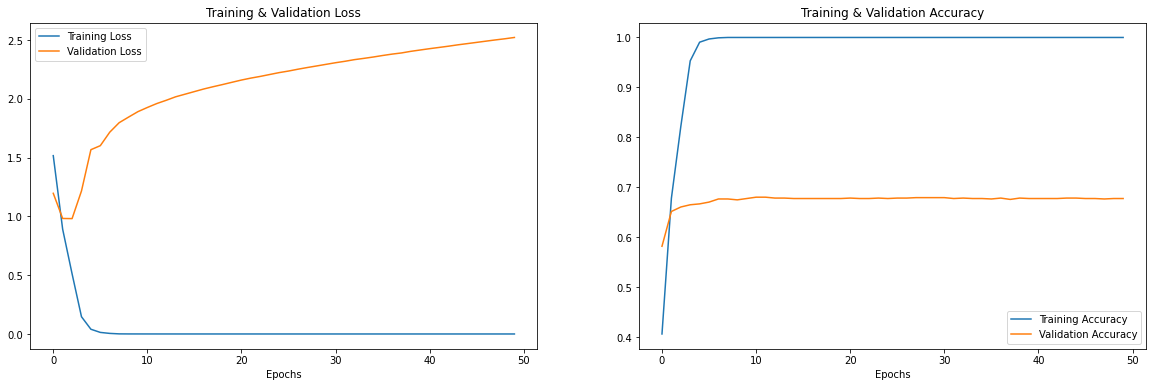

In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

9/9 [==============================] - 1s 37ms/step


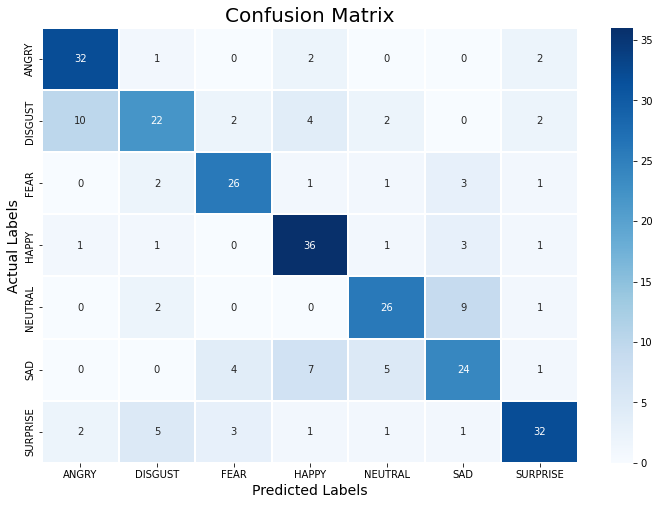

              precision    recall  f1-score   support

       ANGRY       0.71      0.86      0.78        37
     DISGUST       0.67      0.52      0.59        42
        FEAR       0.74      0.76      0.75        34
       HAPPY       0.71      0.84      0.77        43
     NEUTRAL       0.72      0.68      0.70        38
         SAD       0.60      0.59      0.59        41
    SURPRISE       0.80      0.71      0.75        45

    accuracy                           0.71       280
   macro avg       0.71      0.71      0.70       280
weighted avg       0.71      0.71      0.70       280



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))